In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.utils import shuffle

plt.style.use('classic')
sns.set()
%matplotlib inline

In [2]:
def limit_output(x):
    if x < 0:
        return -1
    else:
        return 1
limit_output_v = np.vectorize(limit_output)

In [3]:
def get_convergence(data_arr, output_col, w):    
    outputs = [np.dot(w, x) for x in data_arr]
    outputs = limit_output_v(outputs)
#     print (output_col_df)
#     print (outputs)
    incorrect_classifications = np.sum(output_col != outputs)
#     print (incorrect_classifications)
    ratio = float(incorrect_classifications) / float(len(output_col))
#     print (ratio)
    return ratio

In [4]:
def update_weights(data_arr, output_col, w):
    index = np.random.randint(len(data_arr))
#     print ('index', index)
    
    r = data_arr[index]
    output = np.dot(w, r)
#     print (output, output_col_df.iloc[index])
    
    if output_col[index] > 0 and output < 0:
        w = np.add(w, r)
    if output_col[index] < 0 and output >= 0:
        w = np.subtract(w, r)
    
    return w

In [5]:
def train_weights(train_df, output_label_df, features, max_iterations=1000):
    ctr = 0
    
    w = np.array([0 for _ in range(len(features))])
    # print (len(features))
    # print (len(w))

    train_arr = np.array(train_df[features])
    output_col = np.array(output_label_df)
    
    print ('initial convergence', get_convergence(train_arr, output_col, w))
    print ('w', w)

    while ctr < max_iterations:
        convergence = get_convergence(train_arr, output_col, w)
        print ("Iteration: %s, Convergence: %s" % (ctr, convergence))
        if convergence < 0.05:
            break

        w = update_weights(train_arr, output_col, w)
#         print ('w', w)
        ctr += 1

    print (w, get_convergence(train_arr, output_col, w))
    return w

In [6]:
def normalize(dataset, col_labels_to_skip=['y']):
    dataNorm=((dataset-dataset.min())/(dataset.max()-dataset.min()))*20
    for col_label in col_labels_to_skip:
        dataNorm[col_label]=dataset[col_label]
    return dataNorm

In [7]:
def remove_outliers(df, column , minimum, maximum):
    col_values = df[column].values
    df[column] = np.where(np.logical_or(col_values<minimum, col_values>maximum), col_values.mean(), col_values)
    return df

## Test data

In [12]:
data = [[1, 1, -1], [1, 2, -1], [1, 3, 1], [1, 4, 1],
        [2, 1, -1], [2, 2, -1], [2, 3, 1], [2, 4, 1],
        [3, 1, -1], [3, 2, -1], [3, 3, 1], [3, 4, 1],
        [4, 1, -1], [4, 2, -1], [4, 3, 1], [4, 4, 1]]

all_data_df = pd.DataFrame(data, columns=['x1', 'x2', 'y'])
all_data_df['x0'] = [1 for _ in range(len(all_data_df))]
all_data_df.head()

,x1,x2,y,x0
0,1,1,-1,1
1,1,2,-1,1
2,1,3,1,1
3,1,4,1,1
4,2,1,-1,1


In [13]:
output_col_df = all_data_df['y']
output_col_df.head()

0   -1
1   -1
2    1
3    1
4   -1
Name: y, dtype: int64

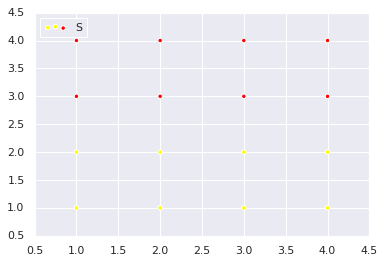

In [14]:
color_label = output_col_df.apply(lambda x: 'red' if x == 1 else 'yellow')
plt.scatter(all_data_df['x1'], all_data_df['x2'], c=color_label)
# print (color_label)
plt.legend('S', ncol=2, loc='upper left');

In [15]:
data_df = all_data_df.loc[:, all_data_df.columns != 'y']
output_col_df = all_data_df['y']

features = ['x0', 'x1', 'x2']
w = train_weights(data_df, output_col_df, features)
print (w)

('initial convergence', 0.5)
('w', array([0, 0, 0]))
Iteration: 0, Convergence: 0.5
Iteration: 1, Convergence: 0.5
Iteration: 2, Convergence: 0.5
Iteration: 3, Convergence: 0.5
Iteration: 4, Convergence: 0.5
Iteration: 5, Convergence: 0.5
Iteration: 6, Convergence: 0.5
Iteration: 7, Convergence: 0.375
Iteration: 8, Convergence: 0.375
Iteration: 9, Convergence: 0.375
Iteration: 10, Convergence: 0.5
Iteration: 11, Convergence: 0.5
Iteration: 12, Convergence: 0.5
Iteration: 13, Convergence: 0.5
Iteration: 14, Convergence: 0.25
Iteration: 15, Convergence: 0.25
Iteration: 16, Convergence: 0.25
Iteration: 17, Convergence: 0.25
Iteration: 18, Convergence: 0.25
Iteration: 19, Convergence: 0.5
Iteration: 20, Convergence: 0.5
Iteration: 21, Convergence: 0.5
Iteration: 22, Convergence: 0.4375
Iteration: 23, Convergence: 0.4375
Iteration: 24, Convergence: 0.4375
Iteration: 25, Convergence: 0.4375
Iteration: 26, Convergence: 0.4375
Iteration: 27, Convergence: 0.4375
Iteration: 28, Convergence: 0.37

In [16]:
# test
print (get_convergence(np.array(data_df[features]), np.array(output_col_df), w))

0.0


In [17]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array([0, 4.5])
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')
    plt.scatter(all_data_df['x1'], all_data_df['x2'], c=color_label)
    # print (color_label)
    plt.legend('S', ncol=2, loc='upper left');

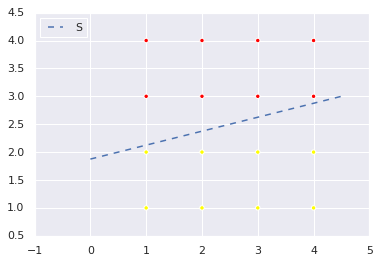

In [18]:
slope = (-1.0) * float(w[1]) / float(w[2])
intercept = (-1.0) * float(w[0]) / float(w[2])
abline(slope, intercept)

## Bank data

In [8]:
bank_df = pd.read_csv('data/bank/bank.csv', sep=';')
# bank_df = bank_df[['default', 'duration', 'campaign', 'pdays', 'job', 'education', 'balance', 'contact', 'month', 'previous', 'poutcome', 'y']]
print (len(bank_df))

#check for any missing values
print ("Nulls", bank_df.apply(lambda x: sum(x.isnull()),axis=0))
bank_df.head()

4521
('Nulls', age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [9]:
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


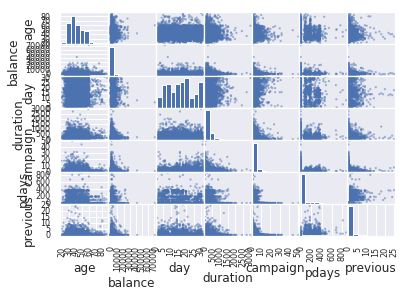

In [10]:
scatter_matrix(bank_df)
plt.show()

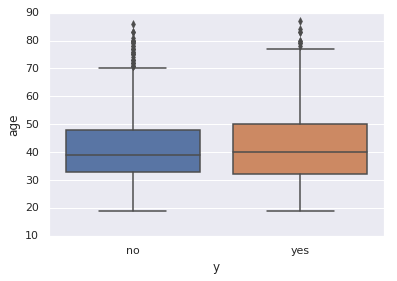

In [11]:
sns.boxplot(x='y', y='age', data=bank_df)

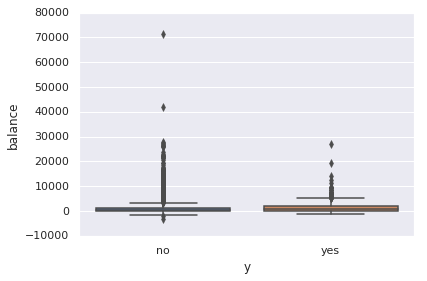

In [12]:
sns.boxplot(x='y', y='balance', data=bank_df)

In [13]:
min_val = bank_df["balance"].min()
max_val = 18000
bank_df = remove_outliers(df=bank_df, column='balance' , minimum=min_val, maximum=max_val)

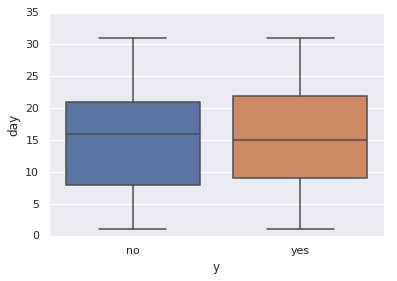

In [14]:
sns.boxplot(x='y', y='day', data=bank_df)

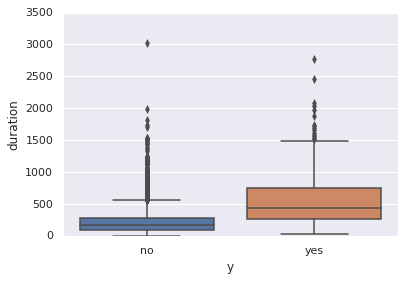

In [15]:
sns.boxplot(x='y', y='duration', data=bank_df)

In [16]:
min_val = bank_df["duration"].min()
max_val = 2000
bank_df = remove_outliers(df=bank_df, column='duration' , minimum=min_val, maximum=max_val)

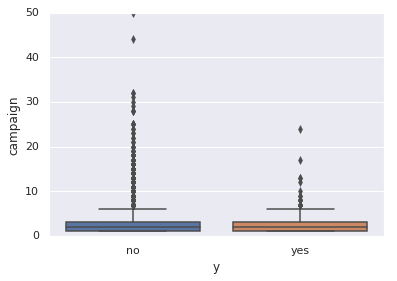

In [17]:
sns.boxplot(x='y', y='campaign', data=bank_df)

In [18]:
min_val = bank_df["campaign"].min()
max_val = 20
bank_df = remove_outliers(df=bank_df, column='campaign' , minimum=min_val, maximum=max_val)

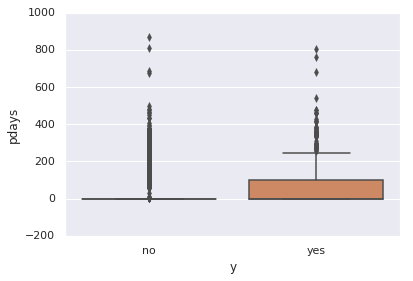

In [19]:
sns.boxplot(x='y', y='pdays', data=bank_df)

In [20]:
min_val = bank_df["pdays"].min()
max_val = 600
bank_df = remove_outliers(df=bank_df, column='pdays' , minimum=min_val, maximum=max_val)

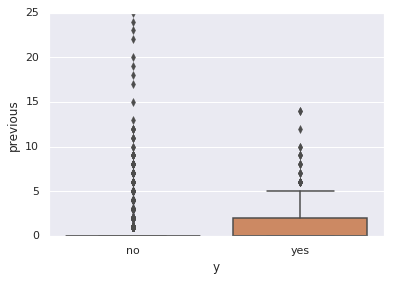

In [21]:
sns.boxplot(x='y', y='previous', data=bank_df)

In [22]:
min_val = bank_df["previous"].min()
max_val = 10
bank_df = remove_outliers(df=bank_df, column='previous' , minimum=min_val, maximum=max_val)

In [23]:
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1292.080909,15.915284,261.517984,2.667165,38.658564,0.474862
std,10.576211,2289.111725,8.247667,248.911664,2.503986,96.031588,1.315701
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1438.000000,21.000000,328.000000,3.000000,-1.000000,0.000000
max,87.000000,17555.000000,31.000000,1994.000000,20.000000,541.000000,10.000000


In [24]:
bank_df['default'] =  bank_df.default.eq("yes").mul(1)
# bank_df['housing'] =  bank_df.housing.eq("yes").mul(1)
# bank_df['loan'] =  bank_df.loan.eq("yes").mul(1)
bank_df.loc[(bank_df['pdays'] == -1), 'pdays'] = 999

del bank_df['default']
del bank_df['contact']
del bank_df['poutcome']

bank_df['y'] = bank_df.y.map({'yes':1, 'no':-1})
bank_df['x0'] = [1 for _ in range(len(bank_df))]
bank_df.head()

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,x0
0,30,unemployed,married,primary,1787.0,no,no,19,oct,79.0,1.0,999.0,0.0,-1,1
1,33,services,married,secondary,4789.0,yes,yes,11,may,220.0,1.0,339.0,4.0,-1,1
2,35,management,single,tertiary,1350.0,yes,no,16,apr,185.0,1.0,330.0,1.0,-1,1
3,30,management,married,tertiary,1476.0,yes,yes,3,jun,199.0,4.0,999.0,0.0,-1,1
4,59,blue-collar,married,secondary,0.0,yes,no,5,may,226.0,1.0,999.0,0.0,-1,1


In [25]:
# bank_df = pd.get_dummies(bank_df, columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'])
bank_df = pd.get_dummies(bank_df)
bank_df['y_axis'] = range(1, len(bank_df) + 1)
print (bank_df.columns)
bank_df.head()

Index([u'age', u'balance', u'day', u'duration', u'campaign', u'pdays',
       u'previous', u'y', u'x0', u'job_admin.', u'job_blue-collar',
       u'job_entrepreneur', u'job_housemaid', u'job_management',
       u'job_retired', u'job_self-employed', u'job_services', u'job_student',
       u'job_technician', u'job_unemployed', u'job_unknown',
       u'marital_divorced', u'marital_married', u'marital_single',
       u'education_primary', u'education_secondary', u'education_tertiary',
       u'education_unknown', u'housing_no', u'housing_yes', u'loan_no',
       u'loan_yes', u'month_apr', u'month_aug', u'month_dec', u'month_feb',
       u'month_jan', u'month_jul', u'month_jun', u'month_mar', u'month_may',
       u'month_nov', u'month_oct', u'month_sep', u'y_axis'],
      dtype='object')


,age,balance,day,duration,campaign,pdays,previous,y,x0,job_admin.,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,y_axis
0,30,1787.0,19,79.0,1.0,999.0,0.0,-1,1,0,...,0,0,0,0,0,0,0,1,0,1
1,33,4789.0,11,220.0,1.0,339.0,4.0,-1,1,0,...,0,0,0,0,0,1,0,0,0,2
2,35,1350.0,16,185.0,1.0,330.0,1.0,-1,1,0,...,0,0,0,0,0,0,0,0,0,3
3,30,1476.0,3,199.0,4.0,999.0,0.0,-1,1,0,...,0,0,0,1,0,0,0,0,0,4
4,59,0.0,5,226.0,1.0,999.0,0.0,-1,1,0,...,0,0,0,0,0,1,0,0,0,5


In [26]:
# sns.distplot(bank_df.balance)

In [27]:
# bank_df = normalize(bank_df, ['y', 'x0', 'y_axis'])
# bank_df = bank_df.append(bank_df[bank_df.y == -1] * 3, ignore_index=True)
bank_df = shuffle(bank_df)
bank_df.head()

,age,balance,day,duration,campaign,pdays,previous,y,x0,job_admin.,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,y_axis
1021,45,5346.0,21,187.0,1.0,999.0,0.0,1,1,1,...,0,0,0,0,0,0,0,1,0,1022
879,28,183.0,28,62.0,2.0,999.0,0.0,-1,1,0,...,0,0,0,0,0,1,0,0,0,880
396,34,613.0,4,80.0,1.0,999.0,0.0,-1,1,1,...,0,0,0,1,0,0,0,0,0,397
540,47,3696.0,12,250.0,2.0,181.0,4.0,1,1,1,...,0,0,1,0,0,0,0,0,0,541
681,31,251.0,29,156.0,2.0,999.0,0.0,-1,1,0,...,0,0,0,0,0,0,0,0,0,682


In [28]:
# default, duration, campaign, pdays, job, education, balance, contact, month, previous, pcoutcome
# column_name  = 'poutcome'

# print (bank_df[column_name].describe())
# sns.scatterplot(column_name, 'y_axis',  data=bank_df[[column_name, 'y_axis', 'y']], hue='y', legend=None);

# scatter_matrix(bank_df[['balance', 'day']])
# plt.show()

In [29]:
train_df, test_df = train_test_split(bank_df, test_size=0.5)
print (len(train_df), len(test_df))

(2260, 2261)


In [30]:
train_df.columns

Index([u'age', u'balance', u'day', u'duration', u'campaign', u'pdays',
       u'previous', u'y', u'x0', u'job_admin.', u'job_blue-collar',
       u'job_entrepreneur', u'job_housemaid', u'job_management',
       u'job_retired', u'job_self-employed', u'job_services', u'job_student',
       u'job_technician', u'job_unemployed', u'job_unknown',
       u'marital_divorced', u'marital_married', u'marital_single',
       u'education_primary', u'education_secondary', u'education_tertiary',
       u'education_unknown', u'housing_no', u'housing_yes', u'loan_no',
       u'loan_yes', u'month_apr', u'month_aug', u'month_dec', u'month_feb',
       u'month_jan', u'month_jul', u'month_jun', u'month_mar', u'month_may',
       u'month_nov', u'month_oct', u'month_sep', u'y_axis'],
      dtype='object')

In [31]:
features = [u'x0', u'age', u'balance', u'day', u'duration', u'campaign', u'pdays',
       u'previous', u'job_admin.', u'job_blue-collar',
       u'job_entrepreneur', u'job_housemaid', u'job_management',
       u'job_retired', u'job_self-employed', u'job_services', u'job_student',
       u'job_technician', u'job_unemployed', u'job_unknown',
       u'marital_divorced', u'marital_married', u'marital_single',
       u'education_primary', u'education_secondary', u'education_tertiary',
       u'education_unknown', u'housing_no', u'housing_yes', u'loan_no',
       u'loan_yes', u'month_apr', u'month_aug', u'month_dec', u'month_feb',
       u'month_jan', u'month_jul', u'month_jun', u'month_mar', u'month_may',
       u'month_nov', u'month_oct', u'month_sep']
# print (features)

data_df = train_df[features]
output_label_df = train_df['y']

w = train_weights(data_df, output_label_df, features, max_iterations=50000)
print (w)

('initial convergence', 0.8845132743362832)
('w', array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))
Iteration: 0, Convergence: 0.884513274336
Iteration: 1, Convergence: 0.115486725664
Iteration: 2, Convergence: 0.115486725664
Iteration: 3, Convergence: 0.115486725664
Iteration: 4, Convergence: 0.115486725664
Iteration: 5, Convergence: 0.837610619469
Iteration: 6, Convergence: 0.117699115044
Iteration: 7, Convergence: 0.839380530973
Iteration: 8, Convergence: 0.839380530973
Iteration: 9, Convergence: 0.819911504425
Iteration: 10, Convergence: 0.819911504425
Iteration: 11, Convergence: 0.132743362832
Iteration: 12, Convergence: 0.132743362832
Iteration: 13, Convergence: 0.132743362832
Iteration: 14, Convergence: 0.132743362832
Iteration: 15, Convergence: 0.132743362832
Iteration: 16, Convergence: 0.132743362832
Iteration: 17, Convergence: 0.132743362832
Iteration: 18, Convergence: 0.13274336283

Iteration: 193, Convergence: 0.187610619469
Iteration: 194, Convergence: 0.120353982301
Iteration: 195, Convergence: 0.120353982301
Iteration: 196, Convergence: 0.120353982301
Iteration: 197, Convergence: 0.120353982301
Iteration: 198, Convergence: 0.120353982301
Iteration: 199, Convergence: 0.120353982301
Iteration: 200, Convergence: 0.120353982301
Iteration: 201, Convergence: 0.120353982301
Iteration: 202, Convergence: 0.120353982301
Iteration: 203, Convergence: 0.120353982301
Iteration: 204, Convergence: 0.120353982301
Iteration: 205, Convergence: 0.120353982301
Iteration: 206, Convergence: 0.120353982301
Iteration: 207, Convergence: 0.116814159292
Iteration: 208, Convergence: 0.217256637168
Iteration: 209, Convergence: 0.217256637168
Iteration: 210, Convergence: 0.217256637168
Iteration: 211, Convergence: 0.217256637168
Iteration: 212, Convergence: 0.217256637168
Iteration: 213, Convergence: 0.217256637168
Iteration: 214, Convergence: 0.217256637168
Iteration: 215, Convergence: 0.2

Iteration: 395, Convergence: 0.118584070796
Iteration: 396, Convergence: 0.118584070796
Iteration: 397, Convergence: 0.118584070796
Iteration: 398, Convergence: 0.118584070796
Iteration: 399, Convergence: 0.118584070796
Iteration: 400, Convergence: 0.118584070796
Iteration: 401, Convergence: 0.118584070796
Iteration: 402, Convergence: 0.118584070796
Iteration: 403, Convergence: 0.118584070796
Iteration: 404, Convergence: 0.118584070796
Iteration: 405, Convergence: 0.117256637168
Iteration: 406, Convergence: 0.117256637168
Iteration: 407, Convergence: 0.114159292035
Iteration: 408, Convergence: 0.452654867257
Iteration: 409, Convergence: 0.452654867257
Iteration: 410, Convergence: 0.126548672566
Iteration: 411, Convergence: 0.126548672566
Iteration: 412, Convergence: 0.126548672566
Iteration: 413, Convergence: 0.126548672566
Iteration: 414, Convergence: 0.126548672566
Iteration: 415, Convergence: 0.126548672566
Iteration: 416, Convergence: 0.126548672566
Iteration: 417, Convergence: 0.1

Iteration: 594, Convergence: 0.13185840708
Iteration: 595, Convergence: 0.132300884956
Iteration: 596, Convergence: 0.132300884956
Iteration: 597, Convergence: 0.132300884956
Iteration: 598, Convergence: 0.132300884956
Iteration: 599, Convergence: 0.132300884956
Iteration: 600, Convergence: 0.130973451327
Iteration: 601, Convergence: 0.130973451327
Iteration: 602, Convergence: 0.130973451327
Iteration: 603, Convergence: 0.130973451327
Iteration: 604, Convergence: 0.130973451327
Iteration: 605, Convergence: 0.130973451327
Iteration: 606, Convergence: 0.130973451327
Iteration: 607, Convergence: 0.130973451327
Iteration: 608, Convergence: 0.130973451327
Iteration: 609, Convergence: 0.130973451327
Iteration: 610, Convergence: 0.130973451327
Iteration: 611, Convergence: 0.130973451327
Iteration: 612, Convergence: 0.130973451327
Iteration: 613, Convergence: 0.130973451327
Iteration: 614, Convergence: 0.130973451327
Iteration: 615, Convergence: 0.130973451327
Iteration: 616, Convergence: 0.13

Iteration: 791, Convergence: 0.128318584071
Iteration: 792, Convergence: 0.128318584071
Iteration: 793, Convergence: 0.128318584071
Iteration: 794, Convergence: 0.128318584071
Iteration: 795, Convergence: 0.128318584071
Iteration: 796, Convergence: 0.128318584071
Iteration: 797, Convergence: 0.128318584071
Iteration: 798, Convergence: 0.128318584071
Iteration: 799, Convergence: 0.128318584071
Iteration: 800, Convergence: 0.128318584071
Iteration: 801, Convergence: 0.128318584071
Iteration: 802, Convergence: 0.128318584071
Iteration: 803, Convergence: 0.128318584071
Iteration: 804, Convergence: 0.128318584071
Iteration: 805, Convergence: 0.128318584071
Iteration: 806, Convergence: 0.130530973451
Iteration: 807, Convergence: 0.130530973451
Iteration: 808, Convergence: 0.130530973451
Iteration: 809, Convergence: 0.130530973451
Iteration: 810, Convergence: 0.130530973451
Iteration: 811, Convergence: 0.130530973451
Iteration: 812, Convergence: 0.130530973451
Iteration: 813, Convergence: 0.1

Iteration: 987, Convergence: 0.146902654867
Iteration: 988, Convergence: 0.146902654867
Iteration: 989, Convergence: 0.146902654867
Iteration: 990, Convergence: 0.146902654867
Iteration: 991, Convergence: 0.135840707965
Iteration: 992, Convergence: 0.135840707965
Iteration: 993, Convergence: 0.552654867257
Iteration: 994, Convergence: 0.552654867257
Iteration: 995, Convergence: 0.138495575221
Iteration: 996, Convergence: 0.138495575221
Iteration: 997, Convergence: 0.33185840708
Iteration: 998, Convergence: 0.33185840708
Iteration: 999, Convergence: 0.33185840708
Iteration: 1000, Convergence: 0.13407079646
Iteration: 1001, Convergence: 0.13407079646
Iteration: 1002, Convergence: 0.13407079646
Iteration: 1003, Convergence: 0.13407079646
Iteration: 1004, Convergence: 0.13407079646
Iteration: 1005, Convergence: 0.13407079646
Iteration: 1006, Convergence: 0.13407079646
Iteration: 1007, Convergence: 0.13407079646
Iteration: 1008, Convergence: 0.13407079646
Iteration: 1009, Convergence: 0.134

Iteration: 1186, Convergence: 0.125663716814
Iteration: 1187, Convergence: 0.125663716814
Iteration: 1188, Convergence: 0.125663716814
Iteration: 1189, Convergence: 0.125663716814
Iteration: 1190, Convergence: 0.125663716814
Iteration: 1191, Convergence: 0.125663716814
Iteration: 1192, Convergence: 0.125663716814
Iteration: 1193, Convergence: 0.125663716814
Iteration: 1194, Convergence: 0.125663716814
Iteration: 1195, Convergence: 0.125663716814
Iteration: 1196, Convergence: 0.125663716814
Iteration: 1197, Convergence: 0.125663716814
Iteration: 1198, Convergence: 0.125663716814
Iteration: 1199, Convergence: 0.125663716814
Iteration: 1200, Convergence: 0.125663716814
Iteration: 1201, Convergence: 0.125663716814
Iteration: 1202, Convergence: 0.122566371681
Iteration: 1203, Convergence: 0.122566371681
Iteration: 1204, Convergence: 0.122566371681
Iteration: 1205, Convergence: 0.11814159292
Iteration: 1206, Convergence: 0.11814159292
Iteration: 1207, Convergence: 0.11814159292
Iteration: 12

Iteration: 1384, Convergence: 0.121681415929
Iteration: 1385, Convergence: 0.121681415929
Iteration: 1386, Convergence: 0.121681415929
Iteration: 1387, Convergence: 0.121681415929
Iteration: 1388, Convergence: 0.121681415929
Iteration: 1389, Convergence: 0.121681415929
Iteration: 1390, Convergence: 0.121681415929
Iteration: 1391, Convergence: 0.181415929204
Iteration: 1392, Convergence: 0.181415929204
Iteration: 1393, Convergence: 0.181415929204
Iteration: 1394, Convergence: 0.181415929204
Iteration: 1395, Convergence: 0.181415929204
Iteration: 1396, Convergence: 0.181415929204
Iteration: 1397, Convergence: 0.181415929204
Iteration: 1398, Convergence: 0.181415929204
Iteration: 1399, Convergence: 0.181415929204
Iteration: 1400, Convergence: 0.181415929204
Iteration: 1401, Convergence: 0.181415929204
Iteration: 1402, Convergence: 0.181415929204
Iteration: 1403, Convergence: 0.181415929204
Iteration: 1404, Convergence: 0.181415929204
Iteration: 1405, Convergence: 0.181415929204
Iteration:

Iteration: 1585, Convergence: 0.244247787611
Iteration: 1586, Convergence: 0.146017699115
Iteration: 1587, Convergence: 0.145575221239
Iteration: 1588, Convergence: 0.145575221239
Iteration: 1589, Convergence: 0.145575221239
Iteration: 1590, Convergence: 0.132300884956
Iteration: 1591, Convergence: 0.132300884956
Iteration: 1592, Convergence: 0.132300884956
Iteration: 1593, Convergence: 0.132300884956
Iteration: 1594, Convergence: 0.132300884956
Iteration: 1595, Convergence: 0.132300884956
Iteration: 1596, Convergence: 0.132300884956
Iteration: 1597, Convergence: 0.132300884956
Iteration: 1598, Convergence: 0.132300884956
Iteration: 1599, Convergence: 0.132300884956
Iteration: 1600, Convergence: 0.132300884956
Iteration: 1601, Convergence: 0.132300884956
Iteration: 1602, Convergence: 0.132300884956
Iteration: 1603, Convergence: 0.132300884956
Iteration: 1604, Convergence: 0.132300884956
Iteration: 1605, Convergence: 0.132300884956
Iteration: 1606, Convergence: 0.132300884956
Iteration:

Iteration: 1773, Convergence: 0.138053097345
Iteration: 1774, Convergence: 0.138053097345
Iteration: 1775, Convergence: 0.138053097345
Iteration: 1776, Convergence: 0.138053097345
Iteration: 1777, Convergence: 0.11814159292
Iteration: 1778, Convergence: 0.11814159292
Iteration: 1779, Convergence: 0.11814159292
Iteration: 1780, Convergence: 0.11814159292
Iteration: 1781, Convergence: 0.11814159292
Iteration: 1782, Convergence: 0.11814159292
Iteration: 1783, Convergence: 0.11814159292
Iteration: 1784, Convergence: 0.567699115044
Iteration: 1785, Convergence: 0.472566371681
Iteration: 1786, Convergence: 0.403982300885
Iteration: 1787, Convergence: 0.403982300885
Iteration: 1788, Convergence: 0.403982300885
Iteration: 1789, Convergence: 0.403982300885
Iteration: 1790, Convergence: 0.348230088496
Iteration: 1791, Convergence: 0.348230088496
Iteration: 1792, Convergence: 0.326548672566
Iteration: 1793, Convergence: 0.326548672566
Iteration: 1794, Convergence: 0.326548672566
Iteration: 1795, 

Iteration: 1960, Convergence: 0.285840707965
Iteration: 1961, Convergence: 0.285840707965
Iteration: 1962, Convergence: 0.285840707965
Iteration: 1963, Convergence: 0.285840707965
Iteration: 1964, Convergence: 0.285840707965
Iteration: 1965, Convergence: 0.285840707965
Iteration: 1966, Convergence: 0.187168141593
Iteration: 1967, Convergence: 0.187168141593
Iteration: 1968, Convergence: 0.187168141593
Iteration: 1969, Convergence: 0.187168141593
Iteration: 1970, Convergence: 0.171681415929
Iteration: 1971, Convergence: 0.171681415929
Iteration: 1972, Convergence: 0.171681415929
Iteration: 1973, Convergence: 0.171681415929
Iteration: 1974, Convergence: 0.146017699115
Iteration: 1975, Convergence: 0.146017699115
Iteration: 1976, Convergence: 0.14203539823
Iteration: 1977, Convergence: 0.14203539823
Iteration: 1978, Convergence: 0.14203539823
Iteration: 1979, Convergence: 0.14203539823
Iteration: 1980, Convergence: 0.14203539823
Iteration: 1981, Convergence: 0.14203539823
Iteration: 1982,

Iteration: 2234, Convergence: 0.139380530973
Iteration: 2235, Convergence: 0.139380530973
Iteration: 2236, Convergence: 0.139380530973
Iteration: 2237, Convergence: 0.139380530973
Iteration: 2238, Convergence: 0.139380530973
Iteration: 2239, Convergence: 0.139380530973
Iteration: 2240, Convergence: 0.138495575221
Iteration: 2241, Convergence: 0.240265486726
Iteration: 2242, Convergence: 0.240265486726
Iteration: 2243, Convergence: 0.240265486726
Iteration: 2244, Convergence: 0.240265486726
Iteration: 2245, Convergence: 0.240265486726
Iteration: 2246, Convergence: 0.240265486726
Iteration: 2247, Convergence: 0.240265486726
Iteration: 2248, Convergence: 0.135398230088
Iteration: 2249, Convergence: 0.135398230088
Iteration: 2250, Convergence: 0.135398230088
Iteration: 2251, Convergence: 0.253982300885
Iteration: 2252, Convergence: 0.142920353982
Iteration: 2253, Convergence: 0.142920353982
Iteration: 2254, Convergence: 0.142920353982
Iteration: 2255, Convergence: 0.142920353982
Iteration:

Iteration: 2430, Convergence: 0.150442477876
Iteration: 2431, Convergence: 0.150442477876
Iteration: 2432, Convergence: 0.150442477876
Iteration: 2433, Convergence: 0.150442477876
Iteration: 2434, Convergence: 0.150442477876
Iteration: 2435, Convergence: 0.150442477876
Iteration: 2436, Convergence: 0.150442477876
Iteration: 2437, Convergence: 0.150442477876
Iteration: 2438, Convergence: 0.150442477876
Iteration: 2439, Convergence: 0.150442477876
Iteration: 2440, Convergence: 0.150442477876
Iteration: 2441, Convergence: 0.150442477876
Iteration: 2442, Convergence: 0.114601769912
Iteration: 2443, Convergence: 0.114601769912
Iteration: 2444, Convergence: 0.114601769912
Iteration: 2445, Convergence: 0.114601769912
Iteration: 2446, Convergence: 0.114601769912
Iteration: 2447, Convergence: 0.114601769912
Iteration: 2448, Convergence: 0.114601769912
Iteration: 2449, Convergence: 0.114601769912
Iteration: 2450, Convergence: 0.114601769912
Iteration: 2451, Convergence: 0.114601769912
Iteration:

Iteration: 2633, Convergence: 0.157522123894
Iteration: 2634, Convergence: 0.157522123894
Iteration: 2635, Convergence: 0.157522123894
Iteration: 2636, Convergence: 0.231415929204
Iteration: 2637, Convergence: 0.136725663717
Iteration: 2638, Convergence: 0.136725663717
Iteration: 2639, Convergence: 0.136725663717
Iteration: 2640, Convergence: 0.136725663717
Iteration: 2641, Convergence: 0.136725663717
Iteration: 2642, Convergence: 0.136725663717
Iteration: 2643, Convergence: 0.136725663717
Iteration: 2644, Convergence: 0.136725663717
Iteration: 2645, Convergence: 0.136725663717
Iteration: 2646, Convergence: 0.136725663717
Iteration: 2647, Convergence: 0.136725663717
Iteration: 2648, Convergence: 0.136725663717
Iteration: 2649, Convergence: 0.136725663717
Iteration: 2650, Convergence: 0.136725663717
Iteration: 2651, Convergence: 0.136725663717
Iteration: 2652, Convergence: 0.136725663717
Iteration: 2653, Convergence: 0.250442477876
Iteration: 2654, Convergence: 0.119469026549
Iteration:

Iteration: 2823, Convergence: 0.224336283186
Iteration: 2824, Convergence: 0.224336283186
Iteration: 2825, Convergence: 0.224336283186
Iteration: 2826, Convergence: 0.224336283186
Iteration: 2827, Convergence: 0.224336283186
Iteration: 2828, Convergence: 0.224336283186
Iteration: 2829, Convergence: 0.224336283186
Iteration: 2830, Convergence: 0.297345132743
Iteration: 2831, Convergence: 0.297345132743
Iteration: 2832, Convergence: 0.297345132743
Iteration: 2833, Convergence: 0.297345132743
Iteration: 2834, Convergence: 0.124336283186
Iteration: 2835, Convergence: 0.124336283186
Iteration: 2836, Convergence: 0.124336283186
Iteration: 2837, Convergence: 0.124336283186
Iteration: 2838, Convergence: 0.124336283186
Iteration: 2839, Convergence: 0.124778761062
Iteration: 2840, Convergence: 0.124778761062
Iteration: 2841, Convergence: 0.124778761062
Iteration: 2842, Convergence: 0.124778761062
Iteration: 2843, Convergence: 0.124778761062
Iteration: 2844, Convergence: 0.124778761062
Iteration:

Iteration: 3009, Convergence: 0.153539823009
Iteration: 3010, Convergence: 0.11814159292
Iteration: 3011, Convergence: 0.11814159292
Iteration: 3012, Convergence: 0.11814159292
Iteration: 3013, Convergence: 0.11814159292
Iteration: 3014, Convergence: 0.11814159292
Iteration: 3015, Convergence: 0.11814159292
Iteration: 3016, Convergence: 0.123451327434
Iteration: 3017, Convergence: 0.123451327434
Iteration: 3018, Convergence: 0.123451327434
Iteration: 3019, Convergence: 0.123451327434
Iteration: 3020, Convergence: 0.123451327434
Iteration: 3021, Convergence: 0.123451327434
Iteration: 3022, Convergence: 0.123451327434
Iteration: 3023, Convergence: 0.123451327434
Iteration: 3024, Convergence: 0.123451327434
Iteration: 3025, Convergence: 0.123451327434
Iteration: 3026, Convergence: 0.123451327434
Iteration: 3027, Convergence: 0.123451327434
Iteration: 3028, Convergence: 0.123451327434
Iteration: 3029, Convergence: 0.123451327434
Iteration: 3030, Convergence: 0.123451327434
Iteration: 3031,

Iteration: 3210, Convergence: 0.347787610619
Iteration: 3211, Convergence: 0.347787610619
Iteration: 3212, Convergence: 0.347787610619
Iteration: 3213, Convergence: 0.347787610619
Iteration: 3214, Convergence: 0.256637168142
Iteration: 3215, Convergence: 0.133185840708
Iteration: 3216, Convergence: 0.133185840708
Iteration: 3217, Convergence: 0.133185840708
Iteration: 3218, Convergence: 0.133185840708
Iteration: 3219, Convergence: 0.133185840708
Iteration: 3220, Convergence: 0.133185840708
Iteration: 3221, Convergence: 0.133185840708
Iteration: 3222, Convergence: 0.133185840708
Iteration: 3223, Convergence: 0.133185840708
Iteration: 3224, Convergence: 0.133185840708
Iteration: 3225, Convergence: 0.133185840708
Iteration: 3226, Convergence: 0.133185840708
Iteration: 3227, Convergence: 0.133185840708
Iteration: 3228, Convergence: 0.133185840708
Iteration: 3229, Convergence: 0.133185840708
Iteration: 3230, Convergence: 0.133185840708
Iteration: 3231, Convergence: 0.133185840708
Iteration:

Iteration: 3410, Convergence: 0.146460176991
Iteration: 3411, Convergence: 0.146460176991
Iteration: 3412, Convergence: 0.146460176991
Iteration: 3413, Convergence: 0.146460176991
Iteration: 3414, Convergence: 0.125221238938
Iteration: 3415, Convergence: 0.125221238938
Iteration: 3416, Convergence: 0.125221238938
Iteration: 3417, Convergence: 0.125221238938
Iteration: 3418, Convergence: 0.125221238938
Iteration: 3419, Convergence: 0.377876106195
Iteration: 3420, Convergence: 0.307079646018
Iteration: 3421, Convergence: 0.307079646018
Iteration: 3422, Convergence: 0.307079646018
Iteration: 3423, Convergence: 0.307079646018
Iteration: 3424, Convergence: 0.307079646018
Iteration: 3425, Convergence: 0.307079646018
Iteration: 3426, Convergence: 0.307079646018
Iteration: 3427, Convergence: 0.233185840708
Iteration: 3428, Convergence: 0.233185840708
Iteration: 3429, Convergence: 0.233185840708
Iteration: 3430, Convergence: 0.140265486726
Iteration: 3431, Convergence: 0.140265486726
Iteration:

Iteration: 3599, Convergence: 0.514159292035
Iteration: 3600, Convergence: 0.514159292035
Iteration: 3601, Convergence: 0.323008849558
Iteration: 3602, Convergence: 0.120353982301
Iteration: 3603, Convergence: 0.120353982301
Iteration: 3604, Convergence: 0.120353982301
Iteration: 3605, Convergence: 0.120353982301
Iteration: 3606, Convergence: 0.120353982301
Iteration: 3607, Convergence: 0.120353982301
Iteration: 3608, Convergence: 0.120353982301
Iteration: 3609, Convergence: 0.120353982301
Iteration: 3610, Convergence: 0.120353982301
Iteration: 3611, Convergence: 0.120353982301
Iteration: 3612, Convergence: 0.120353982301
Iteration: 3613, Convergence: 0.120353982301
Iteration: 3614, Convergence: 0.114601769912
Iteration: 3615, Convergence: 0.114601769912
Iteration: 3616, Convergence: 0.114601769912
Iteration: 3617, Convergence: 0.114601769912
Iteration: 3618, Convergence: 0.114601769912
Iteration: 3619, Convergence: 0.114601769912
Iteration: 3620, Convergence: 0.114601769912
Iteration:

Iteration: 3873, Convergence: 0.158407079646
Iteration: 3874, Convergence: 0.158407079646
Iteration: 3875, Convergence: 0.125663716814
Iteration: 3876, Convergence: 0.125663716814
Iteration: 3877, Convergence: 0.125663716814
Iteration: 3878, Convergence: 0.125663716814
Iteration: 3879, Convergence: 0.125663716814
Iteration: 3880, Convergence: 0.117256637168
Iteration: 3881, Convergence: 0.117256637168
Iteration: 3882, Convergence: 0.117256637168
Iteration: 3883, Convergence: 0.117256637168
Iteration: 3884, Convergence: 0.117256637168
Iteration: 3885, Convergence: 0.117256637168
Iteration: 3886, Convergence: 0.117256637168
Iteration: 3887, Convergence: 0.117256637168
Iteration: 3888, Convergence: 0.117256637168
Iteration: 3889, Convergence: 0.117256637168
Iteration: 3890, Convergence: 0.117256637168
Iteration: 3891, Convergence: 0.117256637168
Iteration: 3892, Convergence: 0.117256637168
Iteration: 3893, Convergence: 0.117256637168
Iteration: 3894, Convergence: 0.117256637168
Iteration:

Iteration: 4146, Convergence: 0.138495575221
Iteration: 4147, Convergence: 0.138495575221
Iteration: 4148, Convergence: 0.138495575221
Iteration: 4149, Convergence: 0.218584070796
Iteration: 4150, Convergence: 0.134955752212
Iteration: 4151, Convergence: 0.134955752212
Iteration: 4152, Convergence: 0.134955752212
Iteration: 4153, Convergence: 0.134955752212
Iteration: 4154, Convergence: 0.11814159292
Iteration: 4155, Convergence: 0.11814159292
Iteration: 4156, Convergence: 0.11814159292
Iteration: 4157, Convergence: 0.11814159292
Iteration: 4158, Convergence: 0.11814159292
Iteration: 4159, Convergence: 0.11814159292
Iteration: 4160, Convergence: 0.120796460177
Iteration: 4161, Convergence: 0.120796460177
Iteration: 4162, Convergence: 0.120796460177
Iteration: 4163, Convergence: 0.120796460177
Iteration: 4164, Convergence: 0.120796460177
Iteration: 4165, Convergence: 0.120796460177
Iteration: 4166, Convergence: 0.120796460177
Iteration: 4167, Convergence: 0.120796460177
Iteration: 4168,

Iteration: 4333, Convergence: 0.114159292035
Iteration: 4334, Convergence: 0.11592920354
Iteration: 4335, Convergence: 0.11592920354
Iteration: 4336, Convergence: 0.11592920354
Iteration: 4337, Convergence: 0.11592920354
Iteration: 4338, Convergence: 0.11592920354
Iteration: 4339, Convergence: 0.11592920354
Iteration: 4340, Convergence: 0.115044247788
Iteration: 4341, Convergence: 0.115044247788
Iteration: 4342, Convergence: 0.115044247788
Iteration: 4343, Convergence: 0.115044247788
Iteration: 4344, Convergence: 0.115044247788
Iteration: 4345, Convergence: 0.115044247788
Iteration: 4346, Convergence: 0.115044247788
Iteration: 4347, Convergence: 0.115044247788
Iteration: 4348, Convergence: 0.115044247788
Iteration: 4349, Convergence: 0.115044247788
Iteration: 4350, Convergence: 0.115044247788
Iteration: 4351, Convergence: 0.414159292035
Iteration: 4352, Convergence: 0.119469026549
Iteration: 4353, Convergence: 0.119469026549
Iteration: 4354, Convergence: 0.119469026549
Iteration: 4355,

Iteration: 4530, Convergence: 0.157079646018
Iteration: 4531, Convergence: 0.157079646018
Iteration: 4532, Convergence: 0.157079646018
Iteration: 4533, Convergence: 0.157079646018
Iteration: 4534, Convergence: 0.157079646018
Iteration: 4535, Convergence: 0.157079646018
Iteration: 4536, Convergence: 0.157079646018
Iteration: 4537, Convergence: 0.147787610619
Iteration: 4538, Convergence: 0.147787610619
Iteration: 4539, Convergence: 0.147787610619
Iteration: 4540, Convergence: 0.147787610619
Iteration: 4541, Convergence: 0.168584070796
Iteration: 4542, Convergence: 0.168584070796
Iteration: 4543, Convergence: 0.168584070796
Iteration: 4544, Convergence: 0.168584070796
Iteration: 4545, Convergence: 0.168584070796
Iteration: 4546, Convergence: 0.168584070796
Iteration: 4547, Convergence: 0.168584070796
Iteration: 4548, Convergence: 0.168584070796
Iteration: 4549, Convergence: 0.211504424779
Iteration: 4550, Convergence: 0.211504424779
Iteration: 4551, Convergence: 0.211504424779
Iteration:

Iteration: 4726, Convergence: 0.117256637168
Iteration: 4727, Convergence: 0.117256637168
Iteration: 4728, Convergence: 0.117256637168
Iteration: 4729, Convergence: 0.117256637168
Iteration: 4730, Convergence: 0.117256637168
Iteration: 4731, Convergence: 0.117256637168
Iteration: 4732, Convergence: 0.117256637168
Iteration: 4733, Convergence: 0.117256637168
Iteration: 4734, Convergence: 0.117256637168
Iteration: 4735, Convergence: 0.117256637168
Iteration: 4736, Convergence: 0.117256637168
Iteration: 4737, Convergence: 0.117256637168
Iteration: 4738, Convergence: 0.117256637168
Iteration: 4739, Convergence: 0.117256637168
Iteration: 4740, Convergence: 0.11592920354
Iteration: 4741, Convergence: 0.11592920354
Iteration: 4742, Convergence: 0.11592920354
Iteration: 4743, Convergence: 0.11592920354
Iteration: 4744, Convergence: 0.11592920354
Iteration: 4745, Convergence: 0.11592920354
Iteration: 4746, Convergence: 0.11592920354
Iteration: 4747, Convergence: 0.11592920354
Iteration: 4748, C

Iteration: 4921, Convergence: 0.141150442478
Iteration: 4922, Convergence: 0.141150442478
Iteration: 4923, Convergence: 0.141150442478
Iteration: 4924, Convergence: 0.141150442478
Iteration: 4925, Convergence: 0.141150442478
Iteration: 4926, Convergence: 0.141150442478
Iteration: 4927, Convergence: 0.141150442478
Iteration: 4928, Convergence: 0.141150442478
Iteration: 4929, Convergence: 0.141150442478
Iteration: 4930, Convergence: 0.141150442478
Iteration: 4931, Convergence: 0.129203539823
Iteration: 4932, Convergence: 0.129203539823
Iteration: 4933, Convergence: 0.129203539823
Iteration: 4934, Convergence: 0.129203539823
Iteration: 4935, Convergence: 0.129203539823
Iteration: 4936, Convergence: 0.129203539823
Iteration: 4937, Convergence: 0.129203539823
Iteration: 4938, Convergence: 0.129203539823
Iteration: 4939, Convergence: 0.175221238938
Iteration: 4940, Convergence: 0.175221238938
Iteration: 4941, Convergence: 0.175221238938
Iteration: 4942, Convergence: 0.175221238938
Iteration:

Iteration: 5122, Convergence: 0.114159292035
Iteration: 5123, Convergence: 0.114159292035
Iteration: 5124, Convergence: 0.114159292035
Iteration: 5125, Convergence: 0.114159292035
Iteration: 5126, Convergence: 0.114159292035
Iteration: 5127, Convergence: 0.114159292035
Iteration: 5128, Convergence: 0.114159292035
Iteration: 5129, Convergence: 0.114159292035
Iteration: 5130, Convergence: 0.114159292035
Iteration: 5131, Convergence: 0.114159292035
Iteration: 5132, Convergence: 0.114159292035
Iteration: 5133, Convergence: 0.114159292035
Iteration: 5134, Convergence: 0.114159292035
Iteration: 5135, Convergence: 0.114159292035
Iteration: 5136, Convergence: 0.290265486726
Iteration: 5137, Convergence: 0.290265486726
Iteration: 5138, Convergence: 0.290265486726
Iteration: 5139, Convergence: 0.290265486726
Iteration: 5140, Convergence: 0.31814159292
Iteration: 5141, Convergence: 0.112389380531
Iteration: 5142, Convergence: 0.112389380531
Iteration: 5143, Convergence: 0.112389380531
Iteration: 

Iteration: 5309, Convergence: 0.136283185841
Iteration: 5310, Convergence: 0.136283185841
Iteration: 5311, Convergence: 0.136283185841
Iteration: 5312, Convergence: 0.136283185841
Iteration: 5313, Convergence: 0.146902654867
Iteration: 5314, Convergence: 0.146902654867
Iteration: 5315, Convergence: 0.146902654867
Iteration: 5316, Convergence: 0.146902654867
Iteration: 5317, Convergence: 0.146902654867
Iteration: 5318, Convergence: 0.146902654867
Iteration: 5319, Convergence: 0.146902654867
Iteration: 5320, Convergence: 0.146902654867
Iteration: 5321, Convergence: 0.146902654867
Iteration: 5322, Convergence: 0.146902654867
Iteration: 5323, Convergence: 0.146902654867
Iteration: 5324, Convergence: 0.146902654867
Iteration: 5325, Convergence: 0.146902654867
Iteration: 5326, Convergence: 0.146902654867
Iteration: 5327, Convergence: 0.146902654867
Iteration: 5328, Convergence: 0.146902654867
Iteration: 5329, Convergence: 0.146902654867
Iteration: 5330, Convergence: 0.171681415929
Iteration:

Iteration: 5492, Convergence: 0.118584070796
Iteration: 5493, Convergence: 0.118584070796
Iteration: 5494, Convergence: 0.215044247788
Iteration: 5495, Convergence: 0.215044247788
Iteration: 5496, Convergence: 0.215044247788
Iteration: 5497, Convergence: 0.215044247788
Iteration: 5498, Convergence: 0.11814159292
Iteration: 5499, Convergence: 0.11814159292
Iteration: 5500, Convergence: 0.11814159292
Iteration: 5501, Convergence: 0.11814159292
Iteration: 5502, Convergence: 0.11814159292
Iteration: 5503, Convergence: 0.11814159292
Iteration: 5504, Convergence: 0.11814159292
Iteration: 5505, Convergence: 0.11814159292
Iteration: 5506, Convergence: 0.11814159292
Iteration: 5507, Convergence: 0.11814159292
Iteration: 5508, Convergence: 0.118584070796
Iteration: 5509, Convergence: 0.118584070796
Iteration: 5510, Convergence: 0.118584070796
Iteration: 5511, Convergence: 0.118584070796
Iteration: 5512, Convergence: 0.118584070796
Iteration: 5513, Convergence: 0.118584070796
Iteration: 5514, Con

Iteration: 5677, Convergence: 0.444690265487
Iteration: 5678, Convergence: 0.13185840708
Iteration: 5679, Convergence: 0.13185840708
Iteration: 5680, Convergence: 0.13185840708
Iteration: 5681, Convergence: 0.13185840708
Iteration: 5682, Convergence: 0.13185840708
Iteration: 5683, Convergence: 0.165044247788
Iteration: 5684, Convergence: 0.165044247788
Iteration: 5685, Convergence: 0.165044247788
Iteration: 5686, Convergence: 0.165044247788
Iteration: 5687, Convergence: 0.228761061947
Iteration: 5688, Convergence: 0.164601769912
Iteration: 5689, Convergence: 0.164601769912
Iteration: 5690, Convergence: 0.164601769912
Iteration: 5691, Convergence: 0.5
Iteration: 5692, Convergence: 0.226991150442
Iteration: 5693, Convergence: 0.226991150442
Iteration: 5694, Convergence: 0.168584070796
Iteration: 5695, Convergence: 0.168584070796
Iteration: 5696, Convergence: 0.168584070796
Iteration: 5697, Convergence: 0.168584070796
Iteration: 5698, Convergence: 0.168584070796
Iteration: 5699, Convergen

Iteration: 5861, Convergence: 0.17610619469
Iteration: 5862, Convergence: 0.17610619469
Iteration: 5863, Convergence: 0.17610619469
Iteration: 5864, Convergence: 0.17610619469
Iteration: 5865, Convergence: 0.17610619469
Iteration: 5866, Convergence: 0.17610619469
Iteration: 5867, Convergence: 0.17610619469
Iteration: 5868, Convergence: 0.17610619469
Iteration: 5869, Convergence: 0.17610619469
Iteration: 5870, Convergence: 0.17610619469
Iteration: 5871, Convergence: 0.17610619469
Iteration: 5872, Convergence: 0.17610619469
Iteration: 5873, Convergence: 0.17610619469
Iteration: 5874, Convergence: 0.17610619469
Iteration: 5875, Convergence: 0.17610619469
Iteration: 5876, Convergence: 0.17610619469
Iteration: 5877, Convergence: 0.17610619469
Iteration: 5878, Convergence: 0.17610619469
Iteration: 5879, Convergence: 0.17610619469
Iteration: 5880, Convergence: 0.142920353982
Iteration: 5881, Convergence: 0.142920353982
Iteration: 5882, Convergence: 0.142920353982
Iteration: 5883, Convergence:

Iteration: 6059, Convergence: 0.115044247788
Iteration: 6060, Convergence: 0.115044247788
Iteration: 6061, Convergence: 0.125221238938
Iteration: 6062, Convergence: 0.125221238938
Iteration: 6063, Convergence: 0.125221238938
Iteration: 6064, Convergence: 0.125221238938
Iteration: 6065, Convergence: 0.125221238938
Iteration: 6066, Convergence: 0.199115044248
Iteration: 6067, Convergence: 0.199115044248
Iteration: 6068, Convergence: 0.199115044248
Iteration: 6069, Convergence: 0.199115044248
Iteration: 6070, Convergence: 0.199115044248
Iteration: 6071, Convergence: 0.146017699115
Iteration: 6072, Convergence: 0.662831858407
Iteration: 6073, Convergence: 0.662831858407
Iteration: 6074, Convergence: 0.626991150442
Iteration: 6075, Convergence: 0.380530973451
Iteration: 6076, Convergence: 0.380530973451
Iteration: 6077, Convergence: 0.299115044248
Iteration: 6078, Convergence: 0.299115044248
Iteration: 6079, Convergence: 0.112389380531
Iteration: 6080, Convergence: 0.112389380531
Iteration:

Iteration: 6258, Convergence: 0.129203539823
Iteration: 6259, Convergence: 0.129203539823
Iteration: 6260, Convergence: 0.129203539823
Iteration: 6261, Convergence: 0.129203539823
Iteration: 6262, Convergence: 0.129203539823
Iteration: 6263, Convergence: 0.129203539823
Iteration: 6264, Convergence: 0.129203539823
Iteration: 6265, Convergence: 0.129203539823
Iteration: 6266, Convergence: 0.129203539823
Iteration: 6267, Convergence: 0.129203539823
Iteration: 6268, Convergence: 0.129203539823
Iteration: 6269, Convergence: 0.129203539823
Iteration: 6270, Convergence: 0.129203539823
Iteration: 6271, Convergence: 0.129203539823
Iteration: 6272, Convergence: 0.129203539823
Iteration: 6273, Convergence: 0.129203539823
Iteration: 6274, Convergence: 0.129203539823
Iteration: 6275, Convergence: 0.129203539823
Iteration: 6276, Convergence: 0.129203539823
Iteration: 6277, Convergence: 0.129203539823
Iteration: 6278, Convergence: 0.129203539823
Iteration: 6279, Convergence: 0.143362831858
Iteration:

Iteration: 6523, Convergence: 0.464601769912
Iteration: 6524, Convergence: 0.422123893805
Iteration: 6525, Convergence: 0.422123893805
Iteration: 6526, Convergence: 0.321681415929
Iteration: 6527, Convergence: 0.321681415929
Iteration: 6528, Convergence: 0.120353982301
Iteration: 6529, Convergence: 0.120353982301
Iteration: 6530, Convergence: 0.120353982301
Iteration: 6531, Convergence: 0.120353982301
Iteration: 6532, Convergence: 0.120353982301
Iteration: 6533, Convergence: 0.120353982301
Iteration: 6534, Convergence: 0.120353982301
Iteration: 6535, Convergence: 0.120353982301
Iteration: 6536, Convergence: 0.120353982301
Iteration: 6537, Convergence: 0.119469026549
Iteration: 6538, Convergence: 0.119469026549
Iteration: 6539, Convergence: 0.119469026549
Iteration: 6540, Convergence: 0.119469026549
Iteration: 6541, Convergence: 0.119469026549
Iteration: 6542, Convergence: 0.119469026549
Iteration: 6543, Convergence: 0.119469026549
Iteration: 6544, Convergence: 0.119469026549
Iteration:

Iteration: 6711, Convergence: 0.138495575221
Iteration: 6712, Convergence: 0.138495575221
Iteration: 6713, Convergence: 0.138495575221
Iteration: 6714, Convergence: 0.138495575221
Iteration: 6715, Convergence: 0.138495575221
Iteration: 6716, Convergence: 0.138495575221
Iteration: 6717, Convergence: 0.138495575221
Iteration: 6718, Convergence: 0.130088495575
Iteration: 6719, Convergence: 0.130088495575
Iteration: 6720, Convergence: 0.130088495575
Iteration: 6721, Convergence: 0.130088495575
Iteration: 6722, Convergence: 0.130088495575
Iteration: 6723, Convergence: 0.130088495575
Iteration: 6724, Convergence: 0.130088495575
Iteration: 6725, Convergence: 0.130088495575
Iteration: 6726, Convergence: 0.130088495575
Iteration: 6727, Convergence: 0.130088495575
Iteration: 6728, Convergence: 0.130088495575
Iteration: 6729, Convergence: 0.126991150442
Iteration: 6730, Convergence: 0.143362831858
Iteration: 6731, Convergence: 0.143362831858
Iteration: 6732, Convergence: 0.143362831858
Iteration:

Iteration: 6912, Convergence: 0.353539823009
Iteration: 6913, Convergence: 0.353539823009
Iteration: 6914, Convergence: 0.353539823009
Iteration: 6915, Convergence: 0.353539823009
Iteration: 6916, Convergence: 0.605309734513
Iteration: 6917, Convergence: 0.605309734513
Iteration: 6918, Convergence: 0.605309734513
Iteration: 6919, Convergence: 0.494247787611
Iteration: 6920, Convergence: 0.494247787611
Iteration: 6921, Convergence: 0.494247787611
Iteration: 6922, Convergence: 0.494247787611
Iteration: 6923, Convergence: 0.494247787611
Iteration: 6924, Convergence: 0.39203539823
Iteration: 6925, Convergence: 0.39203539823
Iteration: 6926, Convergence: 0.39203539823
Iteration: 6927, Convergence: 0.307079646018
Iteration: 6928, Convergence: 0.113274336283
Iteration: 6929, Convergence: 0.113274336283
Iteration: 6930, Convergence: 0.122123893805
Iteration: 6931, Convergence: 0.122123893805
Iteration: 6932, Convergence: 0.122123893805
Iteration: 6933, Convergence: 0.122123893805
Iteration: 69

Iteration: 7113, Convergence: 0.142477876106
Iteration: 7114, Convergence: 0.142477876106
Iteration: 7115, Convergence: 0.142477876106
Iteration: 7116, Convergence: 0.142477876106
Iteration: 7117, Convergence: 0.142477876106
Iteration: 7118, Convergence: 0.142477876106
Iteration: 7119, Convergence: 0.142477876106
Iteration: 7120, Convergence: 0.142477876106
Iteration: 7121, Convergence: 0.142477876106
Iteration: 7122, Convergence: 0.142477876106
Iteration: 7123, Convergence: 0.142477876106
Iteration: 7124, Convergence: 0.142477876106
Iteration: 7125, Convergence: 0.11814159292
Iteration: 7126, Convergence: 0.11814159292
Iteration: 7127, Convergence: 0.11814159292
Iteration: 7128, Convergence: 0.119026548673
Iteration: 7129, Convergence: 0.119026548673
Iteration: 7130, Convergence: 0.115044247788
Iteration: 7131, Convergence: 0.115044247788
Iteration: 7132, Convergence: 0.115044247788
Iteration: 7133, Convergence: 0.115044247788
Iteration: 7134, Convergence: 0.115044247788
Iteration: 71

Iteration: 7312, Convergence: 0.117256637168
Iteration: 7313, Convergence: 0.117256637168
Iteration: 7314, Convergence: 0.117256637168
Iteration: 7315, Convergence: 0.117256637168
Iteration: 7316, Convergence: 0.11592920354
Iteration: 7317, Convergence: 0.11592920354
Iteration: 7318, Convergence: 0.11592920354
Iteration: 7319, Convergence: 0.11592920354
Iteration: 7320, Convergence: 0.11592920354
Iteration: 7321, Convergence: 0.11592920354
Iteration: 7322, Convergence: 0.11592920354
Iteration: 7323, Convergence: 0.11592920354
Iteration: 7324, Convergence: 0.11592920354
Iteration: 7325, Convergence: 0.11592920354
Iteration: 7326, Convergence: 0.11592920354
Iteration: 7327, Convergence: 0.11592920354
Iteration: 7328, Convergence: 0.11592920354
Iteration: 7329, Convergence: 0.11592920354
Iteration: 7330, Convergence: 0.11592920354
Iteration: 7331, Convergence: 0.11592920354
Iteration: 7332, Convergence: 0.11592920354
Iteration: 7333, Convergence: 0.11592920354
Iteration: 7334, Convergence

Iteration: 7513, Convergence: 0.123008849558
Iteration: 7514, Convergence: 0.113716814159
Iteration: 7515, Convergence: 0.113716814159
Iteration: 7516, Convergence: 0.113716814159
Iteration: 7517, Convergence: 0.113716814159
Iteration: 7518, Convergence: 0.113716814159
Iteration: 7519, Convergence: 0.113716814159
Iteration: 7520, Convergence: 0.113716814159
Iteration: 7521, Convergence: 0.113716814159
Iteration: 7522, Convergence: 0.113716814159
Iteration: 7523, Convergence: 0.113716814159
Iteration: 7524, Convergence: 0.113716814159
Iteration: 7525, Convergence: 0.546902654867
Iteration: 7526, Convergence: 0.460619469027
Iteration: 7527, Convergence: 0.460619469027
Iteration: 7528, Convergence: 0.407079646018
Iteration: 7529, Convergence: 0.407079646018
Iteration: 7530, Convergence: 0.407079646018
Iteration: 7531, Convergence: 0.367699115044
Iteration: 7532, Convergence: 0.367699115044
Iteration: 7533, Convergence: 0.28407079646
Iteration: 7534, Convergence: 0.261946902655
Iteration: 

Iteration: 7714, Convergence: 0.119911504425
Iteration: 7715, Convergence: 0.119911504425
Iteration: 7716, Convergence: 0.119911504425
Iteration: 7717, Convergence: 0.119911504425
Iteration: 7718, Convergence: 0.119911504425
Iteration: 7719, Convergence: 0.119911504425
Iteration: 7720, Convergence: 0.119911504425
Iteration: 7721, Convergence: 0.119911504425
Iteration: 7722, Convergence: 0.117699115044
Iteration: 7723, Convergence: 0.117699115044
Iteration: 7724, Convergence: 0.117699115044
Iteration: 7725, Convergence: 0.117699115044
Iteration: 7726, Convergence: 0.117699115044
Iteration: 7727, Convergence: 0.116814159292
Iteration: 7728, Convergence: 0.115486725664
Iteration: 7729, Convergence: 0.115486725664
Iteration: 7730, Convergence: 0.115486725664
Iteration: 7731, Convergence: 0.115486725664
Iteration: 7732, Convergence: 0.115486725664
Iteration: 7733, Convergence: 0.120796460177
Iteration: 7734, Convergence: 0.120796460177
Iteration: 7735, Convergence: 0.120796460177
Iteration:

Iteration: 7913, Convergence: 0.125221238938
Iteration: 7914, Convergence: 0.125221238938
Iteration: 7915, Convergence: 0.125221238938
Iteration: 7916, Convergence: 0.125221238938
Iteration: 7917, Convergence: 0.125221238938
Iteration: 7918, Convergence: 0.125221238938
Iteration: 7919, Convergence: 0.125221238938
Iteration: 7920, Convergence: 0.125221238938
Iteration: 7921, Convergence: 0.125221238938
Iteration: 7922, Convergence: 0.125221238938
Iteration: 7923, Convergence: 0.149115044248
Iteration: 7924, Convergence: 0.297345132743
Iteration: 7925, Convergence: 0.775221238938
Iteration: 7926, Convergence: 0.170796460177
Iteration: 7927, Convergence: 0.170796460177
Iteration: 7928, Convergence: 0.170796460177
Iteration: 7929, Convergence: 0.170796460177
Iteration: 7930, Convergence: 0.170796460177
Iteration: 7931, Convergence: 0.170796460177
Iteration: 7932, Convergence: 0.170796460177
Iteration: 7933, Convergence: 0.170796460177
Iteration: 7934, Convergence: 0.170796460177
Iteration:

Iteration: 8115, Convergence: 0.152212389381
Iteration: 8116, Convergence: 0.137610619469
Iteration: 8117, Convergence: 0.137610619469
Iteration: 8118, Convergence: 0.137610619469
Iteration: 8119, Convergence: 0.137610619469
Iteration: 8120, Convergence: 0.137610619469
Iteration: 8121, Convergence: 0.137610619469
Iteration: 8122, Convergence: 0.137610619469
Iteration: 8123, Convergence: 0.137610619469
Iteration: 8124, Convergence: 0.137610619469
Iteration: 8125, Convergence: 0.153982300885
Iteration: 8126, Convergence: 0.153982300885
Iteration: 8127, Convergence: 0.353097345133
Iteration: 8128, Convergence: 0.603097345133
Iteration: 8129, Convergence: 0.603097345133
Iteration: 8130, Convergence: 0.423008849558
Iteration: 8131, Convergence: 0.423008849558
Iteration: 8132, Convergence: 0.146460176991
Iteration: 8133, Convergence: 0.174778761062
Iteration: 8134, Convergence: 0.174778761062
Iteration: 8135, Convergence: 0.302654867257
Iteration: 8136, Convergence: 0.302654867257
Iteration:

Iteration: 8314, Convergence: 0.136725663717
Iteration: 8315, Convergence: 0.136725663717
Iteration: 8316, Convergence: 0.136725663717
Iteration: 8317, Convergence: 0.136725663717
Iteration: 8318, Convergence: 0.136725663717
Iteration: 8319, Convergence: 0.127876106195
Iteration: 8320, Convergence: 0.127876106195
Iteration: 8321, Convergence: 0.127876106195
Iteration: 8322, Convergence: 0.127876106195
Iteration: 8323, Convergence: 0.447787610619
Iteration: 8324, Convergence: 0.137610619469
Iteration: 8325, Convergence: 0.137610619469
Iteration: 8326, Convergence: 0.137610619469
Iteration: 8327, Convergence: 0.128761061947
Iteration: 8328, Convergence: 0.128761061947
Iteration: 8329, Convergence: 0.128761061947
Iteration: 8330, Convergence: 0.128761061947
Iteration: 8331, Convergence: 0.128761061947
Iteration: 8332, Convergence: 0.128761061947
Iteration: 8333, Convergence: 0.128761061947
Iteration: 8334, Convergence: 0.128761061947
Iteration: 8335, Convergence: 0.328761061947
Iteration:

Iteration: 8516, Convergence: 0.140707964602
Iteration: 8517, Convergence: 0.140707964602
Iteration: 8518, Convergence: 0.140707964602
Iteration: 8519, Convergence: 0.140707964602
Iteration: 8520, Convergence: 0.430088495575
Iteration: 8521, Convergence: 0.430088495575
Iteration: 8522, Convergence: 0.176548672566
Iteration: 8523, Convergence: 0.176548672566
Iteration: 8524, Convergence: 0.176548672566
Iteration: 8525, Convergence: 0.126991150442
Iteration: 8526, Convergence: 0.126991150442
Iteration: 8527, Convergence: 0.126991150442
Iteration: 8528, Convergence: 0.126991150442
Iteration: 8529, Convergence: 0.126991150442
Iteration: 8530, Convergence: 0.126991150442
Iteration: 8531, Convergence: 0.126991150442
Iteration: 8532, Convergence: 0.126991150442
Iteration: 8533, Convergence: 0.126991150442
Iteration: 8534, Convergence: 0.126991150442
Iteration: 8535, Convergence: 0.112389380531
Iteration: 8536, Convergence: 0.112389380531
Iteration: 8537, Convergence: 0.112389380531
Iteration:

Iteration: 8716, Convergence: 0.11814159292
Iteration: 8717, Convergence: 0.11814159292
Iteration: 8718, Convergence: 0.11814159292
Iteration: 8719, Convergence: 0.11814159292
Iteration: 8720, Convergence: 0.11814159292
Iteration: 8721, Convergence: 0.31017699115
Iteration: 8722, Convergence: 0.31017699115
Iteration: 8723, Convergence: 0.398672566372
Iteration: 8724, Convergence: 0.398672566372
Iteration: 8725, Convergence: 0.132743362832
Iteration: 8726, Convergence: 0.132743362832
Iteration: 8727, Convergence: 0.132743362832
Iteration: 8728, Convergence: 0.132743362832
Iteration: 8729, Convergence: 0.132743362832
Iteration: 8730, Convergence: 0.117699115044
Iteration: 8731, Convergence: 0.117699115044
Iteration: 8732, Convergence: 0.117699115044
Iteration: 8733, Convergence: 0.116814159292
Iteration: 8734, Convergence: 0.116814159292
Iteration: 8735, Convergence: 0.437610619469
Iteration: 8736, Convergence: 0.323451327434
Iteration: 8737, Convergence: 0.130973451327
Iteration: 8738, 

Iteration: 8918, Convergence: 0.202654867257
Iteration: 8919, Convergence: 0.202654867257
Iteration: 8920, Convergence: 0.153539823009
Iteration: 8921, Convergence: 0.153539823009
Iteration: 8922, Convergence: 0.153539823009
Iteration: 8923, Convergence: 0.153539823009
Iteration: 8924, Convergence: 0.12610619469
Iteration: 8925, Convergence: 0.12610619469
Iteration: 8926, Convergence: 0.12610619469
Iteration: 8927, Convergence: 0.12610619469
Iteration: 8928, Convergence: 0.12610619469
Iteration: 8929, Convergence: 0.270796460177
Iteration: 8930, Convergence: 0.270796460177
Iteration: 8931, Convergence: 0.163716814159
Iteration: 8932, Convergence: 0.163716814159
Iteration: 8933, Convergence: 0.163716814159
Iteration: 8934, Convergence: 0.163716814159
Iteration: 8935, Convergence: 0.163716814159
Iteration: 8936, Convergence: 0.163716814159
Iteration: 8937, Convergence: 0.163716814159
Iteration: 8938, Convergence: 0.255309734513
Iteration: 8939, Convergence: 0.255309734513
Iteration: 8940

Iteration: 9119, Convergence: 0.173451327434
Iteration: 9120, Convergence: 0.173451327434
Iteration: 9121, Convergence: 0.173451327434
Iteration: 9122, Convergence: 0.173451327434
Iteration: 9123, Convergence: 0.134955752212
Iteration: 9124, Convergence: 0.134955752212
Iteration: 9125, Convergence: 0.134955752212
Iteration: 9126, Convergence: 0.134955752212
Iteration: 9127, Convergence: 0.43982300885
Iteration: 9128, Convergence: 0.13407079646
Iteration: 9129, Convergence: 0.13407079646
Iteration: 9130, Convergence: 0.13407079646
Iteration: 9131, Convergence: 0.13407079646
Iteration: 9132, Convergence: 0.13407079646
Iteration: 9133, Convergence: 0.13407079646
Iteration: 9134, Convergence: 0.13407079646
Iteration: 9135, Convergence: 0.13407079646
Iteration: 9136, Convergence: 0.13407079646
Iteration: 9137, Convergence: 0.13407079646
Iteration: 9138, Convergence: 0.13407079646
Iteration: 9139, Convergence: 0.13407079646
Iteration: 9140, Convergence: 0.13407079646
Iteration: 9141, Converg

Iteration: 9321, Convergence: 0.124778761062
Iteration: 9322, Convergence: 0.302212389381
Iteration: 9323, Convergence: 0.302212389381
Iteration: 9324, Convergence: 0.302212389381
Iteration: 9325, Convergence: 0.302212389381
Iteration: 9326, Convergence: 0.115044247788
Iteration: 9327, Convergence: 0.115044247788
Iteration: 9328, Convergence: 0.115044247788
Iteration: 9329, Convergence: 0.115044247788
Iteration: 9330, Convergence: 0.115044247788
Iteration: 9331, Convergence: 0.115044247788
Iteration: 9332, Convergence: 0.115044247788
Iteration: 9333, Convergence: 0.115044247788
Iteration: 9334, Convergence: 0.115044247788
Iteration: 9335, Convergence: 0.115044247788
Iteration: 9336, Convergence: 0.115044247788
Iteration: 9337, Convergence: 0.115044247788
Iteration: 9338, Convergence: 0.115044247788
Iteration: 9339, Convergence: 0.115044247788
Iteration: 9340, Convergence: 0.115044247788
Iteration: 9341, Convergence: 0.122566371681
Iteration: 9342, Convergence: 0.135840707965
Iteration:

Iteration: 9524, Convergence: 0.125221238938
Iteration: 9525, Convergence: 0.125221238938
Iteration: 9526, Convergence: 0.125221238938
Iteration: 9527, Convergence: 0.125221238938
Iteration: 9528, Convergence: 0.125221238938
Iteration: 9529, Convergence: 0.125221238938
Iteration: 9530, Convergence: 0.125221238938
Iteration: 9531, Convergence: 0.112831858407
Iteration: 9532, Convergence: 0.112831858407
Iteration: 9533, Convergence: 0.112831858407
Iteration: 9534, Convergence: 0.112831858407
Iteration: 9535, Convergence: 0.112831858407
Iteration: 9536, Convergence: 0.112831858407
Iteration: 9537, Convergence: 0.112831858407
Iteration: 9538, Convergence: 0.112831858407
Iteration: 9539, Convergence: 0.112831858407
Iteration: 9540, Convergence: 0.112831858407
Iteration: 9541, Convergence: 0.112831858407
Iteration: 9542, Convergence: 0.112831858407
Iteration: 9543, Convergence: 0.12389380531
Iteration: 9544, Convergence: 0.12389380531
Iteration: 9545, Convergence: 0.12389380531
Iteration: 95

Iteration: 9725, Convergence: 0.113716814159
Iteration: 9726, Convergence: 0.113716814159
Iteration: 9727, Convergence: 0.113716814159
Iteration: 9728, Convergence: 0.113716814159
Iteration: 9729, Convergence: 0.113716814159
Iteration: 9730, Convergence: 0.113716814159
Iteration: 9731, Convergence: 0.113716814159
Iteration: 9732, Convergence: 0.113716814159
Iteration: 9733, Convergence: 0.127433628319
Iteration: 9734, Convergence: 0.127433628319
Iteration: 9735, Convergence: 0.164159292035
Iteration: 9736, Convergence: 0.164159292035
Iteration: 9737, Convergence: 0.164159292035
Iteration: 9738, Convergence: 0.164159292035
Iteration: 9739, Convergence: 0.130973451327
Iteration: 9740, Convergence: 0.130973451327
Iteration: 9741, Convergence: 0.130973451327
Iteration: 9742, Convergence: 0.130973451327
Iteration: 9743, Convergence: 0.130973451327
Iteration: 9744, Convergence: 0.130973451327
Iteration: 9745, Convergence: 0.130973451327
Iteration: 9746, Convergence: 0.130973451327
Iteration:

Iteration: 9926, Convergence: 0.131415929204
Iteration: 9927, Convergence: 0.130973451327
Iteration: 9928, Convergence: 0.130973451327
Iteration: 9929, Convergence: 0.130973451327
Iteration: 9930, Convergence: 0.130973451327
Iteration: 9931, Convergence: 0.130973451327
Iteration: 9932, Convergence: 0.130973451327
Iteration: 9933, Convergence: 0.130973451327
Iteration: 9934, Convergence: 0.130973451327
Iteration: 9935, Convergence: 0.130973451327
Iteration: 9936, Convergence: 0.130973451327
Iteration: 9937, Convergence: 0.130973451327
Iteration: 9938, Convergence: 0.130973451327
Iteration: 9939, Convergence: 0.130973451327
Iteration: 9940, Convergence: 0.190265486726
Iteration: 9941, Convergence: 0.190265486726
Iteration: 9942, Convergence: 0.719026548673
Iteration: 9943, Convergence: 0.719026548673
Iteration: 9944, Convergence: 0.719026548673
Iteration: 9945, Convergence: 0.557079646018
Iteration: 9946, Convergence: 0.196460176991
Iteration: 9947, Convergence: 0.196460176991
Iteration:

Iteration: 10129, Convergence: 0.121681415929
Iteration: 10130, Convergence: 0.121681415929
Iteration: 10131, Convergence: 0.121681415929
Iteration: 10132, Convergence: 0.121681415929
Iteration: 10133, Convergence: 0.121681415929
Iteration: 10134, Convergence: 0.121681415929
Iteration: 10135, Convergence: 0.121681415929
Iteration: 10136, Convergence: 0.121681415929
Iteration: 10137, Convergence: 0.121681415929
Iteration: 10138, Convergence: 0.121681415929
Iteration: 10139, Convergence: 0.113716814159
Iteration: 10140, Convergence: 0.113716814159
Iteration: 10141, Convergence: 0.209734513274
Iteration: 10142, Convergence: 0.209734513274
Iteration: 10143, Convergence: 0.209734513274
Iteration: 10144, Convergence: 0.209734513274
Iteration: 10145, Convergence: 0.209734513274
Iteration: 10146, Convergence: 0.209734513274
Iteration: 10147, Convergence: 0.209734513274
Iteration: 10148, Convergence: 0.209734513274
Iteration: 10149, Convergence: 0.435398230088
Iteration: 10150, Convergence: 0.2

Iteration: 10333, Convergence: 0.173008849558
Iteration: 10334, Convergence: 0.173008849558
Iteration: 10335, Convergence: 0.173008849558
Iteration: 10336, Convergence: 0.173008849558
Iteration: 10337, Convergence: 0.173008849558
Iteration: 10338, Convergence: 0.173008849558
Iteration: 10339, Convergence: 0.173008849558
Iteration: 10340, Convergence: 0.173008849558
Iteration: 10341, Convergence: 0.173008849558
Iteration: 10342, Convergence: 0.173008849558
Iteration: 10343, Convergence: 0.173008849558
Iteration: 10344, Convergence: 0.173008849558
Iteration: 10345, Convergence: 0.173008849558
Iteration: 10346, Convergence: 0.154867256637
Iteration: 10347, Convergence: 0.154867256637
Iteration: 10348, Convergence: 0.154867256637
Iteration: 10349, Convergence: 0.154867256637
Iteration: 10350, Convergence: 0.154867256637
Iteration: 10351, Convergence: 0.154867256637
Iteration: 10352, Convergence: 0.154867256637
Iteration: 10353, Convergence: 0.157522123894
Iteration: 10354, Convergence: 0.1

Iteration: 10535, Convergence: 0.120353982301
Iteration: 10536, Convergence: 0.128318584071
Iteration: 10537, Convergence: 0.128318584071
Iteration: 10538, Convergence: 0.128318584071
Iteration: 10539, Convergence: 0.128318584071
Iteration: 10540, Convergence: 0.139380530973
Iteration: 10541, Convergence: 0.139380530973
Iteration: 10542, Convergence: 0.139380530973
Iteration: 10543, Convergence: 0.139380530973
Iteration: 10544, Convergence: 0.132743362832
Iteration: 10545, Convergence: 0.132743362832
Iteration: 10546, Convergence: 0.132743362832
Iteration: 10547, Convergence: 0.132743362832
Iteration: 10548, Convergence: 0.132743362832
Iteration: 10549, Convergence: 0.132743362832
Iteration: 10550, Convergence: 0.124336283186
Iteration: 10551, Convergence: 0.119911504425
Iteration: 10552, Convergence: 0.119911504425
Iteration: 10553, Convergence: 0.119911504425
Iteration: 10554, Convergence: 0.119911504425
Iteration: 10555, Convergence: 0.119911504425
Iteration: 10556, Convergence: 0.1

Iteration: 10736, Convergence: 0.126548672566
Iteration: 10737, Convergence: 0.126548672566
Iteration: 10738, Convergence: 0.126548672566
Iteration: 10739, Convergence: 0.126548672566
Iteration: 10740, Convergence: 0.126548672566
Iteration: 10741, Convergence: 0.126548672566
Iteration: 10742, Convergence: 0.126548672566
Iteration: 10743, Convergence: 0.667699115044
Iteration: 10744, Convergence: 0.667699115044
Iteration: 10745, Convergence: 0.667699115044
Iteration: 10746, Convergence: 0.667699115044
Iteration: 10747, Convergence: 0.596902654867
Iteration: 10748, Convergence: 0.569026548673
Iteration: 10749, Convergence: 0.637610619469
Iteration: 10750, Convergence: 0.610619469027
Iteration: 10751, Convergence: 0.610619469027
Iteration: 10752, Convergence: 0.610619469027
Iteration: 10753, Convergence: 0.610619469027
Iteration: 10754, Convergence: 0.610619469027
Iteration: 10755, Convergence: 0.593805309735
Iteration: 10756, Convergence: 0.118584070796
Iteration: 10757, Convergence: 0.1

Iteration: 10936, Convergence: 0.129646017699
Iteration: 10937, Convergence: 0.129646017699
Iteration: 10938, Convergence: 0.129646017699
Iteration: 10939, Convergence: 0.129646017699
Iteration: 10940, Convergence: 0.129646017699
Iteration: 10941, Convergence: 0.129646017699
Iteration: 10942, Convergence: 0.129646017699
Iteration: 10943, Convergence: 0.129646017699
Iteration: 10944, Convergence: 0.129646017699
Iteration: 10945, Convergence: 0.129646017699
Iteration: 10946, Convergence: 0.126991150442
Iteration: 10947, Convergence: 0.126991150442
Iteration: 10948, Convergence: 0.126991150442
Iteration: 10949, Convergence: 0.126991150442
Iteration: 10950, Convergence: 0.126991150442
Iteration: 10951, Convergence: 0.455752212389
Iteration: 10952, Convergence: 0.455752212389
Iteration: 10953, Convergence: 0.455752212389
Iteration: 10954, Convergence: 0.455752212389
Iteration: 10955, Convergence: 0.455752212389
Iteration: 10956, Convergence: 0.455752212389
Iteration: 10957, Convergence: 0.4

Iteration: 11137, Convergence: 0.147787610619
Iteration: 11138, Convergence: 0.136283185841
Iteration: 11139, Convergence: 0.136283185841
Iteration: 11140, Convergence: 0.123008849558
Iteration: 11141, Convergence: 0.123008849558
Iteration: 11142, Convergence: 0.123008849558
Iteration: 11143, Convergence: 0.123008849558
Iteration: 11144, Convergence: 0.123008849558
Iteration: 11145, Convergence: 0.123008849558
Iteration: 11146, Convergence: 0.123008849558
Iteration: 11147, Convergence: 0.151769911504
Iteration: 11148, Convergence: 0.151769911504
Iteration: 11149, Convergence: 0.151769911504
Iteration: 11150, Convergence: 0.151769911504
Iteration: 11151, Convergence: 0.227433628319
Iteration: 11152, Convergence: 0.227433628319
Iteration: 11153, Convergence: 0.207079646018
Iteration: 11154, Convergence: 0.13407079646
Iteration: 11155, Convergence: 0.13407079646
Iteration: 11156, Convergence: 0.13407079646
Iteration: 11157, Convergence: 0.13407079646
Iteration: 11158, Convergence: 0.13407

Iteration: 11338, Convergence: 0.13407079646
Iteration: 11339, Convergence: 0.13407079646
Iteration: 11340, Convergence: 0.17389380531
Iteration: 11341, Convergence: 0.17389380531
Iteration: 11342, Convergence: 0.17389380531
Iteration: 11343, Convergence: 0.17389380531
Iteration: 11344, Convergence: 0.17389380531
Iteration: 11345, Convergence: 0.17389380531
Iteration: 11346, Convergence: 0.17389380531
Iteration: 11347, Convergence: 0.17389380531
Iteration: 11348, Convergence: 0.17389380531
Iteration: 11349, Convergence: 0.17389380531
Iteration: 11350, Convergence: 0.17389380531
Iteration: 11351, Convergence: 0.17389380531
Iteration: 11352, Convergence: 0.17389380531
Iteration: 11353, Convergence: 0.61017699115
Iteration: 11354, Convergence: 0.61017699115
Iteration: 11355, Convergence: 0.61017699115
Iteration: 11356, Convergence: 0.388938053097
Iteration: 11357, Convergence: 0.196017699115
Iteration: 11358, Convergence: 0.196017699115
Iteration: 11359, Convergence: 0.591592920354
Iterat

Iteration: 11539, Convergence: 0.122123893805
Iteration: 11540, Convergence: 0.122123893805
Iteration: 11541, Convergence: 0.122123893805
Iteration: 11542, Convergence: 0.122123893805
Iteration: 11543, Convergence: 0.122123893805
Iteration: 11544, Convergence: 0.122123893805
Iteration: 11545, Convergence: 0.122123893805
Iteration: 11546, Convergence: 0.122123893805
Iteration: 11547, Convergence: 0.122123893805
Iteration: 11548, Convergence: 0.122123893805
Iteration: 11549, Convergence: 0.122123893805
Iteration: 11550, Convergence: 0.122123893805
Iteration: 11551, Convergence: 0.122123893805
Iteration: 11552, Convergence: 0.122123893805
Iteration: 11553, Convergence: 0.122123893805
Iteration: 11554, Convergence: 0.133185840708
Iteration: 11555, Convergence: 0.133185840708
Iteration: 11556, Convergence: 0.133185840708
Iteration: 11557, Convergence: 0.133185840708
Iteration: 11558, Convergence: 0.133185840708
Iteration: 11559, Convergence: 0.133185840708
Iteration: 11560, Convergence: 0.1

Iteration: 11741, Convergence: 0.11592920354
Iteration: 11742, Convergence: 0.11592920354
Iteration: 11743, Convergence: 0.11592920354
Iteration: 11744, Convergence: 0.11592920354
Iteration: 11745, Convergence: 0.11592920354
Iteration: 11746, Convergence: 0.11592920354
Iteration: 11747, Convergence: 0.11592920354
Iteration: 11748, Convergence: 0.11592920354
Iteration: 11749, Convergence: 0.11592920354
Iteration: 11750, Convergence: 0.11592920354
Iteration: 11751, Convergence: 0.11592920354
Iteration: 11752, Convergence: 0.11592920354
Iteration: 11753, Convergence: 0.11592920354
Iteration: 11754, Convergence: 0.296017699115
Iteration: 11755, Convergence: 0.296017699115
Iteration: 11756, Convergence: 0.296017699115
Iteration: 11757, Convergence: 0.198672566372
Iteration: 11758, Convergence: 0.198672566372
Iteration: 11759, Convergence: 0.115486725664
Iteration: 11760, Convergence: 0.115486725664
Iteration: 11761, Convergence: 0.115486725664
Iteration: 11762, Convergence: 0.115486725664
I

Iteration: 11942, Convergence: 0.138053097345
Iteration: 11943, Convergence: 0.138053097345
Iteration: 11944, Convergence: 0.138053097345
Iteration: 11945, Convergence: 0.138053097345
Iteration: 11946, Convergence: 0.138053097345
Iteration: 11947, Convergence: 0.133185840708
Iteration: 11948, Convergence: 0.133185840708
Iteration: 11949, Convergence: 0.133185840708
Iteration: 11950, Convergence: 0.133185840708
Iteration: 11951, Convergence: 0.133185840708
Iteration: 11952, Convergence: 0.133185840708
Iteration: 11953, Convergence: 0.133185840708
Iteration: 11954, Convergence: 0.130530973451
Iteration: 11955, Convergence: 0.117256637168
Iteration: 11956, Convergence: 0.117256637168
Iteration: 11957, Convergence: 0.117256637168
Iteration: 11958, Convergence: 0.117256637168
Iteration: 11959, Convergence: 0.117256637168
Iteration: 11960, Convergence: 0.128318584071
Iteration: 11961, Convergence: 0.158407079646
Iteration: 11962, Convergence: 0.222566371681
Iteration: 11963, Convergence: 0.2

Iteration: 12143, Convergence: 0.134955752212
Iteration: 12144, Convergence: 0.134955752212
Iteration: 12145, Convergence: 0.134955752212
Iteration: 12146, Convergence: 0.134955752212
Iteration: 12147, Convergence: 0.134955752212
Iteration: 12148, Convergence: 0.134955752212
Iteration: 12149, Convergence: 0.134955752212
Iteration: 12150, Convergence: 0.134955752212
Iteration: 12151, Convergence: 0.134955752212
Iteration: 12152, Convergence: 0.16592920354
Iteration: 12153, Convergence: 0.16592920354
Iteration: 12154, Convergence: 0.16592920354
Iteration: 12155, Convergence: 0.16592920354
Iteration: 12156, Convergence: 0.16592920354
Iteration: 12157, Convergence: 0.385398230088
Iteration: 12158, Convergence: 0.385398230088
Iteration: 12159, Convergence: 0.385398230088
Iteration: 12160, Convergence: 0.385398230088
Iteration: 12161, Convergence: 0.278761061947
Iteration: 12162, Convergence: 0.278761061947
Iteration: 12163, Convergence: 0.278761061947
Iteration: 12164, Convergence: 0.278761

Iteration: 12345, Convergence: 0.165044247788
Iteration: 12346, Convergence: 0.165044247788
Iteration: 12347, Convergence: 0.165044247788
Iteration: 12348, Convergence: 0.165044247788
Iteration: 12349, Convergence: 0.165044247788
Iteration: 12350, Convergence: 0.165044247788
Iteration: 12351, Convergence: 0.165044247788
Iteration: 12352, Convergence: 0.196017699115
Iteration: 12353, Convergence: 0.196017699115
Iteration: 12354, Convergence: 0.196017699115
Iteration: 12355, Convergence: 0.164159292035
Iteration: 12356, Convergence: 0.164159292035
Iteration: 12357, Convergence: 0.164159292035
Iteration: 12358, Convergence: 0.143805309735
Iteration: 12359, Convergence: 0.143805309735
Iteration: 12360, Convergence: 0.143805309735
Iteration: 12361, Convergence: 0.143805309735
Iteration: 12362, Convergence: 0.143805309735
Iteration: 12363, Convergence: 0.143805309735
Iteration: 12364, Convergence: 0.143805309735
Iteration: 12365, Convergence: 0.143805309735
Iteration: 12366, Convergence: 0.1

Iteration: 12547, Convergence: 0.483185840708
Iteration: 12548, Convergence: 0.338053097345
Iteration: 12549, Convergence: 0.338053097345
Iteration: 12550, Convergence: 0.338053097345
Iteration: 12551, Convergence: 0.12389380531
Iteration: 12552, Convergence: 0.146902654867
Iteration: 12553, Convergence: 0.151327433628
Iteration: 12554, Convergence: 0.151327433628
Iteration: 12555, Convergence: 0.151327433628
Iteration: 12556, Convergence: 0.151327433628
Iteration: 12557, Convergence: 0.151327433628
Iteration: 12558, Convergence: 0.151327433628
Iteration: 12559, Convergence: 0.161504424779
Iteration: 12560, Convergence: 0.161504424779
Iteration: 12561, Convergence: 0.161504424779
Iteration: 12562, Convergence: 0.161504424779
Iteration: 12563, Convergence: 0.161504424779
Iteration: 12564, Convergence: 0.161504424779
Iteration: 12565, Convergence: 0.161504424779
Iteration: 12566, Convergence: 0.161504424779
Iteration: 12567, Convergence: 0.161504424779
Iteration: 12568, Convergence: 0.16

Iteration: 12748, Convergence: 0.145575221239
Iteration: 12749, Convergence: 0.179203539823
Iteration: 12750, Convergence: 0.179203539823
Iteration: 12751, Convergence: 0.179203539823
Iteration: 12752, Convergence: 0.179203539823
Iteration: 12753, Convergence: 0.179203539823
Iteration: 12754, Convergence: 0.179203539823
Iteration: 12755, Convergence: 0.179203539823
Iteration: 12756, Convergence: 0.179203539823
Iteration: 12757, Convergence: 0.179203539823
Iteration: 12758, Convergence: 0.179203539823
Iteration: 12759, Convergence: 0.179203539823
Iteration: 12760, Convergence: 0.384513274336
Iteration: 12761, Convergence: 0.384513274336
Iteration: 12762, Convergence: 0.120796460177
Iteration: 12763, Convergence: 0.120796460177
Iteration: 12764, Convergence: 0.120796460177
Iteration: 12765, Convergence: 0.120796460177
Iteration: 12766, Convergence: 0.120796460177
Iteration: 12767, Convergence: 0.11592920354
Iteration: 12768, Convergence: 0.147345132743
Iteration: 12769, Convergence: 0.14

Iteration: 12949, Convergence: 0.113274336283
Iteration: 12950, Convergence: 0.113274336283
Iteration: 12951, Convergence: 0.113274336283
Iteration: 12952, Convergence: 0.113274336283
Iteration: 12953, Convergence: 0.277433628319
Iteration: 12954, Convergence: 0.277433628319
Iteration: 12955, Convergence: 0.277433628319
Iteration: 12956, Convergence: 0.112389380531
Iteration: 12957, Convergence: 0.112389380531
Iteration: 12958, Convergence: 0.112389380531
Iteration: 12959, Convergence: 0.112389380531
Iteration: 12960, Convergence: 0.112389380531
Iteration: 12961, Convergence: 0.112389380531
Iteration: 12962, Convergence: 0.112389380531
Iteration: 12963, Convergence: 0.112389380531
Iteration: 12964, Convergence: 0.112389380531
Iteration: 12965, Convergence: 0.113716814159
Iteration: 12966, Convergence: 0.113716814159
Iteration: 12967, Convergence: 0.113716814159
Iteration: 12968, Convergence: 0.113716814159
Iteration: 12969, Convergence: 0.117256637168
Iteration: 12970, Convergence: 0.1

Iteration: 13152, Convergence: 0.111061946903
Iteration: 13153, Convergence: 0.111061946903
Iteration: 13154, Convergence: 0.111061946903
Iteration: 13155, Convergence: 0.111061946903
Iteration: 13156, Convergence: 0.111061946903
Iteration: 13157, Convergence: 0.111061946903
Iteration: 13158, Convergence: 0.130088495575
Iteration: 13159, Convergence: 0.130088495575
Iteration: 13160, Convergence: 0.130088495575
Iteration: 13161, Convergence: 0.130088495575
Iteration: 13162, Convergence: 0.130088495575
Iteration: 13163, Convergence: 0.130088495575
Iteration: 13164, Convergence: 0.130088495575
Iteration: 13165, Convergence: 0.130088495575
Iteration: 13166, Convergence: 0.130088495575
Iteration: 13167, Convergence: 0.54203539823
Iteration: 13168, Convergence: 0.54203539823
Iteration: 13169, Convergence: 0.54203539823
Iteration: 13170, Convergence: 0.136283185841
Iteration: 13171, Convergence: 0.136283185841
Iteration: 13172, Convergence: 0.136283185841
Iteration: 13173, Convergence: 0.1362

Iteration: 13353, Convergence: 0.111504424779
Iteration: 13354, Convergence: 0.111504424779
Iteration: 13355, Convergence: 0.111504424779
Iteration: 13356, Convergence: 0.111504424779
Iteration: 13357, Convergence: 0.111504424779
Iteration: 13358, Convergence: 0.111504424779
Iteration: 13359, Convergence: 0.111504424779
Iteration: 13360, Convergence: 0.111504424779
Iteration: 13361, Convergence: 0.111504424779
Iteration: 13362, Convergence: 0.111504424779
Iteration: 13363, Convergence: 0.111504424779
Iteration: 13364, Convergence: 0.111504424779
Iteration: 13365, Convergence: 0.111504424779
Iteration: 13366, Convergence: 0.111504424779
Iteration: 13367, Convergence: 0.111504424779
Iteration: 13368, Convergence: 0.111504424779
Iteration: 13369, Convergence: 0.111504424779
Iteration: 13370, Convergence: 0.111504424779
Iteration: 13371, Convergence: 0.111504424779
Iteration: 13372, Convergence: 0.111504424779
Iteration: 13373, Convergence: 0.111504424779
Iteration: 13374, Convergence: 0.1

Iteration: 13556, Convergence: 0.120796460177
Iteration: 13557, Convergence: 0.120796460177
Iteration: 13558, Convergence: 0.120796460177
Iteration: 13559, Convergence: 0.120796460177
Iteration: 13560, Convergence: 0.120796460177
Iteration: 13561, Convergence: 0.120796460177
Iteration: 13562, Convergence: 0.120796460177
Iteration: 13563, Convergence: 0.120796460177
Iteration: 13564, Convergence: 0.120796460177
Iteration: 13565, Convergence: 0.120796460177
Iteration: 13566, Convergence: 0.120796460177
Iteration: 13567, Convergence: 0.134955752212
Iteration: 13568, Convergence: 0.134955752212
Iteration: 13569, Convergence: 0.134955752212
Iteration: 13570, Convergence: 0.134955752212
Iteration: 13571, Convergence: 0.134955752212
Iteration: 13572, Convergence: 0.134955752212
Iteration: 13573, Convergence: 0.134955752212
Iteration: 13574, Convergence: 0.134955752212
Iteration: 13575, Convergence: 0.134955752212
Iteration: 13576, Convergence: 0.158849557522
Iteration: 13577, Convergence: 0.1

Iteration: 13759, Convergence: 0.112831858407
Iteration: 13760, Convergence: 0.112831858407
Iteration: 13761, Convergence: 0.112831858407
Iteration: 13762, Convergence: 0.112831858407
Iteration: 13763, Convergence: 0.112831858407
Iteration: 13764, Convergence: 0.112831858407
Iteration: 13765, Convergence: 0.112831858407
Iteration: 13766, Convergence: 0.112831858407
Iteration: 13767, Convergence: 0.112831858407
Iteration: 13768, Convergence: 0.112831858407
Iteration: 13769, Convergence: 0.111504424779
Iteration: 13770, Convergence: 0.111504424779
Iteration: 13771, Convergence: 0.111504424779
Iteration: 13772, Convergence: 0.111504424779
Iteration: 13773, Convergence: 0.111504424779
Iteration: 13774, Convergence: 0.111504424779
Iteration: 13775, Convergence: 0.111504424779
Iteration: 13776, Convergence: 0.111504424779
Iteration: 13777, Convergence: 0.111504424779
Iteration: 13778, Convergence: 0.112389380531
Iteration: 13779, Convergence: 0.112389380531
Iteration: 13780, Convergence: 0.1

Iteration: 13961, Convergence: 0.139380530973
Iteration: 13962, Convergence: 0.139380530973
Iteration: 13963, Convergence: 0.139380530973
Iteration: 13964, Convergence: 0.139380530973
Iteration: 13965, Convergence: 0.139380530973
Iteration: 13966, Convergence: 0.139380530973
Iteration: 13967, Convergence: 0.139380530973
Iteration: 13968, Convergence: 0.139380530973
Iteration: 13969, Convergence: 0.139380530973
Iteration: 13970, Convergence: 0.139380530973
Iteration: 13971, Convergence: 0.139380530973
Iteration: 13972, Convergence: 0.135398230088
Iteration: 13973, Convergence: 0.130088495575
Iteration: 13974, Convergence: 0.130088495575
Iteration: 13975, Convergence: 0.130088495575
Iteration: 13976, Convergence: 0.130088495575
Iteration: 13977, Convergence: 0.130088495575
Iteration: 13978, Convergence: 0.130088495575
Iteration: 13979, Convergence: 0.130088495575
Iteration: 13980, Convergence: 0.130088495575
Iteration: 13981, Convergence: 0.130088495575
Iteration: 13982, Convergence: 0.1

Iteration: 14164, Convergence: 0.114601769912
Iteration: 14165, Convergence: 0.114601769912
Iteration: 14166, Convergence: 0.114601769912
Iteration: 14167, Convergence: 0.137610619469
Iteration: 14168, Convergence: 0.137610619469
Iteration: 14169, Convergence: 0.137610619469
Iteration: 14170, Convergence: 0.125663716814
Iteration: 14171, Convergence: 0.125663716814
Iteration: 14172, Convergence: 0.125663716814
Iteration: 14173, Convergence: 0.125663716814
Iteration: 14174, Convergence: 0.125663716814
Iteration: 14175, Convergence: 0.125663716814
Iteration: 14176, Convergence: 0.125663716814
Iteration: 14177, Convergence: 0.125663716814
Iteration: 14178, Convergence: 0.125663716814
Iteration: 14179, Convergence: 0.125663716814
Iteration: 14180, Convergence: 0.125663716814
Iteration: 14181, Convergence: 0.125663716814
Iteration: 14182, Convergence: 0.125663716814
Iteration: 14183, Convergence: 0.112831858407
Iteration: 14184, Convergence: 0.112831858407
Iteration: 14185, Convergence: 0.1

Iteration: 14366, Convergence: 0.147787610619
Iteration: 14367, Convergence: 0.147787610619
Iteration: 14368, Convergence: 0.197787610619
Iteration: 14369, Convergence: 0.632743362832
Iteration: 14370, Convergence: 0.632743362832
Iteration: 14371, Convergence: 0.469469026549
Iteration: 14372, Convergence: 0.469469026549
Iteration: 14373, Convergence: 0.469469026549
Iteration: 14374, Convergence: 0.12610619469
Iteration: 14375, Convergence: 0.12610619469
Iteration: 14376, Convergence: 0.12610619469
Iteration: 14377, Convergence: 0.150442477876
Iteration: 14378, Convergence: 0.150442477876
Iteration: 14379, Convergence: 0.160619469027
Iteration: 14380, Convergence: 0.160619469027
Iteration: 14381, Convergence: 0.160619469027
Iteration: 14382, Convergence: 0.119469026549
Iteration: 14383, Convergence: 0.119469026549
Iteration: 14384, Convergence: 0.119469026549
Iteration: 14385, Convergence: 0.119469026549
Iteration: 14386, Convergence: 0.545575221239
Iteration: 14387, Convergence: 0.5455

Iteration: 14568, Convergence: 0.114159292035
Iteration: 14569, Convergence: 0.114159292035
Iteration: 14570, Convergence: 0.114159292035
Iteration: 14571, Convergence: 0.114159292035
Iteration: 14572, Convergence: 0.114159292035
Iteration: 14573, Convergence: 0.114159292035
Iteration: 14574, Convergence: 0.114159292035
Iteration: 14575, Convergence: 0.114159292035
Iteration: 14576, Convergence: 0.114159292035
Iteration: 14577, Convergence: 0.114159292035
Iteration: 14578, Convergence: 0.114159292035
Iteration: 14579, Convergence: 0.114159292035
Iteration: 14580, Convergence: 0.114159292035
Iteration: 14581, Convergence: 0.114159292035
Iteration: 14582, Convergence: 0.114159292035
Iteration: 14583, Convergence: 0.114159292035
Iteration: 14584, Convergence: 0.114159292035
Iteration: 14585, Convergence: 0.114159292035
Iteration: 14586, Convergence: 0.114159292035
Iteration: 14587, Convergence: 0.114159292035
Iteration: 14588, Convergence: 0.114159292035
Iteration: 14589, Convergence: 0.1

Iteration: 14771, Convergence: 0.414159292035
Iteration: 14772, Convergence: 0.414159292035
Iteration: 14773, Convergence: 0.214159292035
Iteration: 14774, Convergence: 0.214159292035
Iteration: 14775, Convergence: 0.214159292035
Iteration: 14776, Convergence: 0.214159292035
Iteration: 14777, Convergence: 0.214159292035
Iteration: 14778, Convergence: 0.214159292035
Iteration: 14779, Convergence: 0.214159292035
Iteration: 14780, Convergence: 0.214159292035
Iteration: 14781, Convergence: 0.214159292035
Iteration: 14782, Convergence: 0.214159292035
Iteration: 14783, Convergence: 0.214159292035
Iteration: 14784, Convergence: 0.214159292035
Iteration: 14785, Convergence: 0.180088495575
Iteration: 14786, Convergence: 0.180088495575
Iteration: 14787, Convergence: 0.121238938053
Iteration: 14788, Convergence: 0.121238938053
Iteration: 14789, Convergence: 0.339380530973
Iteration: 14790, Convergence: 0.339380530973
Iteration: 14791, Convergence: 0.334513274336
Iteration: 14792, Convergence: 0.3

Iteration: 14972, Convergence: 0.467256637168
Iteration: 14973, Convergence: 0.374336283186
Iteration: 14974, Convergence: 0.374336283186
Iteration: 14975, Convergence: 0.443362831858
Iteration: 14976, Convergence: 0.283628318584
Iteration: 14977, Convergence: 0.283628318584
Iteration: 14978, Convergence: 0.126991150442
Iteration: 14979, Convergence: 0.135840707965
Iteration: 14980, Convergence: 0.135840707965
Iteration: 14981, Convergence: 0.135840707965
Iteration: 14982, Convergence: 0.135840707965
Iteration: 14983, Convergence: 0.135840707965
Iteration: 14984, Convergence: 0.135840707965
Iteration: 14985, Convergence: 0.135840707965
Iteration: 14986, Convergence: 0.135840707965
Iteration: 14987, Convergence: 0.142477876106
Iteration: 14988, Convergence: 0.142477876106
Iteration: 14989, Convergence: 0.142477876106
Iteration: 14990, Convergence: 0.142477876106
Iteration: 14991, Convergence: 0.142477876106
Iteration: 14992, Convergence: 0.167256637168
Iteration: 14993, Convergence: 0.1

Iteration: 15174, Convergence: 0.123008849558
Iteration: 15175, Convergence: 0.123008849558
Iteration: 15176, Convergence: 0.123008849558
Iteration: 15177, Convergence: 0.123008849558
Iteration: 15178, Convergence: 0.123008849558
Iteration: 15179, Convergence: 0.123008849558
Iteration: 15180, Convergence: 0.123008849558
Iteration: 15181, Convergence: 0.123008849558
Iteration: 15182, Convergence: 0.123008849558
Iteration: 15183, Convergence: 0.123008849558
Iteration: 15184, Convergence: 0.123008849558
Iteration: 15185, Convergence: 0.123008849558
Iteration: 15186, Convergence: 0.123008849558
Iteration: 15187, Convergence: 0.137168141593
Iteration: 15188, Convergence: 0.137168141593
Iteration: 15189, Convergence: 0.477876106195
Iteration: 15190, Convergence: 0.397345132743
Iteration: 15191, Convergence: 0.397345132743
Iteration: 15192, Convergence: 0.397345132743
Iteration: 15193, Convergence: 0.397345132743
Iteration: 15194, Convergence: 0.341150442478
Iteration: 15195, Convergence: 0.1

Iteration: 15375, Convergence: 0.119026548673
Iteration: 15376, Convergence: 0.119026548673
Iteration: 15377, Convergence: 0.119026548673
Iteration: 15378, Convergence: 0.119026548673
Iteration: 15379, Convergence: 0.321681415929
Iteration: 15380, Convergence: 0.321681415929
Iteration: 15381, Convergence: 0.321681415929
Iteration: 15382, Convergence: 0.249557522124
Iteration: 15383, Convergence: 0.249557522124
Iteration: 15384, Convergence: 0.249557522124
Iteration: 15385, Convergence: 0.249557522124
Iteration: 15386, Convergence: 0.249557522124
Iteration: 15387, Convergence: 0.249557522124
Iteration: 15388, Convergence: 0.176548672566
Iteration: 15389, Convergence: 0.119026548673
Iteration: 15390, Convergence: 0.119026548673
Iteration: 15391, Convergence: 0.119026548673
Iteration: 15392, Convergence: 0.119026548673
Iteration: 15393, Convergence: 0.119026548673
Iteration: 15394, Convergence: 0.119026548673
Iteration: 15395, Convergence: 0.119026548673
Iteration: 15396, Convergence: 0.1

Iteration: 15574, Convergence: 0.140265486726
Iteration: 15575, Convergence: 0.140265486726
Iteration: 15576, Convergence: 0.140265486726
Iteration: 15577, Convergence: 0.140265486726
Iteration: 15578, Convergence: 0.140265486726
Iteration: 15579, Convergence: 0.140265486726
Iteration: 15580, Convergence: 0.140265486726
Iteration: 15581, Convergence: 0.138053097345
Iteration: 15582, Convergence: 0.138053097345
Iteration: 15583, Convergence: 0.138053097345
Iteration: 15584, Convergence: 0.138053097345
Iteration: 15585, Convergence: 0.138053097345
Iteration: 15586, Convergence: 0.138053097345
Iteration: 15587, Convergence: 0.138053097345
Iteration: 15588, Convergence: 0.154424778761
Iteration: 15589, Convergence: 0.13185840708
Iteration: 15590, Convergence: 0.13185840708
Iteration: 15591, Convergence: 0.13185840708
Iteration: 15592, Convergence: 0.13185840708
Iteration: 15593, Convergence: 0.13185840708
Iteration: 15594, Convergence: 0.13982300885
Iteration: 15595, Convergence: 0.1398230

Iteration: 15775, Convergence: 0.116814159292
Iteration: 15776, Convergence: 0.116814159292
Iteration: 15777, Convergence: 0.116814159292
Iteration: 15778, Convergence: 0.116814159292
Iteration: 15779, Convergence: 0.116814159292
Iteration: 15780, Convergence: 0.116814159292
Iteration: 15781, Convergence: 0.116814159292
Iteration: 15782, Convergence: 0.116814159292
Iteration: 15783, Convergence: 0.116814159292
Iteration: 15784, Convergence: 0.116814159292
Iteration: 15785, Convergence: 0.116814159292
Iteration: 15786, Convergence: 0.116814159292
Iteration: 15787, Convergence: 0.116814159292
Iteration: 15788, Convergence: 0.116814159292
Iteration: 15789, Convergence: 0.113716814159
Iteration: 15790, Convergence: 0.113716814159
Iteration: 15791, Convergence: 0.113716814159
Iteration: 15792, Convergence: 0.113716814159
Iteration: 15793, Convergence: 0.113716814159
Iteration: 15794, Convergence: 0.113716814159
Iteration: 15795, Convergence: 0.113716814159
Iteration: 15796, Convergence: 0.1

Iteration: 15974, Convergence: 0.119911504425
Iteration: 15975, Convergence: 0.119911504425
Iteration: 15976, Convergence: 0.119911504425
Iteration: 15977, Convergence: 0.119911504425
Iteration: 15978, Convergence: 0.119911504425
Iteration: 15979, Convergence: 0.119911504425
Iteration: 15980, Convergence: 0.119911504425
Iteration: 15981, Convergence: 0.149557522124
Iteration: 15982, Convergence: 0.149557522124
Iteration: 15983, Convergence: 0.149557522124
Iteration: 15984, Convergence: 0.149557522124
Iteration: 15985, Convergence: 0.149557522124
Iteration: 15986, Convergence: 0.149557522124
Iteration: 15987, Convergence: 0.149557522124
Iteration: 15988, Convergence: 0.135398230088
Iteration: 15989, Convergence: 0.135398230088
Iteration: 15990, Convergence: 0.135398230088
Iteration: 15991, Convergence: 0.12389380531
Iteration: 15992, Convergence: 0.109292035398
Iteration: 15993, Convergence: 0.109292035398
Iteration: 15994, Convergence: 0.109292035398
Iteration: 15995, Convergence: 0.10

Iteration: 16176, Convergence: 0.112389380531
Iteration: 16177, Convergence: 0.112389380531
Iteration: 16178, Convergence: 0.112389380531
Iteration: 16179, Convergence: 0.112389380531
Iteration: 16180, Convergence: 0.112389380531
Iteration: 16181, Convergence: 0.112389380531
Iteration: 16182, Convergence: 0.112389380531
Iteration: 16183, Convergence: 0.112389380531
Iteration: 16184, Convergence: 0.112389380531
Iteration: 16185, Convergence: 0.112389380531
Iteration: 16186, Convergence: 0.112389380531
Iteration: 16187, Convergence: 0.112389380531
Iteration: 16188, Convergence: 0.112389380531
Iteration: 16189, Convergence: 0.112389380531
Iteration: 16190, Convergence: 0.112389380531
Iteration: 16191, Convergence: 0.112389380531
Iteration: 16192, Convergence: 0.112389380531
Iteration: 16193, Convergence: 0.112389380531
Iteration: 16194, Convergence: 0.112389380531
Iteration: 16195, Convergence: 0.421681415929
Iteration: 16196, Convergence: 0.128761061947
Iteration: 16197, Convergence: 0.1

Iteration: 16376, Convergence: 0.141150442478
Iteration: 16377, Convergence: 0.141150442478
Iteration: 16378, Convergence: 0.141150442478
Iteration: 16379, Convergence: 0.141150442478
Iteration: 16380, Convergence: 0.141150442478
Iteration: 16381, Convergence: 0.141150442478
Iteration: 16382, Convergence: 0.141150442478
Iteration: 16383, Convergence: 0.141150442478
Iteration: 16384, Convergence: 0.141150442478
Iteration: 16385, Convergence: 0.141150442478
Iteration: 16386, Convergence: 0.141150442478
Iteration: 16387, Convergence: 0.141150442478
Iteration: 16388, Convergence: 0.141150442478
Iteration: 16389, Convergence: 0.141150442478
Iteration: 16390, Convergence: 0.141150442478
Iteration: 16391, Convergence: 0.150442477876
Iteration: 16392, Convergence: 0.139380530973
Iteration: 16393, Convergence: 0.139380530973
Iteration: 16394, Convergence: 0.139380530973
Iteration: 16395, Convergence: 0.139380530973
Iteration: 16396, Convergence: 0.139380530973
Iteration: 16397, Convergence: 0.1

Iteration: 16578, Convergence: 0.115486725664
Iteration: 16579, Convergence: 0.115486725664
Iteration: 16580, Convergence: 0.115486725664
Iteration: 16581, Convergence: 0.112389380531
Iteration: 16582, Convergence: 0.112389380531
Iteration: 16583, Convergence: 0.112389380531
Iteration: 16584, Convergence: 0.112389380531
Iteration: 16585, Convergence: 0.112389380531
Iteration: 16586, Convergence: 0.112389380531
Iteration: 16587, Convergence: 0.18407079646
Iteration: 16588, Convergence: 0.14203539823
Iteration: 16589, Convergence: 0.14203539823
Iteration: 16590, Convergence: 0.129203539823
Iteration: 16591, Convergence: 0.129203539823
Iteration: 16592, Convergence: 0.129203539823
Iteration: 16593, Convergence: 0.129203539823
Iteration: 16594, Convergence: 0.129203539823
Iteration: 16595, Convergence: 0.129203539823
Iteration: 16596, Convergence: 0.129203539823
Iteration: 16597, Convergence: 0.129203539823
Iteration: 16598, Convergence: 0.129203539823
Iteration: 16599, Convergence: 0.1433

Iteration: 16778, Convergence: 0.128761061947
Iteration: 16779, Convergence: 0.128761061947
Iteration: 16780, Convergence: 0.128761061947
Iteration: 16781, Convergence: 0.128761061947
Iteration: 16782, Convergence: 0.136283185841
Iteration: 16783, Convergence: 0.136283185841
Iteration: 16784, Convergence: 0.136283185841
Iteration: 16785, Convergence: 0.136283185841
Iteration: 16786, Convergence: 0.136283185841
Iteration: 16787, Convergence: 0.138053097345
Iteration: 16788, Convergence: 0.138053097345
Iteration: 16789, Convergence: 0.138053097345
Iteration: 16790, Convergence: 0.138053097345
Iteration: 16791, Convergence: 0.138053097345
Iteration: 16792, Convergence: 0.138053097345
Iteration: 16793, Convergence: 0.138053097345
Iteration: 16794, Convergence: 0.138053097345
Iteration: 16795, Convergence: 0.138053097345
Iteration: 16796, Convergence: 0.138053097345
Iteration: 16797, Convergence: 0.138053097345
Iteration: 16798, Convergence: 0.138053097345
Iteration: 16799, Convergence: 0.1

Iteration: 16977, Convergence: 0.111504424779
Iteration: 16978, Convergence: 0.111504424779
Iteration: 16979, Convergence: 0.111504424779
Iteration: 16980, Convergence: 0.111504424779
Iteration: 16981, Convergence: 0.111504424779
Iteration: 16982, Convergence: 0.111504424779
Iteration: 16983, Convergence: 0.111504424779
Iteration: 16984, Convergence: 0.111504424779
Iteration: 16985, Convergence: 0.111504424779
Iteration: 16986, Convergence: 0.111504424779
Iteration: 16987, Convergence: 0.111504424779
Iteration: 16988, Convergence: 0.111504424779
Iteration: 16989, Convergence: 0.111504424779
Iteration: 16990, Convergence: 0.311504424779
Iteration: 16991, Convergence: 0.311504424779
Iteration: 16992, Convergence: 0.548230088496
Iteration: 16993, Convergence: 0.548230088496
Iteration: 16994, Convergence: 0.13982300885
Iteration: 16995, Convergence: 0.249115044248
Iteration: 16996, Convergence: 0.147345132743
Iteration: 16997, Convergence: 0.147345132743
Iteration: 16998, Convergence: 0.14

Iteration: 17179, Convergence: 0.116371681416
Iteration: 17180, Convergence: 0.116371681416
Iteration: 17181, Convergence: 0.116371681416
Iteration: 17182, Convergence: 0.116371681416
Iteration: 17183, Convergence: 0.247345132743
Iteration: 17184, Convergence: 0.247345132743
Iteration: 17185, Convergence: 0.151327433628
Iteration: 17186, Convergence: 0.151327433628
Iteration: 17187, Convergence: 0.151327433628
Iteration: 17188, Convergence: 0.151327433628
Iteration: 17189, Convergence: 0.151327433628
Iteration: 17190, Convergence: 0.151327433628
Iteration: 17191, Convergence: 0.164601769912
Iteration: 17192, Convergence: 0.164601769912
Iteration: 17193, Convergence: 0.164601769912
Iteration: 17194, Convergence: 0.164601769912
Iteration: 17195, Convergence: 0.164601769912
Iteration: 17196, Convergence: 0.177876106195
Iteration: 17197, Convergence: 0.220353982301
Iteration: 17198, Convergence: 0.220353982301
Iteration: 17199, Convergence: 0.220353982301
Iteration: 17200, Convergence: 0.2

Iteration: 17380, Convergence: 0.505309734513
Iteration: 17381, Convergence: 0.505309734513
Iteration: 17382, Convergence: 0.285840707965
Iteration: 17383, Convergence: 0.396902654867
Iteration: 17384, Convergence: 0.396902654867
Iteration: 17385, Convergence: 0.173451327434
Iteration: 17386, Convergence: 0.173451327434
Iteration: 17387, Convergence: 0.11592920354
Iteration: 17388, Convergence: 0.11592920354
Iteration: 17389, Convergence: 0.112831858407
Iteration: 17390, Convergence: 0.112831858407
Iteration: 17391, Convergence: 0.112831858407
Iteration: 17392, Convergence: 0.112831858407
Iteration: 17393, Convergence: 0.112831858407
Iteration: 17394, Convergence: 0.112831858407
Iteration: 17395, Convergence: 0.112831858407
Iteration: 17396, Convergence: 0.374778761062
Iteration: 17397, Convergence: 0.438053097345
Iteration: 17398, Convergence: 0.116371681416
Iteration: 17399, Convergence: 0.116371681416
Iteration: 17400, Convergence: 0.116371681416
Iteration: 17401, Convergence: 0.116

Iteration: 17580, Convergence: 0.193362831858
Iteration: 17581, Convergence: 0.117699115044
Iteration: 17582, Convergence: 0.117699115044
Iteration: 17583, Convergence: 0.117699115044
Iteration: 17584, Convergence: 0.117699115044
Iteration: 17585, Convergence: 0.117699115044
Iteration: 17586, Convergence: 0.117699115044
Iteration: 17587, Convergence: 0.117699115044
Iteration: 17588, Convergence: 0.117699115044
Iteration: 17589, Convergence: 0.117699115044
Iteration: 17590, Convergence: 0.117699115044
Iteration: 17591, Convergence: 0.117699115044
Iteration: 17592, Convergence: 0.117699115044
Iteration: 17593, Convergence: 0.117699115044
Iteration: 17594, Convergence: 0.117699115044
Iteration: 17595, Convergence: 0.117699115044
Iteration: 17596, Convergence: 0.117699115044
Iteration: 17597, Convergence: 0.117699115044
Iteration: 17598, Convergence: 0.11017699115
Iteration: 17599, Convergence: 0.11017699115
Iteration: 17600, Convergence: 0.11017699115
Iteration: 17601, Convergence: 0.1101

Iteration: 17782, Convergence: 0.162389380531
Iteration: 17783, Convergence: 0.162389380531
Iteration: 17784, Convergence: 0.162389380531
Iteration: 17785, Convergence: 0.162389380531
Iteration: 17786, Convergence: 0.162389380531
Iteration: 17787, Convergence: 0.162389380531
Iteration: 17788, Convergence: 0.162389380531
Iteration: 17789, Convergence: 0.162389380531
Iteration: 17790, Convergence: 0.162389380531
Iteration: 17791, Convergence: 0.162389380531
Iteration: 17792, Convergence: 0.162389380531
Iteration: 17793, Convergence: 0.162389380531
Iteration: 17794, Convergence: 0.162389380531
Iteration: 17795, Convergence: 0.162389380531
Iteration: 17796, Convergence: 0.162389380531
Iteration: 17797, Convergence: 0.418584070796
Iteration: 17798, Convergence: 0.418584070796
Iteration: 17799, Convergence: 0.418584070796
Iteration: 17800, Convergence: 0.178761061947
Iteration: 17801, Convergence: 0.178761061947
Iteration: 17802, Convergence: 0.138938053097
Iteration: 17803, Convergence: 0.1

Iteration: 17984, Convergence: 0.72389380531
Iteration: 17985, Convergence: 0.342920353982
Iteration: 17986, Convergence: 0.342920353982
Iteration: 17987, Convergence: 0.119469026549
Iteration: 17988, Convergence: 0.119469026549
Iteration: 17989, Convergence: 0.119469026549
Iteration: 17990, Convergence: 0.119469026549
Iteration: 17991, Convergence: 0.119469026549
Iteration: 17992, Convergence: 0.119469026549
Iteration: 17993, Convergence: 0.119469026549
Iteration: 17994, Convergence: 0.119469026549
Iteration: 17995, Convergence: 0.119469026549
Iteration: 17996, Convergence: 0.134955752212
Iteration: 17997, Convergence: 0.120796460177
Iteration: 17998, Convergence: 0.120796460177
Iteration: 17999, Convergence: 0.120796460177
Iteration: 18000, Convergence: 0.120796460177
Iteration: 18001, Convergence: 0.120796460177
Iteration: 18002, Convergence: 0.120796460177
Iteration: 18003, Convergence: 0.120796460177
Iteration: 18004, Convergence: 0.120796460177
Iteration: 18005, Convergence: 0.12

Iteration: 18186, Convergence: 0.115486725664
Iteration: 18187, Convergence: 0.115486725664
Iteration: 18188, Convergence: 0.115486725664
Iteration: 18189, Convergence: 0.115486725664
Iteration: 18190, Convergence: 0.115486725664
Iteration: 18191, Convergence: 0.110619469027
Iteration: 18192, Convergence: 0.110619469027
Iteration: 18193, Convergence: 0.110619469027
Iteration: 18194, Convergence: 0.110619469027
Iteration: 18195, Convergence: 0.110619469027
Iteration: 18196, Convergence: 0.110619469027
Iteration: 18197, Convergence: 0.110619469027
Iteration: 18198, Convergence: 0.110619469027
Iteration: 18199, Convergence: 0.110619469027
Iteration: 18200, Convergence: 0.110619469027
Iteration: 18201, Convergence: 0.110619469027
Iteration: 18202, Convergence: 0.110619469027
Iteration: 18203, Convergence: 0.110619469027
Iteration: 18204, Convergence: 0.110619469027
Iteration: 18205, Convergence: 0.110619469027
Iteration: 18206, Convergence: 0.110619469027
Iteration: 18207, Convergence: 0.1

Iteration: 18385, Convergence: 0.502212389381
Iteration: 18386, Convergence: 0.502212389381
Iteration: 18387, Convergence: 0.502212389381
Iteration: 18388, Convergence: 0.133185840708
Iteration: 18389, Convergence: 0.133185840708
Iteration: 18390, Convergence: 0.133185840708
Iteration: 18391, Convergence: 0.133185840708
Iteration: 18392, Convergence: 0.133185840708
Iteration: 18393, Convergence: 0.133185840708
Iteration: 18394, Convergence: 0.133185840708
Iteration: 18395, Convergence: 0.133185840708
Iteration: 18396, Convergence: 0.133185840708
Iteration: 18397, Convergence: 0.133185840708
Iteration: 18398, Convergence: 0.133185840708
Iteration: 18399, Convergence: 0.643805309735
Iteration: 18400, Convergence: 0.643805309735
Iteration: 18401, Convergence: 0.426548672566
Iteration: 18402, Convergence: 0.426548672566
Iteration: 18403, Convergence: 0.426548672566
Iteration: 18404, Convergence: 0.426548672566
Iteration: 18405, Convergence: 0.426548672566
Iteration: 18406, Convergence: 0.4

Iteration: 18586, Convergence: 0.128318584071
Iteration: 18587, Convergence: 0.128318584071
Iteration: 18588, Convergence: 0.128318584071
Iteration: 18589, Convergence: 0.128318584071
Iteration: 18590, Convergence: 0.128318584071
Iteration: 18591, Convergence: 0.128318584071
Iteration: 18592, Convergence: 0.128318584071
Iteration: 18593, Convergence: 0.128318584071
Iteration: 18594, Convergence: 0.128318584071
Iteration: 18595, Convergence: 0.128318584071
Iteration: 18596, Convergence: 0.128318584071
Iteration: 18597, Convergence: 0.128318584071
Iteration: 18598, Convergence: 0.128318584071
Iteration: 18599, Convergence: 0.128318584071
Iteration: 18600, Convergence: 0.128318584071
Iteration: 18601, Convergence: 0.128318584071
Iteration: 18602, Convergence: 0.13185840708
Iteration: 18603, Convergence: 0.15
Iteration: 18604, Convergence: 0.15
Iteration: 18605, Convergence: 0.15
Iteration: 18606, Convergence: 0.15
Iteration: 18607, Convergence: 0.15
Iteration: 18608, Convergence: 0.15
Ite

Iteration: 18787, Convergence: 0.138495575221
Iteration: 18788, Convergence: 0.138495575221
Iteration: 18789, Convergence: 0.138495575221
Iteration: 18790, Convergence: 0.138495575221
Iteration: 18791, Convergence: 0.138495575221
Iteration: 18792, Convergence: 0.138495575221
Iteration: 18793, Convergence: 0.138495575221
Iteration: 18794, Convergence: 0.138495575221
Iteration: 18795, Convergence: 0.138495575221
Iteration: 18796, Convergence: 0.138495575221
Iteration: 18797, Convergence: 0.138495575221
Iteration: 18798, Convergence: 0.138495575221
Iteration: 18799, Convergence: 0.138495575221
Iteration: 18800, Convergence: 0.138495575221
Iteration: 18801, Convergence: 0.138495575221
Iteration: 18802, Convergence: 0.293362831858
Iteration: 18803, Convergence: 0.293362831858
Iteration: 18804, Convergence: 0.293362831858
Iteration: 18805, Convergence: 0.293362831858
Iteration: 18806, Convergence: 0.293362831858
Iteration: 18807, Convergence: 0.293362831858
Iteration: 18808, Convergence: 0.2

Iteration: 18985, Convergence: 0.158849557522
Iteration: 18986, Convergence: 0.158849557522
Iteration: 18987, Convergence: 0.158849557522
Iteration: 18988, Convergence: 0.158849557522
Iteration: 18989, Convergence: 0.158849557522
Iteration: 18990, Convergence: 0.158849557522
Iteration: 18991, Convergence: 0.158849557522
Iteration: 18992, Convergence: 0.158849557522
Iteration: 18993, Convergence: 0.158849557522
Iteration: 18994, Convergence: 0.158849557522
Iteration: 18995, Convergence: 0.158849557522
Iteration: 18996, Convergence: 0.158849557522
Iteration: 18997, Convergence: 0.158849557522
Iteration: 18998, Convergence: 0.158849557522
Iteration: 18999, Convergence: 0.158849557522
Iteration: 19000, Convergence: 0.158849557522
Iteration: 19001, Convergence: 0.158849557522
Iteration: 19002, Convergence: 0.158849557522
Iteration: 19003, Convergence: 0.158849557522
Iteration: 19004, Convergence: 0.158849557522
Iteration: 19005, Convergence: 0.158849557522
Iteration: 19006, Convergence: 0.1

Iteration: 19178, Convergence: 0.117699115044
Iteration: 19179, Convergence: 0.113274336283
Iteration: 19180, Convergence: 0.113274336283
Iteration: 19181, Convergence: 0.113274336283
Iteration: 19182, Convergence: 0.113274336283
Iteration: 19183, Convergence: 0.113274336283
Iteration: 19184, Convergence: 0.113274336283
Iteration: 19185, Convergence: 0.113274336283
Iteration: 19186, Convergence: 0.353982300885
Iteration: 19187, Convergence: 0.353982300885
Iteration: 19188, Convergence: 0.353982300885
Iteration: 19189, Convergence: 0.353982300885
Iteration: 19190, Convergence: 0.353982300885
Iteration: 19191, Convergence: 0.353982300885
Iteration: 19192, Convergence: 0.353982300885
Iteration: 19193, Convergence: 0.353982300885
Iteration: 19194, Convergence: 0.248230088496
Iteration: 19195, Convergence: 0.248230088496
Iteration: 19196, Convergence: 0.248230088496
Iteration: 19197, Convergence: 0.248230088496
Iteration: 19198, Convergence: 0.248230088496
Iteration: 19199, Convergence: 0.2

Iteration: 19379, Convergence: 0.113274336283
Iteration: 19380, Convergence: 0.113274336283
Iteration: 19381, Convergence: 0.113274336283
Iteration: 19382, Convergence: 0.113274336283
Iteration: 19383, Convergence: 0.113274336283
Iteration: 19384, Convergence: 0.113274336283
Iteration: 19385, Convergence: 0.113274336283
Iteration: 19386, Convergence: 0.113274336283
Iteration: 19387, Convergence: 0.115486725664
Iteration: 19388, Convergence: 0.115486725664
Iteration: 19389, Convergence: 0.115486725664
Iteration: 19390, Convergence: 0.115486725664
Iteration: 19391, Convergence: 0.115486725664
Iteration: 19392, Convergence: 0.115486725664
Iteration: 19393, Convergence: 0.115486725664
Iteration: 19394, Convergence: 0.115486725664
Iteration: 19395, Convergence: 0.449115044248
Iteration: 19396, Convergence: 0.298672566372
Iteration: 19397, Convergence: 0.298672566372
Iteration: 19398, Convergence: 0.298672566372
Iteration: 19399, Convergence: 0.114601769912
Iteration: 19400, Convergence: 0.1

Iteration: 19580, Convergence: 0.38407079646
Iteration: 19581, Convergence: 0.38407079646
Iteration: 19582, Convergence: 0.121238938053
Iteration: 19583, Convergence: 0.121238938053
Iteration: 19584, Convergence: 0.121238938053
Iteration: 19585, Convergence: 0.121238938053
Iteration: 19586, Convergence: 0.121238938053
Iteration: 19587, Convergence: 0.145575221239
Iteration: 19588, Convergence: 0.145575221239
Iteration: 19589, Convergence: 0.216814159292
Iteration: 19590, Convergence: 0.216814159292
Iteration: 19591, Convergence: 0.216814159292
Iteration: 19592, Convergence: 0.216814159292
Iteration: 19593, Convergence: 0.154424778761
Iteration: 19594, Convergence: 0.141592920354
Iteration: 19595, Convergence: 0.141592920354
Iteration: 19596, Convergence: 0.141592920354
Iteration: 19597, Convergence: 0.141592920354
Iteration: 19598, Convergence: 0.141592920354
Iteration: 19599, Convergence: 0.276991150442
Iteration: 19600, Convergence: 0.124778761062
Iteration: 19601, Convergence: 0.124

Iteration: 19784, Convergence: 0.150442477876
Iteration: 19785, Convergence: 0.150442477876
Iteration: 19786, Convergence: 0.150442477876
Iteration: 19787, Convergence: 0.150442477876
Iteration: 19788, Convergence: 0.150442477876
Iteration: 19789, Convergence: 0.150442477876
Iteration: 19790, Convergence: 0.150442477876
Iteration: 19791, Convergence: 0.150442477876
Iteration: 19792, Convergence: 0.150442477876
Iteration: 19793, Convergence: 0.150442477876
Iteration: 19794, Convergence: 0.150442477876
Iteration: 19795, Convergence: 0.150442477876
Iteration: 19796, Convergence: 0.150442477876
Iteration: 19797, Convergence: 0.150442477876
Iteration: 19798, Convergence: 0.150442477876
Iteration: 19799, Convergence: 0.150442477876
Iteration: 19800, Convergence: 0.143362831858
Iteration: 19801, Convergence: 0.143362831858
Iteration: 19802, Convergence: 0.143362831858
Iteration: 19803, Convergence: 0.143362831858
Iteration: 19804, Convergence: 0.143362831858
Iteration: 19805, Convergence: 0.1

Iteration: 19982, Convergence: 0.120796460177
Iteration: 19983, Convergence: 0.120796460177
Iteration: 19984, Convergence: 0.120796460177
Iteration: 19985, Convergence: 0.120796460177
Iteration: 19986, Convergence: 0.123008849558
Iteration: 19987, Convergence: 0.123008849558
Iteration: 19988, Convergence: 0.116814159292
Iteration: 19989, Convergence: 0.116814159292
Iteration: 19990, Convergence: 0.116814159292
Iteration: 19991, Convergence: 0.116814159292
Iteration: 19992, Convergence: 0.116814159292
Iteration: 19993, Convergence: 0.116814159292
Iteration: 19994, Convergence: 0.116814159292
Iteration: 19995, Convergence: 0.113274336283
Iteration: 19996, Convergence: 0.113274336283
Iteration: 19997, Convergence: 0.113274336283
Iteration: 19998, Convergence: 0.113274336283
Iteration: 19999, Convergence: 0.113274336283
Iteration: 20000, Convergence: 0.113274336283
Iteration: 20001, Convergence: 0.113274336283
Iteration: 20002, Convergence: 0.11592920354
Iteration: 20003, Convergence: 0.11

Iteration: 20179, Convergence: 0.230530973451
Iteration: 20180, Convergence: 0.230530973451
Iteration: 20181, Convergence: 0.230530973451
Iteration: 20182, Convergence: 0.230530973451
Iteration: 20183, Convergence: 0.230530973451
Iteration: 20184, Convergence: 0.230530973451
Iteration: 20185, Convergence: 0.230530973451
Iteration: 20186, Convergence: 0.230530973451
Iteration: 20187, Convergence: 0.230530973451
Iteration: 20188, Convergence: 0.230530973451
Iteration: 20189, Convergence: 0.12389380531
Iteration: 20190, Convergence: 0.12389380531
Iteration: 20191, Convergence: 0.12389380531
Iteration: 20192, Convergence: 0.12389380531
Iteration: 20193, Convergence: 0.12389380531
Iteration: 20194, Convergence: 0.150442477876
Iteration: 20195, Convergence: 0.150442477876
Iteration: 20196, Convergence: 0.150442477876
Iteration: 20197, Convergence: 0.150442477876
Iteration: 20198, Convergence: 0.150442477876
Iteration: 20199, Convergence: 0.124336283186
Iteration: 20200, Convergence: 0.124336

Iteration: 20378, Convergence: 0.126991150442
Iteration: 20379, Convergence: 0.126991150442
Iteration: 20380, Convergence: 0.126991150442
Iteration: 20381, Convergence: 0.126991150442
Iteration: 20382, Convergence: 0.126991150442
Iteration: 20383, Convergence: 0.126991150442
Iteration: 20384, Convergence: 0.126991150442
Iteration: 20385, Convergence: 0.126991150442
Iteration: 20386, Convergence: 0.126991150442
Iteration: 20387, Convergence: 0.126991150442
Iteration: 20388, Convergence: 0.126991150442
Iteration: 20389, Convergence: 0.126991150442
Iteration: 20390, Convergence: 0.126991150442
Iteration: 20391, Convergence: 0.38185840708
Iteration: 20392, Convergence: 0.38185840708
Iteration: 20393, Convergence: 0.488053097345
Iteration: 20394, Convergence: 0.364601769912
Iteration: 20395, Convergence: 0.120796460177
Iteration: 20396, Convergence: 0.120796460177
Iteration: 20397, Convergence: 0.120796460177
Iteration: 20398, Convergence: 0.120796460177
Iteration: 20399, Convergence: 0.120

Iteration: 20580, Convergence: 0.139380530973
Iteration: 20581, Convergence: 0.139380530973
Iteration: 20582, Convergence: 0.139380530973
Iteration: 20583, Convergence: 0.139380530973
Iteration: 20584, Convergence: 0.139380530973
Iteration: 20585, Convergence: 0.139380530973
Iteration: 20586, Convergence: 0.286725663717
Iteration: 20587, Convergence: 0.178318584071
Iteration: 20588, Convergence: 0.178318584071
Iteration: 20589, Convergence: 0.178318584071
Iteration: 20590, Convergence: 0.569026548673
Iteration: 20591, Convergence: 0.569026548673
Iteration: 20592, Convergence: 0.569026548673
Iteration: 20593, Convergence: 0.543362831858
Iteration: 20594, Convergence: 0.543362831858
Iteration: 20595, Convergence: 0.543362831858
Iteration: 20596, Convergence: 0.543362831858
Iteration: 20597, Convergence: 0.488053097345
Iteration: 20598, Convergence: 0.488053097345
Iteration: 20599, Convergence: 0.488053097345
Iteration: 20600, Convergence: 0.398672566372
Iteration: 20601, Convergence: 0.2

Iteration: 20783, Convergence: 0.191592920354
Iteration: 20784, Convergence: 0.191592920354
Iteration: 20785, Convergence: 0.135398230088
Iteration: 20786, Convergence: 0.135398230088
Iteration: 20787, Convergence: 0.135398230088
Iteration: 20788, Convergence: 0.250884955752
Iteration: 20789, Convergence: 0.250884955752
Iteration: 20790, Convergence: 0.134955752212
Iteration: 20791, Convergence: 0.134955752212
Iteration: 20792, Convergence: 0.134955752212
Iteration: 20793, Convergence: 0.134955752212
Iteration: 20794, Convergence: 0.134955752212
Iteration: 20795, Convergence: 0.125663716814
Iteration: 20796, Convergence: 0.125663716814
Iteration: 20797, Convergence: 0.125663716814
Iteration: 20798, Convergence: 0.125663716814
Iteration: 20799, Convergence: 0.125663716814
Iteration: 20800, Convergence: 0.125663716814
Iteration: 20801, Convergence: 0.385840707965
Iteration: 20802, Convergence: 0.385840707965
Iteration: 20803, Convergence: 0.385840707965
Iteration: 20804, Convergence: 0.1

Iteration: 20985, Convergence: 0.298230088496
Iteration: 20986, Convergence: 0.298230088496
Iteration: 20987, Convergence: 0.298230088496
Iteration: 20988, Convergence: 0.298230088496
Iteration: 20989, Convergence: 0.298230088496
Iteration: 20990, Convergence: 0.298230088496
Iteration: 20991, Convergence: 0.261061946903
Iteration: 20992, Convergence: 0.261061946903
Iteration: 20993, Convergence: 0.119469026549
Iteration: 20994, Convergence: 0.119469026549
Iteration: 20995, Convergence: 0.119469026549
Iteration: 20996, Convergence: 0.119469026549
Iteration: 20997, Convergence: 0.119469026549
Iteration: 20998, Convergence: 0.119469026549
Iteration: 20999, Convergence: 0.119469026549
Iteration: 21000, Convergence: 0.119469026549
Iteration: 21001, Convergence: 0.119469026549
Iteration: 21002, Convergence: 0.119469026549
Iteration: 21003, Convergence: 0.119469026549
Iteration: 21004, Convergence: 0.118584070796
Iteration: 21005, Convergence: 0.118584070796
Iteration: 21006, Convergence: 0.1

Iteration: 21188, Convergence: 0.202654867257
Iteration: 21189, Convergence: 0.202654867257
Iteration: 21190, Convergence: 0.202654867257
Iteration: 21191, Convergence: 0.202654867257
Iteration: 21192, Convergence: 0.202654867257
Iteration: 21193, Convergence: 0.338938053097
Iteration: 21194, Convergence: 0.203539823009
Iteration: 21195, Convergence: 0.203539823009
Iteration: 21196, Convergence: 0.203539823009
Iteration: 21197, Convergence: 0.203539823009
Iteration: 21198, Convergence: 0.203539823009
Iteration: 21199, Convergence: 0.203539823009
Iteration: 21200, Convergence: 0.203539823009
Iteration: 21201, Convergence: 0.203539823009
Iteration: 21202, Convergence: 0.203539823009
Iteration: 21203, Convergence: 0.203539823009
Iteration: 21204, Convergence: 0.203539823009
Iteration: 21205, Convergence: 0.203539823009
Iteration: 21206, Convergence: 0.203539823009
Iteration: 21207, Convergence: 0.203539823009
Iteration: 21208, Convergence: 0.203539823009
Iteration: 21209, Convergence: 0.2

Iteration: 21391, Convergence: 0.146902654867
Iteration: 21392, Convergence: 0.137168141593
Iteration: 21393, Convergence: 0.137168141593
Iteration: 21394, Convergence: 0.137168141593
Iteration: 21395, Convergence: 0.136283185841
Iteration: 21396, Convergence: 0.136283185841
Iteration: 21397, Convergence: 0.136283185841
Iteration: 21398, Convergence: 0.136283185841
Iteration: 21399, Convergence: 0.136283185841
Iteration: 21400, Convergence: 0.136283185841
Iteration: 21401, Convergence: 0.153539823009
Iteration: 21402, Convergence: 0.192477876106
Iteration: 21403, Convergence: 0.192477876106
Iteration: 21404, Convergence: 0.149115044248
Iteration: 21405, Convergence: 0.149115044248
Iteration: 21406, Convergence: 0.149115044248
Iteration: 21407, Convergence: 0.149115044248
Iteration: 21408, Convergence: 0.128318584071
Iteration: 21409, Convergence: 0.128318584071
Iteration: 21410, Convergence: 0.128318584071
Iteration: 21411, Convergence: 0.128318584071
Iteration: 21412, Convergence: 0.1

Iteration: 21595, Convergence: 0.111946902655
Iteration: 21596, Convergence: 0.111946902655
Iteration: 21597, Convergence: 0.111946902655
Iteration: 21598, Convergence: 0.111946902655
Iteration: 21599, Convergence: 0.111946902655
Iteration: 21600, Convergence: 0.111946902655
Iteration: 21601, Convergence: 0.111946902655
Iteration: 21602, Convergence: 0.111946902655
Iteration: 21603, Convergence: 0.111946902655
Iteration: 21604, Convergence: 0.131415929204
Iteration: 21605, Convergence: 0.131415929204
Iteration: 21606, Convergence: 0.131415929204
Iteration: 21607, Convergence: 0.131415929204
Iteration: 21608, Convergence: 0.131415929204
Iteration: 21609, Convergence: 0.131415929204
Iteration: 21610, Convergence: 0.131415929204
Iteration: 21611, Convergence: 0.131415929204
Iteration: 21612, Convergence: 0.131415929204
Iteration: 21613, Convergence: 0.131415929204
Iteration: 21614, Convergence: 0.131415929204
Iteration: 21615, Convergence: 0.131415929204
Iteration: 21616, Convergence: 0.1

Iteration: 21799, Convergence: 0.113716814159
Iteration: 21800, Convergence: 0.113716814159
Iteration: 21801, Convergence: 0.113716814159
Iteration: 21802, Convergence: 0.113716814159
Iteration: 21803, Convergence: 0.13982300885
Iteration: 21804, Convergence: 0.13982300885
Iteration: 21805, Convergence: 0.13982300885
Iteration: 21806, Convergence: 0.13982300885
Iteration: 21807, Convergence: 0.13982300885
Iteration: 21808, Convergence: 0.112831858407
Iteration: 21809, Convergence: 0.119911504425
Iteration: 21810, Convergence: 0.119911504425
Iteration: 21811, Convergence: 0.266371681416
Iteration: 21812, Convergence: 0.266371681416
Iteration: 21813, Convergence: 0.134955752212
Iteration: 21814, Convergence: 0.114159292035
Iteration: 21815, Convergence: 0.114159292035
Iteration: 21816, Convergence: 0.114159292035
Iteration: 21817, Convergence: 0.444247787611
Iteration: 21818, Convergence: 0.385398230088
Iteration: 21819, Convergence: 0.385398230088
Iteration: 21820, Convergence: 0.537168

Iteration: 22002, Convergence: 0.131415929204
Iteration: 22003, Convergence: 0.131415929204
Iteration: 22004, Convergence: 0.131415929204
Iteration: 22005, Convergence: 0.131415929204
Iteration: 22006, Convergence: 0.143362831858
Iteration: 22007, Convergence: 0.143362831858
Iteration: 22008, Convergence: 0.143362831858
Iteration: 22009, Convergence: 0.143362831858
Iteration: 22010, Convergence: 0.211946902655
Iteration: 22011, Convergence: 0.211946902655
Iteration: 22012, Convergence: 0.211946902655
Iteration: 22013, Convergence: 0.211946902655
Iteration: 22014, Convergence: 0.132300884956
Iteration: 22015, Convergence: 0.132300884956
Iteration: 22016, Convergence: 0.132300884956
Iteration: 22017, Convergence: 0.132300884956
Iteration: 22018, Convergence: 0.132300884956
Iteration: 22019, Convergence: 0.132300884956
Iteration: 22020, Convergence: 0.132300884956
Iteration: 22021, Convergence: 0.132300884956
Iteration: 22022, Convergence: 0.130530973451
Iteration: 22023, Convergence: 0.1

Iteration: 22203, Convergence: 0.393805309735
Iteration: 22204, Convergence: 0.393805309735
Iteration: 22205, Convergence: 0.151327433628
Iteration: 22206, Convergence: 0.151327433628
Iteration: 22207, Convergence: 0.151327433628
Iteration: 22208, Convergence: 0.151327433628
Iteration: 22209, Convergence: 0.151327433628
Iteration: 22210, Convergence: 0.121681415929
Iteration: 22211, Convergence: 0.121681415929
Iteration: 22212, Convergence: 0.121681415929
Iteration: 22213, Convergence: 0.482743362832
Iteration: 22214, Convergence: 0.325221238938
Iteration: 22215, Convergence: 0.325221238938
Iteration: 22216, Convergence: 0.325221238938
Iteration: 22217, Convergence: 0.325221238938
Iteration: 22218, Convergence: 0.325221238938
Iteration: 22219, Convergence: 0.113716814159
Iteration: 22220, Convergence: 0.113716814159
Iteration: 22221, Convergence: 0.113716814159
Iteration: 22222, Convergence: 0.147345132743
Iteration: 22223, Convergence: 0.147345132743
Iteration: 22224, Convergence: 0.1

Iteration: 22405, Convergence: 0.111946902655
Iteration: 22406, Convergence: 0.111946902655
Iteration: 22407, Convergence: 0.111946902655
Iteration: 22408, Convergence: 0.111946902655
Iteration: 22409, Convergence: 0.111946902655
Iteration: 22410, Convergence: 0.111946902655
Iteration: 22411, Convergence: 0.111946902655
Iteration: 22412, Convergence: 0.111946902655
Iteration: 22413, Convergence: 0.324778761062
Iteration: 22414, Convergence: 0.324778761062
Iteration: 22415, Convergence: 0.112831858407
Iteration: 22416, Convergence: 0.112831858407
Iteration: 22417, Convergence: 0.112831858407
Iteration: 22418, Convergence: 0.112831858407
Iteration: 22419, Convergence: 0.112831858407
Iteration: 22420, Convergence: 0.112831858407
Iteration: 22421, Convergence: 0.112831858407
Iteration: 22422, Convergence: 0.112831858407
Iteration: 22423, Convergence: 0.112831858407
Iteration: 22424, Convergence: 0.156194690265
Iteration: 22425, Convergence: 0.156194690265
Iteration: 22426, Convergence: 0.1

Iteration: 22607, Convergence: 0.142920353982
Iteration: 22608, Convergence: 0.142920353982
Iteration: 22609, Convergence: 0.142920353982
Iteration: 22610, Convergence: 0.142920353982
Iteration: 22611, Convergence: 0.142920353982
Iteration: 22612, Convergence: 0.142920353982
Iteration: 22613, Convergence: 0.142920353982
Iteration: 22614, Convergence: 0.142920353982
Iteration: 22615, Convergence: 0.142920353982
Iteration: 22616, Convergence: 0.142920353982
Iteration: 22617, Convergence: 0.142920353982
Iteration: 22618, Convergence: 0.142920353982
Iteration: 22619, Convergence: 0.142920353982
Iteration: 22620, Convergence: 0.137610619469
Iteration: 22621, Convergence: 0.138938053097
Iteration: 22622, Convergence: 0.138938053097
Iteration: 22623, Convergence: 0.130530973451
Iteration: 22624, Convergence: 0.130530973451
Iteration: 22625, Convergence: 0.130530973451
Iteration: 22626, Convergence: 0.130530973451
Iteration: 22627, Convergence: 0.130530973451
Iteration: 22628, Convergence: 0.1

Iteration: 22808, Convergence: 0.122566371681
Iteration: 22809, Convergence: 0.122566371681
Iteration: 22810, Convergence: 0.122566371681
Iteration: 22811, Convergence: 0.122566371681
Iteration: 22812, Convergence: 0.122566371681
Iteration: 22813, Convergence: 0.122566371681
Iteration: 22814, Convergence: 0.122566371681
Iteration: 22815, Convergence: 0.122566371681
Iteration: 22816, Convergence: 0.122566371681
Iteration: 22817, Convergence: 0.122566371681
Iteration: 22818, Convergence: 0.598230088496
Iteration: 22819, Convergence: 0.598230088496
Iteration: 22820, Convergence: 0.598230088496
Iteration: 22821, Convergence: 0.514601769912
Iteration: 22822, Convergence: 0.514601769912
Iteration: 22823, Convergence: 0.514601769912
Iteration: 22824, Convergence: 0.451769911504
Iteration: 22825, Convergence: 0.451769911504
Iteration: 22826, Convergence: 0.451769911504
Iteration: 22827, Convergence: 0.451769911504
Iteration: 22828, Convergence: 0.451769911504
Iteration: 22829, Convergence: 0.4

Iteration: 23009, Convergence: 0.129203539823
Iteration: 23010, Convergence: 0.129203539823
Iteration: 23011, Convergence: 0.129203539823
Iteration: 23012, Convergence: 0.129203539823
Iteration: 23013, Convergence: 0.123451327434
Iteration: 23014, Convergence: 0.123451327434
Iteration: 23015, Convergence: 0.123451327434
Iteration: 23016, Convergence: 0.123451327434
Iteration: 23017, Convergence: 0.123451327434
Iteration: 23018, Convergence: 0.123451327434
Iteration: 23019, Convergence: 0.123451327434
Iteration: 23020, Convergence: 0.123451327434
Iteration: 23021, Convergence: 0.123451327434
Iteration: 23022, Convergence: 0.123451327434
Iteration: 23023, Convergence: 0.131415929204
Iteration: 23024, Convergence: 0.131415929204
Iteration: 23025, Convergence: 0.131415929204
Iteration: 23026, Convergence: 0.131415929204
Iteration: 23027, Convergence: 0.131415929204
Iteration: 23028, Convergence: 0.131415929204
Iteration: 23029, Convergence: 0.131415929204
Iteration: 23030, Convergence: 0.1

Iteration: 23213, Convergence: 0.177876106195
Iteration: 23214, Convergence: 0.177876106195
Iteration: 23215, Convergence: 0.177876106195
Iteration: 23216, Convergence: 0.177876106195
Iteration: 23217, Convergence: 0.557079646018
Iteration: 23218, Convergence: 0.445575221239
Iteration: 23219, Convergence: 0.161504424779
Iteration: 23220, Convergence: 0.133185840708
Iteration: 23221, Convergence: 0.133185840708
Iteration: 23222, Convergence: 0.133185840708
Iteration: 23223, Convergence: 0.133185840708
Iteration: 23224, Convergence: 0.133185840708
Iteration: 23225, Convergence: 0.133185840708
Iteration: 23226, Convergence: 0.159734513274
Iteration: 23227, Convergence: 0.159734513274
Iteration: 23228, Convergence: 0.159734513274
Iteration: 23229, Convergence: 0.159734513274
Iteration: 23230, Convergence: 0.159734513274
Iteration: 23231, Convergence: 0.12610619469
Iteration: 23232, Convergence: 0.12610619469
Iteration: 23233, Convergence: 0.12610619469
Iteration: 23234, Convergence: 0.1261

Iteration: 23415, Convergence: 0.274336283186
Iteration: 23416, Convergence: 0.274336283186
Iteration: 23417, Convergence: 0.274336283186
Iteration: 23418, Convergence: 0.274336283186
Iteration: 23419, Convergence: 0.115044247788
Iteration: 23420, Convergence: 0.115044247788
Iteration: 23421, Convergence: 0.115044247788
Iteration: 23422, Convergence: 0.115044247788
Iteration: 23423, Convergence: 0.115044247788
Iteration: 23424, Convergence: 0.115044247788
Iteration: 23425, Convergence: 0.115044247788
Iteration: 23426, Convergence: 0.115044247788
Iteration: 23427, Convergence: 0.115044247788
Iteration: 23428, Convergence: 0.115044247788
Iteration: 23429, Convergence: 0.115044247788
Iteration: 23430, Convergence: 0.115044247788
Iteration: 23431, Convergence: 0.115044247788
Iteration: 23432, Convergence: 0.115044247788
Iteration: 23433, Convergence: 0.115044247788
Iteration: 23434, Convergence: 0.115044247788
Iteration: 23435, Convergence: 0.115044247788
Iteration: 23436, Convergence: 0.1

Iteration: 23617, Convergence: 0.16814159292
Iteration: 23618, Convergence: 0.136283185841
Iteration: 23619, Convergence: 0.136283185841
Iteration: 23620, Convergence: 0.136283185841
Iteration: 23621, Convergence: 0.136283185841
Iteration: 23622, Convergence: 0.136283185841
Iteration: 23623, Convergence: 0.232743362832
Iteration: 23624, Convergence: 0.232743362832
Iteration: 23625, Convergence: 0.232743362832
Iteration: 23626, Convergence: 0.232743362832
Iteration: 23627, Convergence: 0.232743362832
Iteration: 23628, Convergence: 0.232743362832
Iteration: 23629, Convergence: 0.232743362832
Iteration: 23630, Convergence: 0.232743362832
Iteration: 23631, Convergence: 0.232743362832
Iteration: 23632, Convergence: 0.140707964602
Iteration: 23633, Convergence: 0.140707964602
Iteration: 23634, Convergence: 0.140707964602
Iteration: 23635, Convergence: 0.140707964602
Iteration: 23636, Convergence: 0.140707964602
Iteration: 23637, Convergence: 0.140707964602
Iteration: 23638, Convergence: 0.14

Iteration: 23820, Convergence: 0.13185840708
Iteration: 23821, Convergence: 0.13185840708
Iteration: 23822, Convergence: 0.13185840708
Iteration: 23823, Convergence: 0.13185840708
Iteration: 23824, Convergence: 0.13185840708
Iteration: 23825, Convergence: 0.13185840708
Iteration: 23826, Convergence: 0.127433628319
Iteration: 23827, Convergence: 0.143805309735
Iteration: 23828, Convergence: 0.126548672566
Iteration: 23829, Convergence: 0.31814159292
Iteration: 23830, Convergence: 0.31814159292
Iteration: 23831, Convergence: 0.31814159292
Iteration: 23832, Convergence: 0.148672566372
Iteration: 23833, Convergence: 0.148672566372
Iteration: 23834, Convergence: 0.203539823009
Iteration: 23835, Convergence: 0.203539823009
Iteration: 23836, Convergence: 0.167699115044
Iteration: 23837, Convergence: 0.167699115044
Iteration: 23838, Convergence: 0.125663716814
Iteration: 23839, Convergence: 0.193805309735
Iteration: 23840, Convergence: 0.159292035398
Iteration: 23841, Convergence: 0.1592920353

Iteration: 24020, Convergence: 0.112389380531
Iteration: 24021, Convergence: 0.115044247788
Iteration: 24022, Convergence: 0.115044247788
Iteration: 24023, Convergence: 0.374336283186
Iteration: 24024, Convergence: 0.374336283186
Iteration: 24025, Convergence: 0.119026548673
Iteration: 24026, Convergence: 0.119026548673
Iteration: 24027, Convergence: 0.120353982301
Iteration: 24028, Convergence: 0.120353982301
Iteration: 24029, Convergence: 0.172123893805
Iteration: 24030, Convergence: 0.172123893805
Iteration: 24031, Convergence: 0.172123893805
Iteration: 24032, Convergence: 0.156637168142
Iteration: 24033, Convergence: 0.156637168142
Iteration: 24034, Convergence: 0.156637168142
Iteration: 24035, Convergence: 0.156637168142
Iteration: 24036, Convergence: 0.156637168142
Iteration: 24037, Convergence: 0.15796460177
Iteration: 24038, Convergence: 0.15796460177
Iteration: 24039, Convergence: 0.15796460177
Iteration: 24040, Convergence: 0.15796460177
Iteration: 24041, Convergence: 0.15796

Iteration: 24223, Convergence: 0.111946902655
Iteration: 24224, Convergence: 0.111946902655
Iteration: 24225, Convergence: 0.111946902655
Iteration: 24226, Convergence: 0.111946902655
Iteration: 24227, Convergence: 0.111946902655
Iteration: 24228, Convergence: 0.111946902655
Iteration: 24229, Convergence: 0.111946902655
Iteration: 24230, Convergence: 0.111946902655
Iteration: 24231, Convergence: 0.11814159292
Iteration: 24232, Convergence: 0.11814159292
Iteration: 24233, Convergence: 0.51592920354
Iteration: 24234, Convergence: 0.142477876106
Iteration: 24235, Convergence: 0.142477876106
Iteration: 24236, Convergence: 0.142477876106
Iteration: 24237, Convergence: 0.142477876106
Iteration: 24238, Convergence: 0.142477876106
Iteration: 24239, Convergence: 0.142477876106
Iteration: 24240, Convergence: 0.203982300885
Iteration: 24241, Convergence: 0.203982300885
Iteration: 24242, Convergence: 0.203982300885
Iteration: 24243, Convergence: 0.203982300885
Iteration: 24244, Convergence: 0.2039

Iteration: 24424, Convergence: 0.11592920354
Iteration: 24425, Convergence: 0.11592920354
Iteration: 24426, Convergence: 0.11592920354
Iteration: 24427, Convergence: 0.11592920354
Iteration: 24428, Convergence: 0.11592920354
Iteration: 24429, Convergence: 0.11592920354
Iteration: 24430, Convergence: 0.11592920354
Iteration: 24431, Convergence: 0.224336283186
Iteration: 24432, Convergence: 0.224336283186
Iteration: 24433, Convergence: 0.224336283186
Iteration: 24434, Convergence: 0.114159292035
Iteration: 24435, Convergence: 0.114159292035
Iteration: 24436, Convergence: 0.114159292035
Iteration: 24437, Convergence: 0.114159292035
Iteration: 24438, Convergence: 0.114159292035
Iteration: 24439, Convergence: 0.114159292035
Iteration: 24440, Convergence: 0.114159292035
Iteration: 24441, Convergence: 0.114159292035
Iteration: 24442, Convergence: 0.114159292035
Iteration: 24443, Convergence: 0.114159292035
Iteration: 24444, Convergence: 0.114159292035
Iteration: 24445, Convergence: 0.11415929

Iteration: 24624, Convergence: 0.126548672566
Iteration: 24625, Convergence: 0.126548672566
Iteration: 24626, Convergence: 0.112831858407
Iteration: 24627, Convergence: 0.112831858407
Iteration: 24628, Convergence: 0.112831858407
Iteration: 24629, Convergence: 0.112831858407
Iteration: 24630, Convergence: 0.125221238938
Iteration: 24631, Convergence: 0.125221238938
Iteration: 24632, Convergence: 0.125221238938
Iteration: 24633, Convergence: 0.125221238938
Iteration: 24634, Convergence: 0.125221238938
Iteration: 24635, Convergence: 0.125221238938
Iteration: 24636, Convergence: 0.125221238938
Iteration: 24637, Convergence: 0.125221238938
Iteration: 24638, Convergence: 0.125221238938
Iteration: 24639, Convergence: 0.125221238938
Iteration: 24640, Convergence: 0.125221238938
Iteration: 24641, Convergence: 0.125221238938
Iteration: 24642, Convergence: 0.125221238938
Iteration: 24643, Convergence: 0.125221238938
Iteration: 24644, Convergence: 0.125221238938
Iteration: 24645, Convergence: 0.1

Iteration: 24827, Convergence: 0.11017699115
Iteration: 24828, Convergence: 0.11017699115
Iteration: 24829, Convergence: 0.11017699115
Iteration: 24830, Convergence: 0.11017699115
Iteration: 24831, Convergence: 0.11017699115
Iteration: 24832, Convergence: 0.11017699115
Iteration: 24833, Convergence: 0.11017699115
Iteration: 24834, Convergence: 0.11017699115
Iteration: 24835, Convergence: 0.120796460177
Iteration: 24836, Convergence: 0.120796460177
Iteration: 24837, Convergence: 0.120796460177
Iteration: 24838, Convergence: 0.120796460177
Iteration: 24839, Convergence: 0.120796460177
Iteration: 24840, Convergence: 0.120796460177
Iteration: 24841, Convergence: 0.207079646018
Iteration: 24842, Convergence: 0.207079646018
Iteration: 24843, Convergence: 0.112389380531
Iteration: 24844, Convergence: 0.112389380531
Iteration: 24845, Convergence: 0.112389380531
Iteration: 24846, Convergence: 0.112389380531
Iteration: 24847, Convergence: 0.112389380531
Iteration: 24848, Convergence: 0.112389380

Iteration: 25030, Convergence: 0.192920353982
Iteration: 25031, Convergence: 0.192920353982
Iteration: 25032, Convergence: 0.192920353982
Iteration: 25033, Convergence: 0.192920353982
Iteration: 25034, Convergence: 0.192920353982
Iteration: 25035, Convergence: 0.192920353982
Iteration: 25036, Convergence: 0.183185840708
Iteration: 25037, Convergence: 0.183185840708
Iteration: 25038, Convergence: 0.183185840708
Iteration: 25039, Convergence: 0.183185840708
Iteration: 25040, Convergence: 0.183185840708
Iteration: 25041, Convergence: 0.183185840708
Iteration: 25042, Convergence: 0.183185840708
Iteration: 25043, Convergence: 0.183185840708
Iteration: 25044, Convergence: 0.183185840708
Iteration: 25045, Convergence: 0.183185840708
Iteration: 25046, Convergence: 0.125663716814
Iteration: 25047, Convergence: 0.125663716814
Iteration: 25048, Convergence: 0.125663716814
Iteration: 25049, Convergence: 0.125663716814
Iteration: 25050, Convergence: 0.125663716814
Iteration: 25051, Convergence: 0.1

Iteration: 25234, Convergence: 0.111946902655
Iteration: 25235, Convergence: 0.111946902655
Iteration: 25236, Convergence: 0.111946902655
Iteration: 25237, Convergence: 0.111946902655
Iteration: 25238, Convergence: 0.111946902655
Iteration: 25239, Convergence: 0.114159292035
Iteration: 25240, Convergence: 0.114159292035
Iteration: 25241, Convergence: 0.114159292035
Iteration: 25242, Convergence: 0.114159292035
Iteration: 25243, Convergence: 0.114159292035
Iteration: 25244, Convergence: 0.114159292035
Iteration: 25245, Convergence: 0.114159292035
Iteration: 25246, Convergence: 0.114159292035
Iteration: 25247, Convergence: 0.114159292035
Iteration: 25248, Convergence: 0.114159292035
Iteration: 25249, Convergence: 0.114159292035
Iteration: 25250, Convergence: 0.114159292035
Iteration: 25251, Convergence: 0.112389380531
Iteration: 25252, Convergence: 0.112389380531
Iteration: 25253, Convergence: 0.112389380531
Iteration: 25254, Convergence: 0.113716814159
Iteration: 25255, Convergence: 0.1

Iteration: 25433, Convergence: 0.114601769912
Iteration: 25434, Convergence: 0.114601769912
Iteration: 25435, Convergence: 0.114601769912
Iteration: 25436, Convergence: 0.114601769912
Iteration: 25437, Convergence: 0.114601769912
Iteration: 25438, Convergence: 0.114601769912
Iteration: 25439, Convergence: 0.114601769912
Iteration: 25440, Convergence: 0.114601769912
Iteration: 25441, Convergence: 0.114601769912
Iteration: 25442, Convergence: 0.114601769912
Iteration: 25443, Convergence: 0.114601769912
Iteration: 25444, Convergence: 0.115486725664
Iteration: 25445, Convergence: 0.115486725664
Iteration: 25446, Convergence: 0.115486725664
Iteration: 25447, Convergence: 0.472566371681
Iteration: 25448, Convergence: 0.450442477876
Iteration: 25449, Convergence: 0.450442477876
Iteration: 25450, Convergence: 0.450442477876
Iteration: 25451, Convergence: 0.397787610619
Iteration: 25452, Convergence: 0.397787610619
Iteration: 25453, Convergence: 0.397787610619
Iteration: 25454, Convergence: 0.3

Iteration: 25637, Convergence: 0.169026548673
Iteration: 25638, Convergence: 0.291592920354
Iteration: 25639, Convergence: 0.291592920354
Iteration: 25640, Convergence: 0.277876106195
Iteration: 25641, Convergence: 0.277876106195
Iteration: 25642, Convergence: 0.766371681416
Iteration: 25643, Convergence: 0.674778761062
Iteration: 25644, Convergence: 0.575663716814
Iteration: 25645, Convergence: 0.501769911504
Iteration: 25646, Convergence: 0.401327433628
Iteration: 25647, Convergence: 0.401327433628
Iteration: 25648, Convergence: 0.401327433628
Iteration: 25649, Convergence: 0.337610619469
Iteration: 25650, Convergence: 0.337610619469
Iteration: 25651, Convergence: 0.337610619469
Iteration: 25652, Convergence: 0.337610619469
Iteration: 25653, Convergence: 0.337610619469
Iteration: 25654, Convergence: 0.390265486726
Iteration: 25655, Convergence: 0.390265486726
Iteration: 25656, Convergence: 0.390265486726
Iteration: 25657, Convergence: 0.18982300885
Iteration: 25658, Convergence: 0.18

Iteration: 25838, Convergence: 0.313716814159
Iteration: 25839, Convergence: 0.141150442478
Iteration: 25840, Convergence: 0.141150442478
Iteration: 25841, Convergence: 0.141150442478
Iteration: 25842, Convergence: 0.141150442478
Iteration: 25843, Convergence: 0.141150442478
Iteration: 25844, Convergence: 0.141150442478
Iteration: 25845, Convergence: 0.141150442478
Iteration: 25846, Convergence: 0.141150442478
Iteration: 25847, Convergence: 0.141150442478
Iteration: 25848, Convergence: 0.141150442478
Iteration: 25849, Convergence: 0.141150442478
Iteration: 25850, Convergence: 0.13407079646
Iteration: 25851, Convergence: 0.13407079646
Iteration: 25852, Convergence: 0.13407079646
Iteration: 25853, Convergence: 0.13407079646
Iteration: 25854, Convergence: 0.13407079646
Iteration: 25855, Convergence: 0.13407079646
Iteration: 25856, Convergence: 0.13407079646
Iteration: 25857, Convergence: 0.13407079646
Iteration: 25858, Convergence: 0.13407079646
Iteration: 25859, Convergence: 0.1340707964

Iteration: 26042, Convergence: 0.117256637168
Iteration: 26043, Convergence: 0.117256637168
Iteration: 26044, Convergence: 0.117256637168
Iteration: 26045, Convergence: 0.114601769912
Iteration: 26046, Convergence: 0.114601769912
Iteration: 26047, Convergence: 0.114601769912
Iteration: 26048, Convergence: 0.111946902655
Iteration: 26049, Convergence: 0.111946902655
Iteration: 26050, Convergence: 0.111946902655
Iteration: 26051, Convergence: 0.111946902655
Iteration: 26052, Convergence: 0.111946902655
Iteration: 26053, Convergence: 0.111946902655
Iteration: 26054, Convergence: 0.111946902655
Iteration: 26055, Convergence: 0.111946902655
Iteration: 26056, Convergence: 0.111946902655
Iteration: 26057, Convergence: 0.111946902655
Iteration: 26058, Convergence: 0.111946902655
Iteration: 26059, Convergence: 0.111946902655
Iteration: 26060, Convergence: 0.111946902655
Iteration: 26061, Convergence: 0.111946902655
Iteration: 26062, Convergence: 0.51592920354
Iteration: 26063, Convergence: 0.11

Iteration: 26243, Convergence: 0.117256637168
Iteration: 26244, Convergence: 0.117256637168
Iteration: 26245, Convergence: 0.117256637168
Iteration: 26246, Convergence: 0.117256637168
Iteration: 26247, Convergence: 0.117256637168
Iteration: 26248, Convergence: 0.117256637168
Iteration: 26249, Convergence: 0.117256637168
Iteration: 26250, Convergence: 0.117256637168
Iteration: 26251, Convergence: 0.117256637168
Iteration: 26252, Convergence: 0.116814159292
Iteration: 26253, Convergence: 0.261061946903
Iteration: 26254, Convergence: 0.261061946903
Iteration: 26255, Convergence: 0.261061946903
Iteration: 26256, Convergence: 0.261061946903
Iteration: 26257, Convergence: 0.261061946903
Iteration: 26258, Convergence: 0.261061946903
Iteration: 26259, Convergence: 0.261061946903
Iteration: 26260, Convergence: 0.261061946903
Iteration: 26261, Convergence: 0.261061946903
Iteration: 26262, Convergence: 0.261061946903
Iteration: 26263, Convergence: 0.261061946903
Iteration: 26264, Convergence: 0.1

Iteration: 26445, Convergence: 0.13407079646
Iteration: 26446, Convergence: 0.13407079646
Iteration: 26447, Convergence: 0.13407079646
Iteration: 26448, Convergence: 0.13407079646
Iteration: 26449, Convergence: 0.13407079646
Iteration: 26450, Convergence: 0.13407079646
Iteration: 26451, Convergence: 0.13407079646
Iteration: 26452, Convergence: 0.13407079646
Iteration: 26453, Convergence: 0.13407079646
Iteration: 26454, Convergence: 0.13407079646
Iteration: 26455, Convergence: 0.13407079646
Iteration: 26456, Convergence: 0.13407079646
Iteration: 26457, Convergence: 0.126991150442
Iteration: 26458, Convergence: 0.126991150442
Iteration: 26459, Convergence: 0.126991150442
Iteration: 26460, Convergence: 0.126991150442
Iteration: 26461, Convergence: 0.126991150442
Iteration: 26462, Convergence: 0.12389380531
Iteration: 26463, Convergence: 0.12389380531
Iteration: 26464, Convergence: 0.12389380531
Iteration: 26465, Convergence: 0.12389380531
Iteration: 26466, Convergence: 0.12389380531
Itera

Iteration: 26649, Convergence: 0.505752212389
Iteration: 26650, Convergence: 0.475663716814
Iteration: 26651, Convergence: 0.146460176991
Iteration: 26652, Convergence: 0.146460176991
Iteration: 26653, Convergence: 0.146460176991
Iteration: 26654, Convergence: 0.146460176991
Iteration: 26655, Convergence: 0.146460176991
Iteration: 26656, Convergence: 0.146460176991
Iteration: 26657, Convergence: 0.146460176991
Iteration: 26658, Convergence: 0.146460176991
Iteration: 26659, Convergence: 0.146460176991
Iteration: 26660, Convergence: 0.146460176991
Iteration: 26661, Convergence: 0.146460176991
Iteration: 26662, Convergence: 0.146460176991
Iteration: 26663, Convergence: 0.146460176991
Iteration: 26664, Convergence: 0.146460176991
Iteration: 26665, Convergence: 0.146460176991
Iteration: 26666, Convergence: 0.146460176991
Iteration: 26667, Convergence: 0.146460176991
Iteration: 26668, Convergence: 0.146460176991
Iteration: 26669, Convergence: 0.129203539823
Iteration: 26670, Convergence: 0.1

Iteration: 26851, Convergence: 0.13185840708
Iteration: 26852, Convergence: 0.13185840708
Iteration: 26853, Convergence: 0.13185840708
Iteration: 26854, Convergence: 0.13185840708
Iteration: 26855, Convergence: 0.13185840708
Iteration: 26856, Convergence: 0.13185840708
Iteration: 26857, Convergence: 0.125221238938
Iteration: 26858, Convergence: 0.125221238938
Iteration: 26859, Convergence: 0.127876106195
Iteration: 26860, Convergence: 0.127876106195
Iteration: 26861, Convergence: 0.127876106195
Iteration: 26862, Convergence: 0.127876106195
Iteration: 26863, Convergence: 0.407522123894
Iteration: 26864, Convergence: 0.407522123894
Iteration: 26865, Convergence: 0.262831858407
Iteration: 26866, Convergence: 0.262831858407
Iteration: 26867, Convergence: 0.262831858407
Iteration: 26868, Convergence: 0.262831858407
Iteration: 26869, Convergence: 0.262831858407
Iteration: 26870, Convergence: 0.262831858407
Iteration: 26871, Convergence: 0.262831858407
Iteration: 26872, Convergence: 0.2628318

Iteration: 27054, Convergence: 0.14203539823
Iteration: 27055, Convergence: 0.14203539823
Iteration: 27056, Convergence: 0.14203539823
Iteration: 27057, Convergence: 0.14203539823
Iteration: 27058, Convergence: 0.14203539823
Iteration: 27059, Convergence: 0.14203539823
Iteration: 27060, Convergence: 0.14203539823
Iteration: 27061, Convergence: 0.14203539823
Iteration: 27062, Convergence: 0.14203539823
Iteration: 27063, Convergence: 0.14203539823
Iteration: 27064, Convergence: 0.14203539823
Iteration: 27065, Convergence: 0.124336283186
Iteration: 27066, Convergence: 0.124336283186
Iteration: 27067, Convergence: 0.124336283186
Iteration: 27068, Convergence: 0.124336283186
Iteration: 27069, Convergence: 0.124336283186
Iteration: 27070, Convergence: 0.119469026549
Iteration: 27071, Convergence: 0.119469026549
Iteration: 27072, Convergence: 0.119469026549
Iteration: 27073, Convergence: 0.13407079646
Iteration: 27074, Convergence: 0.13407079646
Iteration: 27075, Convergence: 0.169911504425
I

Iteration: 27256, Convergence: 0.113274336283
Iteration: 27257, Convergence: 0.113274336283
Iteration: 27258, Convergence: 0.113274336283
Iteration: 27259, Convergence: 0.113274336283
Iteration: 27260, Convergence: 0.113274336283
Iteration: 27261, Convergence: 0.113274336283
Iteration: 27262, Convergence: 0.113274336283
Iteration: 27263, Convergence: 0.113274336283
Iteration: 27264, Convergence: 0.113274336283
Iteration: 27265, Convergence: 0.113274336283
Iteration: 27266, Convergence: 0.113274336283
Iteration: 27267, Convergence: 0.113274336283
Iteration: 27268, Convergence: 0.113274336283
Iteration: 27269, Convergence: 0.113274336283
Iteration: 27270, Convergence: 0.113274336283
Iteration: 27271, Convergence: 0.113274336283
Iteration: 27272, Convergence: 0.113274336283
Iteration: 27273, Convergence: 0.113274336283
Iteration: 27274, Convergence: 0.10796460177
Iteration: 27275, Convergence: 0.10796460177
Iteration: 27276, Convergence: 0.10796460177
Iteration: 27277, Convergence: 0.5349

Iteration: 27459, Convergence: 0.111061946903
Iteration: 27460, Convergence: 0.110619469027
Iteration: 27461, Convergence: 0.110619469027
Iteration: 27462, Convergence: 0.110619469027
Iteration: 27463, Convergence: 0.110619469027
Iteration: 27464, Convergence: 0.110619469027
Iteration: 27465, Convergence: 0.110619469027
Iteration: 27466, Convergence: 0.110619469027
Iteration: 27467, Convergence: 0.110619469027
Iteration: 27468, Convergence: 0.110619469027
Iteration: 27469, Convergence: 0.110619469027
Iteration: 27470, Convergence: 0.133628318584
Iteration: 27471, Convergence: 0.133628318584
Iteration: 27472, Convergence: 0.133628318584
Iteration: 27473, Convergence: 0.133628318584
Iteration: 27474, Convergence: 0.133628318584
Iteration: 27475, Convergence: 0.133628318584
Iteration: 27476, Convergence: 0.133628318584
Iteration: 27477, Convergence: 0.133628318584
Iteration: 27478, Convergence: 0.133628318584
Iteration: 27479, Convergence: 0.112389380531
Iteration: 27480, Convergence: 0.1

Iteration: 27661, Convergence: 0.126991150442
Iteration: 27662, Convergence: 0.126991150442
Iteration: 27663, Convergence: 0.111946902655
Iteration: 27664, Convergence: 0.111946902655
Iteration: 27665, Convergence: 0.111946902655
Iteration: 27666, Convergence: 0.111946902655
Iteration: 27667, Convergence: 0.111946902655
Iteration: 27668, Convergence: 0.111946902655
Iteration: 27669, Convergence: 0.111946902655
Iteration: 27670, Convergence: 0.111946902655
Iteration: 27671, Convergence: 0.111946902655
Iteration: 27672, Convergence: 0.111946902655
Iteration: 27673, Convergence: 0.114601769912
Iteration: 27674, Convergence: 0.114601769912
Iteration: 27675, Convergence: 0.114601769912
Iteration: 27676, Convergence: 0.114601769912
Iteration: 27677, Convergence: 0.114601769912
Iteration: 27678, Convergence: 0.114601769912
Iteration: 27679, Convergence: 0.114601769912
Iteration: 27680, Convergence: 0.114601769912
Iteration: 27681, Convergence: 0.114601769912
Iteration: 27682, Convergence: 0.1

Iteration: 27860, Convergence: 0.11814159292
Iteration: 27861, Convergence: 0.11814159292
Iteration: 27862, Convergence: 0.11814159292
Iteration: 27863, Convergence: 0.11814159292
Iteration: 27864, Convergence: 0.11814159292
Iteration: 27865, Convergence: 0.142477876106
Iteration: 27866, Convergence: 0.142477876106
Iteration: 27867, Convergence: 0.142477876106
Iteration: 27868, Convergence: 0.142477876106
Iteration: 27869, Convergence: 0.142477876106
Iteration: 27870, Convergence: 0.142477876106
Iteration: 27871, Convergence: 0.142477876106
Iteration: 27872, Convergence: 0.142477876106
Iteration: 27873, Convergence: 0.142477876106
Iteration: 27874, Convergence: 0.142477876106
Iteration: 27875, Convergence: 0.142477876106
Iteration: 27876, Convergence: 0.142477876106
Iteration: 27877, Convergence: 0.142477876106
Iteration: 27878, Convergence: 0.142477876106
Iteration: 27879, Convergence: 0.142477876106
Iteration: 27880, Convergence: 0.142477876106
Iteration: 27881, Convergence: 0.142477

Iteration: 28060, Convergence: 0.111504424779
Iteration: 28061, Convergence: 0.131415929204
Iteration: 28062, Convergence: 0.131415929204
Iteration: 28063, Convergence: 0.131415929204
Iteration: 28064, Convergence: 0.131415929204
Iteration: 28065, Convergence: 0.131415929204
Iteration: 28066, Convergence: 0.131415929204
Iteration: 28067, Convergence: 0.131415929204
Iteration: 28068, Convergence: 0.131415929204
Iteration: 28069, Convergence: 0.131415929204
Iteration: 28070, Convergence: 0.131415929204
Iteration: 28071, Convergence: 0.131415929204
Iteration: 28072, Convergence: 0.131415929204
Iteration: 28073, Convergence: 0.131415929204
Iteration: 28074, Convergence: 0.131415929204
Iteration: 28075, Convergence: 0.131415929204
Iteration: 28076, Convergence: 0.131415929204
Iteration: 28077, Convergence: 0.131415929204
Iteration: 28078, Convergence: 0.131415929204
Iteration: 28079, Convergence: 0.131415929204
Iteration: 28080, Convergence: 0.131415929204
Iteration: 28081, Convergence: 0.1

Iteration: 28262, Convergence: 0.120796460177
Iteration: 28263, Convergence: 0.120796460177
Iteration: 28264, Convergence: 0.120796460177
Iteration: 28265, Convergence: 0.120796460177
Iteration: 28266, Convergence: 0.120796460177
Iteration: 28267, Convergence: 0.120796460177
Iteration: 28268, Convergence: 0.120796460177
Iteration: 28269, Convergence: 0.120796460177
Iteration: 28270, Convergence: 0.120796460177
Iteration: 28271, Convergence: 0.120796460177
Iteration: 28272, Convergence: 0.120796460177
Iteration: 28273, Convergence: 0.120796460177
Iteration: 28274, Convergence: 0.163716814159
Iteration: 28275, Convergence: 0.163716814159
Iteration: 28276, Convergence: 0.115044247788
Iteration: 28277, Convergence: 0.115044247788
Iteration: 28278, Convergence: 0.115044247788
Iteration: 28279, Convergence: 0.115044247788
Iteration: 28280, Convergence: 0.16017699115
Iteration: 28281, Convergence: 0.16017699115
Iteration: 28282, Convergence: 0.349115044248
Iteration: 28283, Convergence: 0.349

Iteration: 28462, Convergence: 0.11814159292
Iteration: 28463, Convergence: 0.11814159292
Iteration: 28464, Convergence: 0.11814159292
Iteration: 28465, Convergence: 0.11814159292
Iteration: 28466, Convergence: 0.11814159292
Iteration: 28467, Convergence: 0.11814159292
Iteration: 28468, Convergence: 0.11814159292
Iteration: 28469, Convergence: 0.206637168142
Iteration: 28470, Convergence: 0.206637168142
Iteration: 28471, Convergence: 0.206637168142
Iteration: 28472, Convergence: 0.11814159292
Iteration: 28473, Convergence: 0.11814159292
Iteration: 28474, Convergence: 0.11814159292
Iteration: 28475, Convergence: 0.11814159292
Iteration: 28476, Convergence: 0.113716814159
Iteration: 28477, Convergence: 0.113716814159
Iteration: 28478, Convergence: 0.113716814159
Iteration: 28479, Convergence: 0.113716814159
Iteration: 28480, Convergence: 0.113716814159
Iteration: 28481, Convergence: 0.113716814159
Iteration: 28482, Convergence: 0.113716814159
Iteration: 28483, Convergence: 0.112389380531

Iteration: 28664, Convergence: 0.146902654867
Iteration: 28665, Convergence: 0.146902654867
Iteration: 28666, Convergence: 0.146902654867
Iteration: 28667, Convergence: 0.146902654867
Iteration: 28668, Convergence: 0.146902654867
Iteration: 28669, Convergence: 0.217699115044
Iteration: 28670, Convergence: 0.217699115044
Iteration: 28671, Convergence: 0.217699115044
Iteration: 28672, Convergence: 0.217699115044
Iteration: 28673, Convergence: 0.217699115044
Iteration: 28674, Convergence: 0.217699115044
Iteration: 28675, Convergence: 0.136725663717
Iteration: 28676, Convergence: 0.118584070796
Iteration: 28677, Convergence: 0.118584070796
Iteration: 28678, Convergence: 0.115044247788
Iteration: 28679, Convergence: 0.115044247788
Iteration: 28680, Convergence: 0.115044247788
Iteration: 28681, Convergence: 0.115044247788
Iteration: 28682, Convergence: 0.115044247788
Iteration: 28683, Convergence: 0.115044247788
Iteration: 28684, Convergence: 0.115044247788
Iteration: 28685, Convergence: 0.1

Iteration: 28866, Convergence: 0.114601769912
Iteration: 28867, Convergence: 0.114601769912
Iteration: 28868, Convergence: 0.114601769912
Iteration: 28869, Convergence: 0.114601769912
Iteration: 28870, Convergence: 0.114601769912
Iteration: 28871, Convergence: 0.114601769912
Iteration: 28872, Convergence: 0.114601769912
Iteration: 28873, Convergence: 0.114601769912
Iteration: 28874, Convergence: 0.12610619469
Iteration: 28875, Convergence: 0.12610619469
Iteration: 28876, Convergence: 0.12610619469
Iteration: 28877, Convergence: 0.12610619469
Iteration: 28878, Convergence: 0.12610619469
Iteration: 28879, Convergence: 0.12610619469
Iteration: 28880, Convergence: 0.12610619469
Iteration: 28881, Convergence: 0.12610619469
Iteration: 28882, Convergence: 0.12610619469
Iteration: 28883, Convergence: 0.12610619469
Iteration: 28884, Convergence: 0.12610619469
Iteration: 28885, Convergence: 0.12610619469
Iteration: 28886, Convergence: 0.12610619469
Iteration: 28887, Convergence: 0.12610619469
It

Iteration: 29066, Convergence: 0.112831858407
Iteration: 29067, Convergence: 0.112831858407
Iteration: 29068, Convergence: 0.12389380531
Iteration: 29069, Convergence: 0.12389380531
Iteration: 29070, Convergence: 0.12389380531
Iteration: 29071, Convergence: 0.12389380531
Iteration: 29072, Convergence: 0.12389380531
Iteration: 29073, Convergence: 0.12389380531
Iteration: 29074, Convergence: 0.12389380531
Iteration: 29075, Convergence: 0.12389380531
Iteration: 29076, Convergence: 0.12389380531
Iteration: 29077, Convergence: 0.12389380531
Iteration: 29078, Convergence: 0.12389380531
Iteration: 29079, Convergence: 0.438938053097
Iteration: 29080, Convergence: 0.438938053097
Iteration: 29081, Convergence: 0.293805309735
Iteration: 29082, Convergence: 0.293805309735
Iteration: 29083, Convergence: 0.293805309735
Iteration: 29084, Convergence: 0.293805309735
Iteration: 29085, Convergence: 0.293805309735
Iteration: 29086, Convergence: 0.293805309735
Iteration: 29087, Convergence: 0.293805309735

Iteration: 29268, Convergence: 0.11592920354
Iteration: 29269, Convergence: 0.11592920354
Iteration: 29270, Convergence: 0.11592920354
Iteration: 29271, Convergence: 0.11592920354
Iteration: 29272, Convergence: 0.11592920354
Iteration: 29273, Convergence: 0.11592920354
Iteration: 29274, Convergence: 0.11592920354
Iteration: 29275, Convergence: 0.11592920354
Iteration: 29276, Convergence: 0.11592920354
Iteration: 29277, Convergence: 0.11592920354
Iteration: 29278, Convergence: 0.11592920354
Iteration: 29279, Convergence: 0.11592920354
Iteration: 29280, Convergence: 0.11592920354
Iteration: 29281, Convergence: 0.11592920354
Iteration: 29282, Convergence: 0.11592920354
Iteration: 29283, Convergence: 0.115044247788
Iteration: 29284, Convergence: 0.115044247788
Iteration: 29285, Convergence: 0.115044247788
Iteration: 29286, Convergence: 0.115044247788
Iteration: 29287, Convergence: 0.115044247788
Iteration: 29288, Convergence: 0.115044247788
Iteration: 29289, Convergence: 0.115044247788
Ite

Iteration: 29469, Convergence: 0.11592920354
Iteration: 29470, Convergence: 0.11592920354
Iteration: 29471, Convergence: 0.11592920354
Iteration: 29472, Convergence: 0.11592920354
Iteration: 29473, Convergence: 0.11592920354
Iteration: 29474, Convergence: 0.11592920354
Iteration: 29475, Convergence: 0.11592920354
Iteration: 29476, Convergence: 0.11592920354
Iteration: 29477, Convergence: 0.11592920354
Iteration: 29478, Convergence: 0.11592920354
Iteration: 29479, Convergence: 0.11592920354
Iteration: 29480, Convergence: 0.11592920354
Iteration: 29481, Convergence: 0.11592920354
Iteration: 29482, Convergence: 0.113274336283
Iteration: 29483, Convergence: 0.113274336283
Iteration: 29484, Convergence: 0.113274336283
Iteration: 29485, Convergence: 0.113274336283
Iteration: 29486, Convergence: 0.113274336283
Iteration: 29487, Convergence: 0.113274336283
Iteration: 29488, Convergence: 0.113274336283
Iteration: 29489, Convergence: 0.113274336283
Iteration: 29490, Convergence: 0.113274336283
I

Iteration: 29669, Convergence: 0.324778761062
Iteration: 29670, Convergence: 0.779203539823
Iteration: 29671, Convergence: 0.779203539823
Iteration: 29672, Convergence: 0.332300884956
Iteration: 29673, Convergence: 0.332300884956
Iteration: 29674, Convergence: 0.24203539823
Iteration: 29675, Convergence: 0.24203539823
Iteration: 29676, Convergence: 0.24203539823
Iteration: 29677, Convergence: 0.24203539823
Iteration: 29678, Convergence: 0.142477876106
Iteration: 29679, Convergence: 0.142477876106
Iteration: 29680, Convergence: 0.142477876106
Iteration: 29681, Convergence: 0.142477876106
Iteration: 29682, Convergence: 0.142477876106
Iteration: 29683, Convergence: 0.142477876106
Iteration: 29684, Convergence: 0.201769911504
Iteration: 29685, Convergence: 0.201769911504
Iteration: 29686, Convergence: 0.201769911504
Iteration: 29687, Convergence: 0.201769911504
Iteration: 29688, Convergence: 0.201769911504
Iteration: 29689, Convergence: 0.201769911504
Iteration: 29690, Convergence: 0.20176

Iteration: 29870, Convergence: 0.293362831858
Iteration: 29871, Convergence: 0.293362831858
Iteration: 29872, Convergence: 0.293362831858
Iteration: 29873, Convergence: 0.388938053097
Iteration: 29874, Convergence: 0.388938053097
Iteration: 29875, Convergence: 0.388938053097
Iteration: 29876, Convergence: 0.270796460177
Iteration: 29877, Convergence: 0.270796460177
Iteration: 29878, Convergence: 0.270796460177
Iteration: 29879, Convergence: 0.150884955752
Iteration: 29880, Convergence: 0.150884955752
Iteration: 29881, Convergence: 0.150884955752
Iteration: 29882, Convergence: 0.150884955752
Iteration: 29883, Convergence: 0.114601769912
Iteration: 29884, Convergence: 0.114601769912
Iteration: 29885, Convergence: 0.114601769912
Iteration: 29886, Convergence: 0.114601769912
Iteration: 29887, Convergence: 0.114601769912
Iteration: 29888, Convergence: 0.114601769912
Iteration: 29889, Convergence: 0.114601769912
Iteration: 29890, Convergence: 0.114601769912
Iteration: 29891, Convergence: 0.1

Iteration: 30072, Convergence: 0.112389380531
Iteration: 30073, Convergence: 0.112389380531
Iteration: 30074, Convergence: 0.112389380531
Iteration: 30075, Convergence: 0.112389380531
Iteration: 30076, Convergence: 0.112389380531
Iteration: 30077, Convergence: 0.112389380531
Iteration: 30078, Convergence: 0.112389380531
Iteration: 30079, Convergence: 0.112389380531
Iteration: 30080, Convergence: 0.112389380531
Iteration: 30081, Convergence: 0.112389380531
Iteration: 30082, Convergence: 0.112389380531
Iteration: 30083, Convergence: 0.112389380531
Iteration: 30084, Convergence: 0.112389380531
Iteration: 30085, Convergence: 0.112389380531
Iteration: 30086, Convergence: 0.112389380531
Iteration: 30087, Convergence: 0.112389380531
Iteration: 30088, Convergence: 0.112389380531
Iteration: 30089, Convergence: 0.112389380531
Iteration: 30090, Convergence: 0.112389380531
Iteration: 30091, Convergence: 0.112389380531
Iteration: 30092, Convergence: 0.112389380531
Iteration: 30093, Convergence: 0.1

Iteration: 30274, Convergence: 0.128318584071
Iteration: 30275, Convergence: 0.128318584071
Iteration: 30276, Convergence: 0.128318584071
Iteration: 30277, Convergence: 0.128318584071
Iteration: 30278, Convergence: 0.128318584071
Iteration: 30279, Convergence: 0.128318584071
Iteration: 30280, Convergence: 0.128318584071
Iteration: 30281, Convergence: 0.128318584071
Iteration: 30282, Convergence: 0.128318584071
Iteration: 30283, Convergence: 0.128318584071
Iteration: 30284, Convergence: 0.128318584071
Iteration: 30285, Convergence: 0.128318584071
Iteration: 30286, Convergence: 0.128318584071
Iteration: 30287, Convergence: 0.128318584071
Iteration: 30288, Convergence: 0.128318584071
Iteration: 30289, Convergence: 0.128318584071
Iteration: 30290, Convergence: 0.128318584071
Iteration: 30291, Convergence: 0.2
Iteration: 30292, Convergence: 0.2
Iteration: 30293, Convergence: 0.2
Iteration: 30294, Convergence: 0.2
Iteration: 30295, Convergence: 0.2
Iteration: 30296, Convergence: 0.1261061946

Iteration: 30475, Convergence: 0.177876106195
Iteration: 30476, Convergence: 0.177876106195
Iteration: 30477, Convergence: 0.177876106195
Iteration: 30478, Convergence: 0.550442477876
Iteration: 30479, Convergence: 0.385840707965
Iteration: 30480, Convergence: 0.860619469027
Iteration: 30481, Convergence: 0.860619469027
Iteration: 30482, Convergence: 0.821238938053
Iteration: 30483, Convergence: 0.149557522124
Iteration: 30484, Convergence: 0.832300884956
Iteration: 30485, Convergence: 0.424336283186
Iteration: 30486, Convergence: 0.424336283186
Iteration: 30487, Convergence: 0.108407079646
Iteration: 30488, Convergence: 0.108407079646
Iteration: 30489, Convergence: 0.133628318584
Iteration: 30490, Convergence: 0.133628318584
Iteration: 30491, Convergence: 0.133628318584
Iteration: 30492, Convergence: 0.133628318584
Iteration: 30493, Convergence: 0.133628318584
Iteration: 30494, Convergence: 0.133628318584
Iteration: 30495, Convergence: 0.133628318584
Iteration: 30496, Convergence: 0.1

Iteration: 30678, Convergence: 0.134955752212
Iteration: 30679, Convergence: 0.134955752212
Iteration: 30680, Convergence: 0.134955752212
Iteration: 30681, Convergence: 0.134955752212
Iteration: 30682, Convergence: 0.134955752212
Iteration: 30683, Convergence: 0.134955752212
Iteration: 30684, Convergence: 0.134955752212
Iteration: 30685, Convergence: 0.134955752212
Iteration: 30686, Convergence: 0.134955752212
Iteration: 30687, Convergence: 0.134955752212
Iteration: 30688, Convergence: 0.134955752212
Iteration: 30689, Convergence: 0.134955752212
Iteration: 30690, Convergence: 0.134955752212
Iteration: 30691, Convergence: 0.134955752212
Iteration: 30692, Convergence: 0.523451327434
Iteration: 30693, Convergence: 0.523451327434
Iteration: 30694, Convergence: 0.320353982301
Iteration: 30695, Convergence: 0.320353982301
Iteration: 30696, Convergence: 0.320353982301
Iteration: 30697, Convergence: 0.115486725664
Iteration: 30698, Convergence: 0.115486725664
Iteration: 30699, Convergence: 0.1

Iteration: 30877, Convergence: 0.117256637168
Iteration: 30878, Convergence: 0.117256637168
Iteration: 30879, Convergence: 0.117256637168
Iteration: 30880, Convergence: 0.117256637168
Iteration: 30881, Convergence: 0.117256637168
Iteration: 30882, Convergence: 0.117256637168
Iteration: 30883, Convergence: 0.117256637168
Iteration: 30884, Convergence: 0.117256637168
Iteration: 30885, Convergence: 0.117256637168
Iteration: 30886, Convergence: 0.117256637168
Iteration: 30887, Convergence: 0.117256637168
Iteration: 30888, Convergence: 0.117256637168
Iteration: 30889, Convergence: 0.117256637168
Iteration: 30890, Convergence: 0.124778761062
Iteration: 30891, Convergence: 0.124778761062
Iteration: 30892, Convergence: 0.124778761062
Iteration: 30893, Convergence: 0.124778761062
Iteration: 30894, Convergence: 0.126548672566
Iteration: 30895, Convergence: 0.126548672566
Iteration: 30896, Convergence: 0.126548672566
Iteration: 30897, Convergence: 0.126548672566
Iteration: 30898, Convergence: 0.1

Iteration: 31078, Convergence: 0.114601769912
Iteration: 31079, Convergence: 0.114601769912
Iteration: 31080, Convergence: 0.114601769912
Iteration: 31081, Convergence: 0.114601769912
Iteration: 31082, Convergence: 0.114601769912
Iteration: 31083, Convergence: 0.114601769912
Iteration: 31084, Convergence: 0.114601769912
Iteration: 31085, Convergence: 0.114601769912
Iteration: 31086, Convergence: 0.114601769912
Iteration: 31087, Convergence: 0.114601769912
Iteration: 31088, Convergence: 0.114601769912
Iteration: 31089, Convergence: 0.114601769912
Iteration: 31090, Convergence: 0.114601769912
Iteration: 31091, Convergence: 0.111946902655
Iteration: 31092, Convergence: 0.111946902655
Iteration: 31093, Convergence: 0.111946902655
Iteration: 31094, Convergence: 0.113716814159
Iteration: 31095, Convergence: 0.113716814159
Iteration: 31096, Convergence: 0.113716814159
Iteration: 31097, Convergence: 0.113716814159
Iteration: 31098, Convergence: 0.14203539823
Iteration: 31099, Convergence: 0.10

Iteration: 31280, Convergence: 0.114159292035
Iteration: 31281, Convergence: 0.114159292035
Iteration: 31282, Convergence: 0.114159292035
Iteration: 31283, Convergence: 0.114159292035
Iteration: 31284, Convergence: 0.593362831858
Iteration: 31285, Convergence: 0.139380530973
Iteration: 31286, Convergence: 0.139380530973
Iteration: 31287, Convergence: 0.139380530973
Iteration: 31288, Convergence: 0.139380530973
Iteration: 31289, Convergence: 0.139380530973
Iteration: 31290, Convergence: 0.139380530973
Iteration: 31291, Convergence: 0.139380530973
Iteration: 31292, Convergence: 0.139380530973
Iteration: 31293, Convergence: 0.139380530973
Iteration: 31294, Convergence: 0.139380530973
Iteration: 31295, Convergence: 0.139380530973
Iteration: 31296, Convergence: 0.139380530973
Iteration: 31297, Convergence: 0.139380530973
Iteration: 31298, Convergence: 0.183628318584
Iteration: 31299, Convergence: 0.183628318584
Iteration: 31300, Convergence: 0.183628318584
Iteration: 31301, Convergence: 0.1

Iteration: 31481, Convergence: 0.138053097345
Iteration: 31482, Convergence: 0.138053097345
Iteration: 31483, Convergence: 0.138053097345
Iteration: 31484, Convergence: 0.140265486726
Iteration: 31485, Convergence: 0.140265486726
Iteration: 31486, Convergence: 0.140265486726
Iteration: 31487, Convergence: 0.140265486726
Iteration: 31488, Convergence: 0.140265486726
Iteration: 31489, Convergence: 0.140265486726
Iteration: 31490, Convergence: 0.140265486726
Iteration: 31491, Convergence: 0.140265486726
Iteration: 31492, Convergence: 0.140265486726
Iteration: 31493, Convergence: 0.140265486726
Iteration: 31494, Convergence: 0.140265486726
Iteration: 31495, Convergence: 0.140265486726
Iteration: 31496, Convergence: 0.140265486726
Iteration: 31497, Convergence: 0.140265486726
Iteration: 31498, Convergence: 0.140265486726
Iteration: 31499, Convergence: 0.140265486726
Iteration: 31500, Convergence: 0.140265486726
Iteration: 31501, Convergence: 0.140265486726
Iteration: 31502, Convergence: 0.1

Iteration: 31683, Convergence: 0.115044247788
Iteration: 31684, Convergence: 0.394690265487
Iteration: 31685, Convergence: 0.394690265487
Iteration: 31686, Convergence: 0.394690265487
Iteration: 31687, Convergence: 0.119911504425
Iteration: 31688, Convergence: 0.119911504425
Iteration: 31689, Convergence: 0.119911504425
Iteration: 31690, Convergence: 0.119911504425
Iteration: 31691, Convergence: 0.121681415929
Iteration: 31692, Convergence: 0.121681415929
Iteration: 31693, Convergence: 0.119911504425
Iteration: 31694, Convergence: 0.119911504425
Iteration: 31695, Convergence: 0.119911504425
Iteration: 31696, Convergence: 0.119911504425
Iteration: 31697, Convergence: 0.119911504425
Iteration: 31698, Convergence: 0.119911504425
Iteration: 31699, Convergence: 0.119911504425
Iteration: 31700, Convergence: 0.119911504425
Iteration: 31701, Convergence: 0.119911504425
Iteration: 31702, Convergence: 0.119911504425
Iteration: 31703, Convergence: 0.119911504425
Iteration: 31704, Convergence: 0.1

Iteration: 31876, Convergence: 0.115044247788
Iteration: 31877, Convergence: 0.115044247788
Iteration: 31878, Convergence: 0.115044247788
Iteration: 31879, Convergence: 0.115044247788
Iteration: 31880, Convergence: 0.115044247788
Iteration: 31881, Convergence: 0.115044247788
Iteration: 31882, Convergence: 0.115044247788
Iteration: 31883, Convergence: 0.115044247788
Iteration: 31884, Convergence: 0.115044247788
Iteration: 31885, Convergence: 0.546460176991
Iteration: 31886, Convergence: 0.441592920354
Iteration: 31887, Convergence: 0.441592920354
Iteration: 31888, Convergence: 0.273008849558
Iteration: 31889, Convergence: 0.211504424779
Iteration: 31890, Convergence: 0.116814159292
Iteration: 31891, Convergence: 0.116814159292
Iteration: 31892, Convergence: 0.116814159292
Iteration: 31893, Convergence: 0.112389380531
Iteration: 31894, Convergence: 0.112389380531
Iteration: 31895, Convergence: 0.112389380531
Iteration: 31896, Convergence: 0.112389380531
Iteration: 31897, Convergence: 0.1

Iteration: 32057, Convergence: 0.10796460177
Iteration: 32058, Convergence: 0.10796460177
Iteration: 32059, Convergence: 0.10796460177
Iteration: 32060, Convergence: 0.10796460177
Iteration: 32061, Convergence: 0.10796460177
Iteration: 32062, Convergence: 0.10796460177
Iteration: 32063, Convergence: 0.10796460177
Iteration: 32064, Convergence: 0.10796460177
Iteration: 32065, Convergence: 0.112389380531
Iteration: 32066, Convergence: 0.112389380531
Iteration: 32067, Convergence: 0.112389380531
Iteration: 32068, Convergence: 0.211504424779
Iteration: 32069, Convergence: 0.140707964602
Iteration: 32070, Convergence: 0.140707964602
Iteration: 32071, Convergence: 0.140707964602
Iteration: 32072, Convergence: 0.140707964602
Iteration: 32073, Convergence: 0.140707964602
Iteration: 32074, Convergence: 0.140707964602
Iteration: 32075, Convergence: 0.140707964602
Iteration: 32076, Convergence: 0.140707964602
Iteration: 32077, Convergence: 0.140707964602
Iteration: 32078, Convergence: 0.140707964

Iteration: 32257, Convergence: 0.115486725664
Iteration: 32258, Convergence: 0.115486725664
Iteration: 32259, Convergence: 0.115486725664
Iteration: 32260, Convergence: 0.115486725664
Iteration: 32261, Convergence: 0.115486725664
Iteration: 32262, Convergence: 0.115486725664
Iteration: 32263, Convergence: 0.115486725664
Iteration: 32264, Convergence: 0.115486725664
Iteration: 32265, Convergence: 0.115486725664
Iteration: 32266, Convergence: 0.115486725664
Iteration: 32267, Convergence: 0.333628318584
Iteration: 32268, Convergence: 0.333628318584
Iteration: 32269, Convergence: 0.333628318584
Iteration: 32270, Convergence: 0.333628318584
Iteration: 32271, Convergence: 0.333628318584
Iteration: 32272, Convergence: 0.333628318584
Iteration: 32273, Convergence: 0.333628318584
Iteration: 32274, Convergence: 0.333628318584
Iteration: 32275, Convergence: 0.278761061947
Iteration: 32276, Convergence: 0.278761061947
Iteration: 32277, Convergence: 0.278761061947
Iteration: 32278, Convergence: 0.2

Iteration: 32457, Convergence: 0.125221238938
Iteration: 32458, Convergence: 0.125221238938
Iteration: 32459, Convergence: 0.125221238938
Iteration: 32460, Convergence: 0.125221238938
Iteration: 32461, Convergence: 0.125221238938
Iteration: 32462, Convergence: 0.125221238938
Iteration: 32463, Convergence: 0.125221238938
Iteration: 32464, Convergence: 0.125221238938
Iteration: 32465, Convergence: 0.111504424779
Iteration: 32466, Convergence: 0.111504424779
Iteration: 32467, Convergence: 0.117256637168
Iteration: 32468, Convergence: 0.117256637168
Iteration: 32469, Convergence: 0.159734513274
Iteration: 32470, Convergence: 0.159734513274
Iteration: 32471, Convergence: 0.159734513274
Iteration: 32472, Convergence: 0.159734513274
Iteration: 32473, Convergence: 0.130088495575
Iteration: 32474, Convergence: 0.130088495575
Iteration: 32475, Convergence: 0.130088495575
Iteration: 32476, Convergence: 0.130088495575
Iteration: 32477, Convergence: 0.130088495575
Iteration: 32478, Convergence: 0.1

Iteration: 32652, Convergence: 0.109734513274
Iteration: 32653, Convergence: 0.109734513274
Iteration: 32654, Convergence: 0.109734513274
Iteration: 32655, Convergence: 0.109734513274
Iteration: 32656, Convergence: 0.109734513274
Iteration: 32657, Convergence: 0.109734513274
Iteration: 32658, Convergence: 0.109734513274
Iteration: 32659, Convergence: 0.109734513274
Iteration: 32660, Convergence: 0.246017699115
Iteration: 32661, Convergence: 0.246017699115
Iteration: 32662, Convergence: 0.154424778761
Iteration: 32663, Convergence: 0.154424778761
Iteration: 32664, Convergence: 0.154424778761
Iteration: 32665, Convergence: 0.154424778761
Iteration: 32666, Convergence: 0.170796460177
Iteration: 32667, Convergence: 0.170796460177
Iteration: 32668, Convergence: 0.208849557522
Iteration: 32669, Convergence: 0.208849557522
Iteration: 32670, Convergence: 0.208849557522
Iteration: 32671, Convergence: 0.208849557522
Iteration: 32672, Convergence: 0.208849557522
Iteration: 32673, Convergence: 0.2

Iteration: 32848, Convergence: 0.144690265487
Iteration: 32849, Convergence: 0.144690265487
Iteration: 32850, Convergence: 0.144690265487
Iteration: 32851, Convergence: 0.144690265487
Iteration: 32852, Convergence: 0.144690265487
Iteration: 32853, Convergence: 0.144690265487
Iteration: 32854, Convergence: 0.144690265487
Iteration: 32855, Convergence: 0.144690265487
Iteration: 32856, Convergence: 0.144690265487
Iteration: 32857, Convergence: 0.144690265487
Iteration: 32858, Convergence: 0.133185840708
Iteration: 32859, Convergence: 0.133185840708
Iteration: 32860, Convergence: 0.145575221239
Iteration: 32861, Convergence: 0.15
Iteration: 32862, Convergence: 0.15
Iteration: 32863, Convergence: 0.15
Iteration: 32864, Convergence: 0.15
Iteration: 32865, Convergence: 0.15
Iteration: 32866, Convergence: 0.15
Iteration: 32867, Convergence: 0.151769911504
Iteration: 32868, Convergence: 0.130973451327
Iteration: 32869, Convergence: 0.130973451327
Iteration: 32870, Convergence: 0.130973451327
It

Iteration: 33047, Convergence: 0.112389380531
Iteration: 33048, Convergence: 0.112389380531
Iteration: 33049, Convergence: 0.112831858407
Iteration: 33050, Convergence: 0.112831858407
Iteration: 33051, Convergence: 0.112831858407
Iteration: 33052, Convergence: 0.112831858407
Iteration: 33053, Convergence: 0.112831858407
Iteration: 33054, Convergence: 0.112831858407
Iteration: 33055, Convergence: 0.112831858407
Iteration: 33056, Convergence: 0.112831858407
Iteration: 33057, Convergence: 0.206637168142
Iteration: 33058, Convergence: 0.206637168142
Iteration: 33059, Convergence: 0.206637168142
Iteration: 33060, Convergence: 0.206637168142
Iteration: 33061, Convergence: 0.206637168142
Iteration: 33062, Convergence: 0.206637168142
Iteration: 33063, Convergence: 0.206637168142
Iteration: 33064, Convergence: 0.206637168142
Iteration: 33065, Convergence: 0.206637168142
Iteration: 33066, Convergence: 0.206637168142
Iteration: 33067, Convergence: 0.206637168142
Iteration: 33068, Convergence: 0.1

Iteration: 33245, Convergence: 0.114601769912
Iteration: 33246, Convergence: 0.114601769912
Iteration: 33247, Convergence: 0.114601769912
Iteration: 33248, Convergence: 0.424336283186
Iteration: 33249, Convergence: 0.39203539823
Iteration: 33250, Convergence: 0.39203539823
Iteration: 33251, Convergence: 0.271238938053
Iteration: 33252, Convergence: 0.111946902655
Iteration: 33253, Convergence: 0.111946902655
Iteration: 33254, Convergence: 0.111946902655
Iteration: 33255, Convergence: 0.111946902655
Iteration: 33256, Convergence: 0.111946902655
Iteration: 33257, Convergence: 0.111946902655
Iteration: 33258, Convergence: 0.111946902655
Iteration: 33259, Convergence: 0.111946902655
Iteration: 33260, Convergence: 0.111946902655
Iteration: 33261, Convergence: 0.111946902655
Iteration: 33262, Convergence: 0.111946902655
Iteration: 33263, Convergence: 0.111946902655
Iteration: 33264, Convergence: 0.111946902655
Iteration: 33265, Convergence: 0.111946902655
Iteration: 33266, Convergence: 0.111

Iteration: 33445, Convergence: 0.182300884956
Iteration: 33446, Convergence: 0.182300884956
Iteration: 33447, Convergence: 0.182300884956
Iteration: 33448, Convergence: 0.182300884956
Iteration: 33449, Convergence: 0.182300884956
Iteration: 33450, Convergence: 0.182300884956
Iteration: 33451, Convergence: 0.182300884956
Iteration: 33452, Convergence: 0.182300884956
Iteration: 33453, Convergence: 0.182300884956
Iteration: 33454, Convergence: 0.182300884956
Iteration: 33455, Convergence: 0.182300884956
Iteration: 33456, Convergence: 0.182300884956
Iteration: 33457, Convergence: 0.182300884956
Iteration: 33458, Convergence: 0.182300884956
Iteration: 33459, Convergence: 0.182300884956
Iteration: 33460, Convergence: 0.182300884956
Iteration: 33461, Convergence: 0.182300884956
Iteration: 33462, Convergence: 0.182300884956
Iteration: 33463, Convergence: 0.182300884956
Iteration: 33464, Convergence: 0.182300884956
Iteration: 33465, Convergence: 0.182300884956
Iteration: 33466, Convergence: 0.1

Iteration: 33628, Convergence: 0.213716814159
Iteration: 33629, Convergence: 0.213716814159
Iteration: 33630, Convergence: 0.213716814159
Iteration: 33631, Convergence: 0.213716814159
Iteration: 33632, Convergence: 0.142920353982
Iteration: 33633, Convergence: 0.142920353982
Iteration: 33634, Convergence: 0.142920353982
Iteration: 33635, Convergence: 0.142920353982
Iteration: 33636, Convergence: 0.142920353982
Iteration: 33637, Convergence: 0.142920353982
Iteration: 33638, Convergence: 0.142920353982
Iteration: 33639, Convergence: 0.142920353982
Iteration: 33640, Convergence: 0.142920353982
Iteration: 33641, Convergence: 0.142920353982
Iteration: 33642, Convergence: 0.142920353982
Iteration: 33643, Convergence: 0.142920353982
Iteration: 33644, Convergence: 0.142920353982
Iteration: 33645, Convergence: 0.142920353982
Iteration: 33646, Convergence: 0.142920353982
Iteration: 33647, Convergence: 0.142920353982
Iteration: 33648, Convergence: 0.157522123894
Iteration: 33649, Convergence: 0.1

Iteration: 33897, Convergence: 0.126991150442
Iteration: 33898, Convergence: 0.126991150442
Iteration: 33899, Convergence: 0.126991150442
Iteration: 33900, Convergence: 0.126991150442
Iteration: 33901, Convergence: 0.126991150442
Iteration: 33902, Convergence: 0.126991150442
Iteration: 33903, Convergence: 0.126991150442
Iteration: 33904, Convergence: 0.126991150442
Iteration: 33905, Convergence: 0.126991150442
Iteration: 33906, Convergence: 0.126991150442
Iteration: 33907, Convergence: 0.126991150442
Iteration: 33908, Convergence: 0.126991150442
Iteration: 33909, Convergence: 0.126991150442
Iteration: 33910, Convergence: 0.126991150442
Iteration: 33911, Convergence: 0.126991150442
Iteration: 33912, Convergence: 0.126991150442
Iteration: 33913, Convergence: 0.126991150442
Iteration: 33914, Convergence: 0.126991150442
Iteration: 33915, Convergence: 0.122123893805
Iteration: 33916, Convergence: 0.122123893805
Iteration: 33917, Convergence: 0.122123893805
Iteration: 33918, Convergence: 0.1

Iteration: 34083, Convergence: 0.145575221239
Iteration: 34084, Convergence: 0.145575221239
Iteration: 34085, Convergence: 0.145575221239
Iteration: 34086, Convergence: 0.145575221239
Iteration: 34087, Convergence: 0.145575221239
Iteration: 34088, Convergence: 0.145575221239
Iteration: 34089, Convergence: 0.145575221239
Iteration: 34090, Convergence: 0.145575221239
Iteration: 34091, Convergence: 0.263716814159
Iteration: 34092, Convergence: 0.263716814159
Iteration: 34093, Convergence: 0.263716814159
Iteration: 34094, Convergence: 0.263716814159
Iteration: 34095, Convergence: 0.23407079646
Iteration: 34096, Convergence: 0.23407079646
Iteration: 34097, Convergence: 0.23407079646
Iteration: 34098, Convergence: 0.185840707965
Iteration: 34099, Convergence: 0.185840707965
Iteration: 34100, Convergence: 0.159734513274
Iteration: 34101, Convergence: 0.159734513274
Iteration: 34102, Convergence: 0.159734513274
Iteration: 34103, Convergence: 0.159734513274
Iteration: 34104, Convergence: 0.3690

Iteration: 34277, Convergence: 0.112389380531
Iteration: 34278, Convergence: 0.112389380531
Iteration: 34279, Convergence: 0.112389380531
Iteration: 34280, Convergence: 0.112389380531
Iteration: 34281, Convergence: 0.112389380531
Iteration: 34282, Convergence: 0.112389380531
Iteration: 34283, Convergence: 0.112389380531
Iteration: 34284, Convergence: 0.112389380531
Iteration: 34285, Convergence: 0.112389380531
Iteration: 34286, Convergence: 0.112389380531
Iteration: 34287, Convergence: 0.112389380531
Iteration: 34288, Convergence: 0.112389380531
Iteration: 34289, Convergence: 0.112389380531
Iteration: 34290, Convergence: 0.112389380531
Iteration: 34291, Convergence: 0.112389380531
Iteration: 34292, Convergence: 0.112389380531
Iteration: 34293, Convergence: 0.112389380531
Iteration: 34294, Convergence: 0.112389380531
Iteration: 34295, Convergence: 0.112389380531
Iteration: 34296, Convergence: 0.112389380531
Iteration: 34297, Convergence: 0.112389380531
Iteration: 34298, Convergence: 0.1

Iteration: 34473, Convergence: 0.566814159292
Iteration: 34474, Convergence: 0.566814159292
Iteration: 34475, Convergence: 0.164601769912
Iteration: 34476, Convergence: 0.164601769912
Iteration: 34477, Convergence: 0.164601769912
Iteration: 34478, Convergence: 0.164601769912
Iteration: 34479, Convergence: 0.164601769912
Iteration: 34480, Convergence: 0.164601769912
Iteration: 34481, Convergence: 0.124778761062
Iteration: 34482, Convergence: 0.153982300885
Iteration: 34483, Convergence: 0.153982300885
Iteration: 34484, Convergence: 0.153982300885
Iteration: 34485, Convergence: 0.153982300885
Iteration: 34486, Convergence: 0.153982300885
Iteration: 34487, Convergence: 0.708849557522
Iteration: 34488, Convergence: 0.708849557522
Iteration: 34489, Convergence: 0.596017699115
Iteration: 34490, Convergence: 0.596017699115
Iteration: 34491, Convergence: 0.596017699115
Iteration: 34492, Convergence: 0.596017699115
Iteration: 34493, Convergence: 0.596017699115
Iteration: 34494, Convergence: 0.3

Iteration: 34674, Convergence: 0.129203539823
Iteration: 34675, Convergence: 0.129203539823
Iteration: 34676, Convergence: 0.129203539823
Iteration: 34677, Convergence: 0.129203539823
Iteration: 34678, Convergence: 0.129203539823
Iteration: 34679, Convergence: 0.129203539823
Iteration: 34680, Convergence: 0.129203539823
Iteration: 34681, Convergence: 0.129203539823
Iteration: 34682, Convergence: 0.129203539823
Iteration: 34683, Convergence: 0.129203539823
Iteration: 34684, Convergence: 0.129203539823
Iteration: 34685, Convergence: 0.172566371681
Iteration: 34686, Convergence: 0.11592920354
Iteration: 34687, Convergence: 0.11592920354
Iteration: 34688, Convergence: 0.11592920354
Iteration: 34689, Convergence: 0.11592920354
Iteration: 34690, Convergence: 0.11592920354
Iteration: 34691, Convergence: 0.180530973451
Iteration: 34692, Convergence: 0.180530973451
Iteration: 34693, Convergence: 0.180530973451
Iteration: 34694, Convergence: 0.11592920354
Iteration: 34695, Convergence: 0.1159292

Iteration: 34874, Convergence: 0.17610619469
Iteration: 34875, Convergence: 0.17610619469
Iteration: 34876, Convergence: 0.17610619469
Iteration: 34877, Convergence: 0.17610619469
Iteration: 34878, Convergence: 0.156194690265
Iteration: 34879, Convergence: 0.156194690265
Iteration: 34880, Convergence: 0.156194690265
Iteration: 34881, Convergence: 0.156194690265
Iteration: 34882, Convergence: 0.156194690265
Iteration: 34883, Convergence: 0.156194690265
Iteration: 34884, Convergence: 0.156194690265
Iteration: 34885, Convergence: 0.156194690265
Iteration: 34886, Convergence: 0.156194690265
Iteration: 34887, Convergence: 0.156194690265
Iteration: 34888, Convergence: 0.143362831858
Iteration: 34889, Convergence: 0.143362831858
Iteration: 34890, Convergence: 0.143362831858
Iteration: 34891, Convergence: 0.143362831858
Iteration: 34892, Convergence: 0.143362831858
Iteration: 34893, Convergence: 0.143362831858
Iteration: 34894, Convergence: 0.143362831858
Iteration: 34895, Convergence: 0.14336

Iteration: 35076, Convergence: 0.117256637168
Iteration: 35077, Convergence: 0.117256637168
Iteration: 35078, Convergence: 0.117256637168
Iteration: 35079, Convergence: 0.117256637168
Iteration: 35080, Convergence: 0.117256637168
Iteration: 35081, Convergence: 0.117256637168
Iteration: 35082, Convergence: 0.117256637168
Iteration: 35083, Convergence: 0.119469026549
Iteration: 35084, Convergence: 0.119469026549
Iteration: 35085, Convergence: 0.119469026549
Iteration: 35086, Convergence: 0.119469026549
Iteration: 35087, Convergence: 0.119469026549
Iteration: 35088, Convergence: 0.119469026549
Iteration: 35089, Convergence: 0.119469026549
Iteration: 35090, Convergence: 0.119469026549
Iteration: 35091, Convergence: 0.119469026549
Iteration: 35092, Convergence: 0.119469026549
Iteration: 35093, Convergence: 0.119469026549
Iteration: 35094, Convergence: 0.119469026549
Iteration: 35095, Convergence: 0.119469026549
Iteration: 35096, Convergence: 0.119469026549
Iteration: 35097, Convergence: 0.1

Iteration: 35275, Convergence: 0.120796460177
Iteration: 35276, Convergence: 0.343805309735
Iteration: 35277, Convergence: 0.343805309735
Iteration: 35278, Convergence: 0.410619469027
Iteration: 35279, Convergence: 0.410619469027
Iteration: 35280, Convergence: 0.203097345133
Iteration: 35281, Convergence: 0.203097345133
Iteration: 35282, Convergence: 0.203097345133
Iteration: 35283, Convergence: 0.203097345133
Iteration: 35284, Convergence: 0.203097345133
Iteration: 35285, Convergence: 0.203097345133
Iteration: 35286, Convergence: 0.203097345133
Iteration: 35287, Convergence: 0.203097345133
Iteration: 35288, Convergence: 0.203097345133
Iteration: 35289, Convergence: 0.203097345133
Iteration: 35290, Convergence: 0.203097345133
Iteration: 35291, Convergence: 0.203097345133
Iteration: 35292, Convergence: 0.203097345133
Iteration: 35293, Convergence: 0.203097345133
Iteration: 35294, Convergence: 0.203097345133
Iteration: 35295, Convergence: 0.531415929204
Iteration: 35296, Convergence: 0.5

Iteration: 35476, Convergence: 0.184513274336
Iteration: 35477, Convergence: 0.126991150442
Iteration: 35478, Convergence: 0.126991150442
Iteration: 35479, Convergence: 0.12610619469
Iteration: 35480, Convergence: 0.12610619469
Iteration: 35481, Convergence: 0.12610619469
Iteration: 35482, Convergence: 0.12610619469
Iteration: 35483, Convergence: 0.12610619469
Iteration: 35484, Convergence: 0.12610619469
Iteration: 35485, Convergence: 0.12610619469
Iteration: 35486, Convergence: 0.12610619469
Iteration: 35487, Convergence: 0.12610619469
Iteration: 35488, Convergence: 0.12610619469
Iteration: 35489, Convergence: 0.12610619469
Iteration: 35490, Convergence: 0.12610619469
Iteration: 35491, Convergence: 0.12610619469
Iteration: 35492, Convergence: 0.12610619469
Iteration: 35493, Convergence: 0.12610619469
Iteration: 35494, Convergence: 0.129203539823
Iteration: 35495, Convergence: 0.129203539823
Iteration: 35496, Convergence: 0.12610619469
Iteration: 35497, Convergence: 0.12610619469
Itera

Iteration: 35678, Convergence: 0.124336283186
Iteration: 35679, Convergence: 0.124336283186
Iteration: 35680, Convergence: 0.110619469027
Iteration: 35681, Convergence: 0.11814159292
Iteration: 35682, Convergence: 0.111946902655
Iteration: 35683, Convergence: 0.111946902655
Iteration: 35684, Convergence: 0.111946902655
Iteration: 35685, Convergence: 0.111946902655
Iteration: 35686, Convergence: 0.111946902655
Iteration: 35687, Convergence: 0.111946902655
Iteration: 35688, Convergence: 0.111946902655
Iteration: 35689, Convergence: 0.111946902655
Iteration: 35690, Convergence: 0.111946902655
Iteration: 35691, Convergence: 0.111946902655
Iteration: 35692, Convergence: 0.111946902655
Iteration: 35693, Convergence: 0.111946902655
Iteration: 35694, Convergence: 0.118584070796
Iteration: 35695, Convergence: 0.118584070796
Iteration: 35696, Convergence: 0.118584070796
Iteration: 35697, Convergence: 0.118584070796
Iteration: 35698, Convergence: 0.118584070796
Iteration: 35699, Convergence: 0.11

Iteration: 35872, Convergence: 0.108849557522
Iteration: 35873, Convergence: 0.108849557522
Iteration: 35874, Convergence: 0.108849557522
Iteration: 35875, Convergence: 0.108849557522
Iteration: 35876, Convergence: 0.108849557522
Iteration: 35877, Convergence: 0.108849557522
Iteration: 35878, Convergence: 0.361061946903
Iteration: 35879, Convergence: 0.28185840708
Iteration: 35880, Convergence: 0.28185840708
Iteration: 35881, Convergence: 0.28185840708
Iteration: 35882, Convergence: 0.28185840708
Iteration: 35883, Convergence: 0.28185840708
Iteration: 35884, Convergence: 0.28185840708
Iteration: 35885, Convergence: 0.28185840708
Iteration: 35886, Convergence: 0.115486725664
Iteration: 35887, Convergence: 0.11592920354
Iteration: 35888, Convergence: 0.11592920354
Iteration: 35889, Convergence: 0.11592920354
Iteration: 35890, Convergence: 0.11592920354
Iteration: 35891, Convergence: 0.116814159292
Iteration: 35892, Convergence: 0.116814159292
Iteration: 35893, Convergence: 0.116814159292

Iteration: 36069, Convergence: 0.112389380531
Iteration: 36070, Convergence: 0.112389380531
Iteration: 36071, Convergence: 0.112389380531
Iteration: 36072, Convergence: 0.114159292035
Iteration: 36073, Convergence: 0.111061946903
Iteration: 36074, Convergence: 0.111061946903
Iteration: 36075, Convergence: 0.111061946903
Iteration: 36076, Convergence: 0.111061946903
Iteration: 36077, Convergence: 0.111061946903
Iteration: 36078, Convergence: 0.111061946903
Iteration: 36079, Convergence: 0.111061946903
Iteration: 36080, Convergence: 0.254424778761
Iteration: 36081, Convergence: 0.120353982301
Iteration: 36082, Convergence: 0.129646017699
Iteration: 36083, Convergence: 0.129646017699
Iteration: 36084, Convergence: 0.129646017699
Iteration: 36085, Convergence: 0.129646017699
Iteration: 36086, Convergence: 0.147787610619
Iteration: 36087, Convergence: 0.147787610619
Iteration: 36088, Convergence: 0.147787610619
Iteration: 36089, Convergence: 0.147787610619
Iteration: 36090, Convergence: 0.1

Iteration: 36271, Convergence: 0.113274336283
Iteration: 36272, Convergence: 0.113274336283
Iteration: 36273, Convergence: 0.124336283186
Iteration: 36274, Convergence: 0.124336283186
Iteration: 36275, Convergence: 0.124336283186
Iteration: 36276, Convergence: 0.124336283186
Iteration: 36277, Convergence: 0.124336283186
Iteration: 36278, Convergence: 0.124336283186
Iteration: 36279, Convergence: 0.124336283186
Iteration: 36280, Convergence: 0.124336283186
Iteration: 36281, Convergence: 0.124336283186
Iteration: 36282, Convergence: 0.124336283186
Iteration: 36283, Convergence: 0.124336283186
Iteration: 36284, Convergence: 0.124336283186
Iteration: 36285, Convergence: 0.124336283186
Iteration: 36286, Convergence: 0.124336283186
Iteration: 36287, Convergence: 0.124336283186
Iteration: 36288, Convergence: 0.124336283186
Iteration: 36289, Convergence: 0.124336283186
Iteration: 36290, Convergence: 0.124336283186
Iteration: 36291, Convergence: 0.124336283186
Iteration: 36292, Convergence: 0.1

Iteration: 36471, Convergence: 0.143362831858
Iteration: 36472, Convergence: 0.143362831858
Iteration: 36473, Convergence: 0.134955752212
Iteration: 36474, Convergence: 0.134955752212
Iteration: 36475, Convergence: 0.11592920354
Iteration: 36476, Convergence: 0.11592920354
Iteration: 36477, Convergence: 0.11592920354
Iteration: 36478, Convergence: 0.11592920354
Iteration: 36479, Convergence: 0.11592920354
Iteration: 36480, Convergence: 0.11592920354
Iteration: 36481, Convergence: 0.11592920354
Iteration: 36482, Convergence: 0.11592920354
Iteration: 36483, Convergence: 0.11592920354
Iteration: 36484, Convergence: 0.11592920354
Iteration: 36485, Convergence: 0.11592920354
Iteration: 36486, Convergence: 0.11592920354
Iteration: 36487, Convergence: 0.324778761062
Iteration: 36488, Convergence: 0.324778761062
Iteration: 36489, Convergence: 0.324778761062
Iteration: 36490, Convergence: 0.324778761062
Iteration: 36491, Convergence: 0.324778761062
Iteration: 36492, Convergence: 0.324778761062


Iteration: 36671, Convergence: 0.11592920354
Iteration: 36672, Convergence: 0.11592920354
Iteration: 36673, Convergence: 0.385840707965
Iteration: 36674, Convergence: 0.385840707965
Iteration: 36675, Convergence: 0.114159292035
Iteration: 36676, Convergence: 0.114159292035
Iteration: 36677, Convergence: 0.114159292035
Iteration: 36678, Convergence: 0.114159292035
Iteration: 36679, Convergence: 0.114159292035
Iteration: 36680, Convergence: 0.114159292035
Iteration: 36681, Convergence: 0.114159292035
Iteration: 36682, Convergence: 0.114159292035
Iteration: 36683, Convergence: 0.114159292035
Iteration: 36684, Convergence: 0.114159292035
Iteration: 36685, Convergence: 0.114159292035
Iteration: 36686, Convergence: 0.114159292035
Iteration: 36687, Convergence: 0.114159292035
Iteration: 36688, Convergence: 0.114159292035
Iteration: 36689, Convergence: 0.114159292035
Iteration: 36690, Convergence: 0.114159292035
Iteration: 36691, Convergence: 0.114159292035
Iteration: 36692, Convergence: 0.114

Iteration: 36873, Convergence: 0.11017699115
Iteration: 36874, Convergence: 0.11017699115
Iteration: 36875, Convergence: 0.11017699115
Iteration: 36876, Convergence: 0.113716814159
Iteration: 36877, Convergence: 0.113716814159
Iteration: 36878, Convergence: 0.113716814159
Iteration: 36879, Convergence: 0.113716814159
Iteration: 36880, Convergence: 0.113716814159
Iteration: 36881, Convergence: 0.113716814159
Iteration: 36882, Convergence: 0.113716814159
Iteration: 36883, Convergence: 0.113716814159
Iteration: 36884, Convergence: 0.113716814159
Iteration: 36885, Convergence: 0.113716814159
Iteration: 36886, Convergence: 0.113716814159
Iteration: 36887, Convergence: 0.113716814159
Iteration: 36888, Convergence: 0.113716814159
Iteration: 36889, Convergence: 0.113716814159
Iteration: 36890, Convergence: 0.113716814159
Iteration: 36891, Convergence: 0.113716814159
Iteration: 36892, Convergence: 0.113716814159
Iteration: 36893, Convergence: 0.113716814159
Iteration: 36894, Convergence: 0.1137

Iteration: 37062, Convergence: 0.122123893805
Iteration: 37063, Convergence: 0.122123893805
Iteration: 37064, Convergence: 0.122123893805
Iteration: 37065, Convergence: 0.122123893805
Iteration: 37066, Convergence: 0.122123893805
Iteration: 37067, Convergence: 0.137168141593
Iteration: 37068, Convergence: 0.127876106195
Iteration: 37069, Convergence: 0.127876106195
Iteration: 37070, Convergence: 0.127876106195
Iteration: 37071, Convergence: 0.127876106195
Iteration: 37072, Convergence: 0.127876106195
Iteration: 37073, Convergence: 0.127876106195
Iteration: 37074, Convergence: 0.127876106195
Iteration: 37075, Convergence: 0.127876106195
Iteration: 37076, Convergence: 0.127876106195
Iteration: 37077, Convergence: 0.127876106195
Iteration: 37078, Convergence: 0.115486725664
Iteration: 37079, Convergence: 0.115486725664
Iteration: 37080, Convergence: 0.115486725664
Iteration: 37081, Convergence: 0.115486725664
Iteration: 37082, Convergence: 0.115486725664
Iteration: 37083, Convergence: 0.1

Iteration: 37254, Convergence: 0.133185840708
Iteration: 37255, Convergence: 0.146902654867
Iteration: 37256, Convergence: 0.146902654867
Iteration: 37257, Convergence: 0.146902654867
Iteration: 37258, Convergence: 0.146902654867
Iteration: 37259, Convergence: 0.146902654867
Iteration: 37260, Convergence: 0.146902654867
Iteration: 37261, Convergence: 0.146902654867
Iteration: 37262, Convergence: 0.146902654867
Iteration: 37263, Convergence: 0.146902654867
Iteration: 37264, Convergence: 0.136725663717
Iteration: 37265, Convergence: 0.136725663717
Iteration: 37266, Convergence: 0.136725663717
Iteration: 37267, Convergence: 0.136725663717
Iteration: 37268, Convergence: 0.136725663717
Iteration: 37269, Convergence: 0.136725663717
Iteration: 37270, Convergence: 0.136725663717
Iteration: 37271, Convergence: 0.136725663717
Iteration: 37272, Convergence: 0.136725663717
Iteration: 37273, Convergence: 0.136725663717
Iteration: 37274, Convergence: 0.136725663717
Iteration: 37275, Convergence: 0.1

Iteration: 37451, Convergence: 0.235398230088
Iteration: 37452, Convergence: 0.235398230088
Iteration: 37453, Convergence: 0.350884955752
Iteration: 37454, Convergence: 0.350884955752
Iteration: 37455, Convergence: 0.350884955752
Iteration: 37456, Convergence: 0.350884955752
Iteration: 37457, Convergence: 0.350884955752
Iteration: 37458, Convergence: 0.350884955752
Iteration: 37459, Convergence: 0.350884955752
Iteration: 37460, Convergence: 0.234955752212
Iteration: 37461, Convergence: 0.234955752212
Iteration: 37462, Convergence: 0.234955752212
Iteration: 37463, Convergence: 0.234955752212
Iteration: 37464, Convergence: 0.234955752212
Iteration: 37465, Convergence: 0.234955752212
Iteration: 37466, Convergence: 0.234955752212
Iteration: 37467, Convergence: 0.180530973451
Iteration: 37468, Convergence: 0.180530973451
Iteration: 37469, Convergence: 0.180530973451
Iteration: 37470, Convergence: 0.180530973451
Iteration: 37471, Convergence: 0.147787610619
Iteration: 37472, Convergence: 0.1

Iteration: 37654, Convergence: 0.126548672566
Iteration: 37655, Convergence: 0.126548672566
Iteration: 37656, Convergence: 0.126548672566
Iteration: 37657, Convergence: 0.169911504425
Iteration: 37658, Convergence: 0.169911504425
Iteration: 37659, Convergence: 0.169911504425
Iteration: 37660, Convergence: 0.169911504425
Iteration: 37661, Convergence: 0.169911504425
Iteration: 37662, Convergence: 0.169911504425
Iteration: 37663, Convergence: 0.169911504425
Iteration: 37664, Convergence: 0.169911504425
Iteration: 37665, Convergence: 0.169911504425
Iteration: 37666, Convergence: 0.169911504425
Iteration: 37667, Convergence: 0.169911504425
Iteration: 37668, Convergence: 0.169911504425
Iteration: 37669, Convergence: 0.169911504425
Iteration: 37670, Convergence: 0.169911504425
Iteration: 37671, Convergence: 0.169911504425
Iteration: 37672, Convergence: 0.169911504425
Iteration: 37673, Convergence: 0.169911504425
Iteration: 37674, Convergence: 0.169911504425
Iteration: 37675, Convergence: 0.1

Iteration: 37855, Convergence: 0.121238938053
Iteration: 37856, Convergence: 0.121238938053
Iteration: 37857, Convergence: 0.121238938053
Iteration: 37858, Convergence: 0.121238938053
Iteration: 37859, Convergence: 0.121238938053
Iteration: 37860, Convergence: 0.125221238938
Iteration: 37861, Convergence: 0.125221238938
Iteration: 37862, Convergence: 0.125221238938
Iteration: 37863, Convergence: 0.125221238938
Iteration: 37864, Convergence: 0.125221238938
Iteration: 37865, Convergence: 0.125221238938
Iteration: 37866, Convergence: 0.125221238938
Iteration: 37867, Convergence: 0.125221238938
Iteration: 37868, Convergence: 0.125221238938
Iteration: 37869, Convergence: 0.122123893805
Iteration: 37870, Convergence: 0.120796460177
Iteration: 37871, Convergence: 0.120796460177
Iteration: 37872, Convergence: 0.120796460177
Iteration: 37873, Convergence: 0.120796460177
Iteration: 37874, Convergence: 0.120796460177
Iteration: 37875, Convergence: 0.120796460177
Iteration: 37876, Convergence: 0.1

Iteration: 38058, Convergence: 0.279646017699
Iteration: 38059, Convergence: 0.279646017699
Iteration: 38060, Convergence: 0.279646017699
Iteration: 38061, Convergence: 0.120353982301
Iteration: 38062, Convergence: 0.120353982301
Iteration: 38063, Convergence: 0.120353982301
Iteration: 38064, Convergence: 0.137168141593
Iteration: 38065, Convergence: 0.137168141593
Iteration: 38066, Convergence: 0.137168141593
Iteration: 38067, Convergence: 0.137168141593
Iteration: 38068, Convergence: 0.137168141593
Iteration: 38069, Convergence: 0.137168141593
Iteration: 38070, Convergence: 0.137168141593
Iteration: 38071, Convergence: 0.137168141593
Iteration: 38072, Convergence: 0.137168141593
Iteration: 38073, Convergence: 0.137168141593
Iteration: 38074, Convergence: 0.137168141593
Iteration: 38075, Convergence: 0.137168141593
Iteration: 38076, Convergence: 0.137168141593
Iteration: 38077, Convergence: 0.137168141593
Iteration: 38078, Convergence: 0.137168141593
Iteration: 38079, Convergence: 0.1

Iteration: 38255, Convergence: 0.120353982301
Iteration: 38256, Convergence: 0.120353982301
Iteration: 38257, Convergence: 0.120353982301
Iteration: 38258, Convergence: 0.120353982301
Iteration: 38259, Convergence: 0.120353982301
Iteration: 38260, Convergence: 0.120353982301
Iteration: 38261, Convergence: 0.120353982301
Iteration: 38262, Convergence: 0.120353982301
Iteration: 38263, Convergence: 0.138938053097
Iteration: 38264, Convergence: 0.138938053097
Iteration: 38265, Convergence: 0.138938053097
Iteration: 38266, Convergence: 0.138938053097
Iteration: 38267, Convergence: 0.138938053097
Iteration: 38268, Convergence: 0.141592920354
Iteration: 38269, Convergence: 0.141592920354
Iteration: 38270, Convergence: 0.141592920354
Iteration: 38271, Convergence: 0.141592920354
Iteration: 38272, Convergence: 0.152654867257
Iteration: 38273, Convergence: 0.152654867257
Iteration: 38274, Convergence: 0.152654867257
Iteration: 38275, Convergence: 0.152654867257
Iteration: 38276, Convergence: 0.1

Iteration: 38453, Convergence: 0.113716814159
Iteration: 38454, Convergence: 0.113716814159
Iteration: 38455, Convergence: 0.113716814159
Iteration: 38456, Convergence: 0.113716814159
Iteration: 38457, Convergence: 0.113716814159
Iteration: 38458, Convergence: 0.113716814159
Iteration: 38459, Convergence: 0.113716814159
Iteration: 38460, Convergence: 0.113716814159
Iteration: 38461, Convergence: 0.11017699115
Iteration: 38462, Convergence: 0.11017699115
Iteration: 38463, Convergence: 0.11017699115
Iteration: 38464, Convergence: 0.11017699115
Iteration: 38465, Convergence: 0.11017699115
Iteration: 38466, Convergence: 0.11017699115
Iteration: 38467, Convergence: 0.11017699115
Iteration: 38468, Convergence: 0.11017699115
Iteration: 38469, Convergence: 0.11017699115
Iteration: 38470, Convergence: 0.11017699115
Iteration: 38471, Convergence: 0.115486725664
Iteration: 38472, Convergence: 0.115486725664
Iteration: 38473, Convergence: 0.115486725664
Iteration: 38474, Convergence: 0.11548672566

Iteration: 38654, Convergence: 0.121681415929
Iteration: 38655, Convergence: 0.126991150442
Iteration: 38656, Convergence: 0.126991150442
Iteration: 38657, Convergence: 0.126991150442
Iteration: 38658, Convergence: 0.135840707965
Iteration: 38659, Convergence: 0.135840707965
Iteration: 38660, Convergence: 0.135840707965
Iteration: 38661, Convergence: 0.135840707965
Iteration: 38662, Convergence: 0.135840707965
Iteration: 38663, Convergence: 0.135840707965
Iteration: 38664, Convergence: 0.135840707965
Iteration: 38665, Convergence: 0.16017699115
Iteration: 38666, Convergence: 0.16017699115
Iteration: 38667, Convergence: 0.134955752212
Iteration: 38668, Convergence: 0.134955752212
Iteration: 38669, Convergence: 0.134955752212
Iteration: 38670, Convergence: 0.123008849558
Iteration: 38671, Convergence: 0.123008849558
Iteration: 38672, Convergence: 0.112831858407
Iteration: 38673, Convergence: 0.112831858407
Iteration: 38674, Convergence: 0.112831858407
Iteration: 38675, Convergence: 0.125

Iteration: 38855, Convergence: 0.124336283186
Iteration: 38856, Convergence: 0.124336283186
Iteration: 38857, Convergence: 0.124336283186
Iteration: 38858, Convergence: 0.124336283186
Iteration: 38859, Convergence: 0.124336283186
Iteration: 38860, Convergence: 0.124336283186
Iteration: 38861, Convergence: 0.124336283186
Iteration: 38862, Convergence: 0.124336283186
Iteration: 38863, Convergence: 0.124336283186
Iteration: 38864, Convergence: 0.124336283186
Iteration: 38865, Convergence: 0.124336283186
Iteration: 38866, Convergence: 0.138495575221
Iteration: 38867, Convergence: 0.138495575221
Iteration: 38868, Convergence: 0.138495575221
Iteration: 38869, Convergence: 0.138495575221
Iteration: 38870, Convergence: 0.138495575221
Iteration: 38871, Convergence: 0.138495575221
Iteration: 38872, Convergence: 0.138495575221
Iteration: 38873, Convergence: 0.138495575221
Iteration: 38874, Convergence: 0.138495575221
Iteration: 38875, Convergence: 0.138495575221
Iteration: 38876, Convergence: 0.1

Iteration: 39054, Convergence: 0.427433628319
Iteration: 39055, Convergence: 0.382743362832
Iteration: 39056, Convergence: 0.144690265487
Iteration: 39057, Convergence: 0.144690265487
Iteration: 39058, Convergence: 0.144690265487
Iteration: 39059, Convergence: 0.144690265487
Iteration: 39060, Convergence: 0.144690265487
Iteration: 39061, Convergence: 0.144690265487
Iteration: 39062, Convergence: 0.144690265487
Iteration: 39063, Convergence: 0.144690265487
Iteration: 39064, Convergence: 0.144690265487
Iteration: 39065, Convergence: 0.144690265487
Iteration: 39066, Convergence: 0.144690265487
Iteration: 39067, Convergence: 0.144690265487
Iteration: 39068, Convergence: 0.144690265487
Iteration: 39069, Convergence: 0.144690265487
Iteration: 39070, Convergence: 0.233628318584
Iteration: 39071, Convergence: 0.233628318584
Iteration: 39072, Convergence: 0.233628318584
Iteration: 39073, Convergence: 0.12610619469
Iteration: 39074, Convergence: 0.127876106195
Iteration: 39075, Convergence: 0.12

Iteration: 39252, Convergence: 0.199557522124
Iteration: 39253, Convergence: 0.199557522124
Iteration: 39254, Convergence: 0.199557522124
Iteration: 39255, Convergence: 0.199557522124
Iteration: 39256, Convergence: 0.199557522124
Iteration: 39257, Convergence: 0.157522123894
Iteration: 39258, Convergence: 0.206194690265
Iteration: 39259, Convergence: 0.659734513274
Iteration: 39260, Convergence: 0.526548672566
Iteration: 39261, Convergence: 0.526548672566
Iteration: 39262, Convergence: 0.177433628319
Iteration: 39263, Convergence: 0.177433628319
Iteration: 39264, Convergence: 0.140265486726
Iteration: 39265, Convergence: 0.140265486726
Iteration: 39266, Convergence: 0.140265486726
Iteration: 39267, Convergence: 0.140265486726
Iteration: 39268, Convergence: 0.140265486726
Iteration: 39269, Convergence: 0.140265486726
Iteration: 39270, Convergence: 0.140265486726
Iteration: 39271, Convergence: 0.123008849558
Iteration: 39272, Convergence: 0.123008849558
Iteration: 39273, Convergence: 0.1

Iteration: 39444, Convergence: 0.114159292035
Iteration: 39445, Convergence: 0.114159292035
Iteration: 39446, Convergence: 0.12389380531
Iteration: 39447, Convergence: 0.12389380531
Iteration: 39448, Convergence: 0.146902654867
Iteration: 39449, Convergence: 0.146902654867
Iteration: 39450, Convergence: 0.146902654867
Iteration: 39451, Convergence: 0.146902654867
Iteration: 39452, Convergence: 0.146902654867
Iteration: 39453, Convergence: 0.146902654867
Iteration: 39454, Convergence: 0.146902654867
Iteration: 39455, Convergence: 0.146902654867
Iteration: 39456, Convergence: 0.146902654867
Iteration: 39457, Convergence: 0.146902654867
Iteration: 39458, Convergence: 0.146902654867
Iteration: 39459, Convergence: 0.146902654867
Iteration: 39460, Convergence: 0.146902654867
Iteration: 39461, Convergence: 0.146902654867
Iteration: 39462, Convergence: 0.146902654867
Iteration: 39463, Convergence: 0.143362831858
Iteration: 39464, Convergence: 0.143362831858
Iteration: 39465, Convergence: 0.143

Iteration: 39634, Convergence: 0.176548672566
Iteration: 39635, Convergence: 0.176548672566
Iteration: 39636, Convergence: 0.176548672566
Iteration: 39637, Convergence: 0.176548672566
Iteration: 39638, Convergence: 0.307522123894
Iteration: 39639, Convergence: 0.307522123894
Iteration: 39640, Convergence: 0.307522123894
Iteration: 39641, Convergence: 0.577433628319
Iteration: 39642, Convergence: 0.383185840708
Iteration: 39643, Convergence: 0.224778761062
Iteration: 39644, Convergence: 0.224778761062
Iteration: 39645, Convergence: 0.224778761062
Iteration: 39646, Convergence: 0.224778761062
Iteration: 39647, Convergence: 0.224778761062
Iteration: 39648, Convergence: 0.173451327434
Iteration: 39649, Convergence: 0.173451327434
Iteration: 39650, Convergence: 0.173451327434
Iteration: 39651, Convergence: 0.173451327434
Iteration: 39652, Convergence: 0.173451327434
Iteration: 39653, Convergence: 0.173451327434
Iteration: 39654, Convergence: 0.173451327434
Iteration: 39655, Convergence: 0.1

Iteration: 39831, Convergence: 0.127876106195
Iteration: 39832, Convergence: 0.127876106195
Iteration: 39833, Convergence: 0.127876106195
Iteration: 39834, Convergence: 0.127876106195
Iteration: 39835, Convergence: 0.127876106195
Iteration: 39836, Convergence: 0.127876106195
Iteration: 39837, Convergence: 0.127876106195
Iteration: 39838, Convergence: 0.127876106195
Iteration: 39839, Convergence: 0.127876106195
Iteration: 39840, Convergence: 0.127876106195
Iteration: 39841, Convergence: 0.127876106195
Iteration: 39842, Convergence: 0.127876106195
Iteration: 39843, Convergence: 0.127876106195
Iteration: 39844, Convergence: 0.127876106195
Iteration: 39845, Convergence: 0.145575221239
Iteration: 39846, Convergence: 0.145575221239
Iteration: 39847, Convergence: 0.145575221239
Iteration: 39848, Convergence: 0.169469026549
Iteration: 39849, Convergence: 0.169469026549
Iteration: 39850, Convergence: 0.169469026549
Iteration: 39851, Convergence: 0.169469026549
Iteration: 39852, Convergence: 0.1

Iteration: 40033, Convergence: 0.187168141593
Iteration: 40034, Convergence: 0.187168141593
Iteration: 40035, Convergence: 0.187168141593
Iteration: 40036, Convergence: 0.187168141593
Iteration: 40037, Convergence: 0.187168141593
Iteration: 40038, Convergence: 0.163274336283
Iteration: 40039, Convergence: 0.163274336283
Iteration: 40040, Convergence: 0.163274336283
Iteration: 40041, Convergence: 0.163274336283
Iteration: 40042, Convergence: 0.163274336283
Iteration: 40043, Convergence: 0.163274336283
Iteration: 40044, Convergence: 0.163274336283
Iteration: 40045, Convergence: 0.163274336283
Iteration: 40046, Convergence: 0.163274336283
Iteration: 40047, Convergence: 0.163274336283
Iteration: 40048, Convergence: 0.163274336283
Iteration: 40049, Convergence: 0.163274336283
Iteration: 40050, Convergence: 0.163274336283
Iteration: 40051, Convergence: 0.163274336283
Iteration: 40052, Convergence: 0.163274336283
Iteration: 40053, Convergence: 0.163274336283
Iteration: 40054, Convergence: 0.1

Iteration: 40233, Convergence: 0.115486725664
Iteration: 40234, Convergence: 0.115486725664
Iteration: 40235, Convergence: 0.115486725664
Iteration: 40236, Convergence: 0.132743362832
Iteration: 40237, Convergence: 0.132743362832
Iteration: 40238, Convergence: 0.132743362832
Iteration: 40239, Convergence: 0.132743362832
Iteration: 40240, Convergence: 0.132743362832
Iteration: 40241, Convergence: 0.132743362832
Iteration: 40242, Convergence: 0.132743362832
Iteration: 40243, Convergence: 0.132743362832
Iteration: 40244, Convergence: 0.132743362832
Iteration: 40245, Convergence: 0.132743362832
Iteration: 40246, Convergence: 0.132743362832
Iteration: 40247, Convergence: 0.132743362832
Iteration: 40248, Convergence: 0.132743362832
Iteration: 40249, Convergence: 0.132743362832
Iteration: 40250, Convergence: 0.132743362832
Iteration: 40251, Convergence: 0.132743362832
Iteration: 40252, Convergence: 0.132743362832
Iteration: 40253, Convergence: 0.268584070796
Iteration: 40254, Convergence: 0.1

Iteration: 40434, Convergence: 0.115486725664
Iteration: 40435, Convergence: 0.115486725664
Iteration: 40436, Convergence: 0.115486725664
Iteration: 40437, Convergence: 0.115486725664
Iteration: 40438, Convergence: 0.115486725664
Iteration: 40439, Convergence: 0.115486725664
Iteration: 40440, Convergence: 0.115486725664
Iteration: 40441, Convergence: 0.115486725664
Iteration: 40442, Convergence: 0.115486725664
Iteration: 40443, Convergence: 0.115486725664
Iteration: 40444, Convergence: 0.115486725664
Iteration: 40445, Convergence: 0.115486725664
Iteration: 40446, Convergence: 0.115486725664
Iteration: 40447, Convergence: 0.115486725664
Iteration: 40448, Convergence: 0.115486725664
Iteration: 40449, Convergence: 0.115486725664
Iteration: 40450, Convergence: 0.115486725664
Iteration: 40451, Convergence: 0.115486725664
Iteration: 40452, Convergence: 0.115486725664
Iteration: 40453, Convergence: 0.115486725664
Iteration: 40454, Convergence: 0.115486725664
Iteration: 40455, Convergence: 0.1

Iteration: 40636, Convergence: 0.312389380531
Iteration: 40637, Convergence: 0.312389380531
Iteration: 40638, Convergence: 0.312389380531
Iteration: 40639, Convergence: 0.312389380531
Iteration: 40640, Convergence: 0.312389380531
Iteration: 40641, Convergence: 0.312389380531
Iteration: 40642, Convergence: 0.312389380531
Iteration: 40643, Convergence: 0.124778761062
Iteration: 40644, Convergence: 0.124778761062
Iteration: 40645, Convergence: 0.124778761062
Iteration: 40646, Convergence: 0.124778761062
Iteration: 40647, Convergence: 0.124778761062
Iteration: 40648, Convergence: 0.151769911504
Iteration: 40649, Convergence: 0.151769911504
Iteration: 40650, Convergence: 0.151769911504
Iteration: 40651, Convergence: 0.151769911504
Iteration: 40652, Convergence: 0.151769911504
Iteration: 40653, Convergence: 0.138495575221
Iteration: 40654, Convergence: 0.183185840708
Iteration: 40655, Convergence: 0.183185840708
Iteration: 40656, Convergence: 0.183185840708
Iteration: 40657, Convergence: 0.1

Iteration: 40837, Convergence: 0.217699115044
Iteration: 40838, Convergence: 0.217699115044
Iteration: 40839, Convergence: 0.217699115044
Iteration: 40840, Convergence: 0.217699115044
Iteration: 40841, Convergence: 0.773451327434
Iteration: 40842, Convergence: 0.565486725664
Iteration: 40843, Convergence: 0.400442477876
Iteration: 40844, Convergence: 0.400442477876
Iteration: 40845, Convergence: 0.400442477876
Iteration: 40846, Convergence: 0.122566371681
Iteration: 40847, Convergence: 0.122566371681
Iteration: 40848, Convergence: 0.122566371681
Iteration: 40849, Convergence: 0.165044247788
Iteration: 40850, Convergence: 0.165044247788
Iteration: 40851, Convergence: 0.165044247788
Iteration: 40852, Convergence: 0.165044247788
Iteration: 40853, Convergence: 0.152212389381
Iteration: 40854, Convergence: 0.11592920354
Iteration: 40855, Convergence: 0.11592920354
Iteration: 40856, Convergence: 0.11592920354
Iteration: 40857, Convergence: 0.11592920354
Iteration: 40858, Convergence: 0.11592

Iteration: 41036, Convergence: 0.194690265487
Iteration: 41037, Convergence: 0.127433628319
Iteration: 41038, Convergence: 0.127433628319
Iteration: 41039, Convergence: 0.127433628319
Iteration: 41040, Convergence: 0.136725663717
Iteration: 41041, Convergence: 0.136725663717
Iteration: 41042, Convergence: 0.136725663717
Iteration: 41043, Convergence: 0.136725663717
Iteration: 41044, Convergence: 0.136725663717
Iteration: 41045, Convergence: 0.136725663717
Iteration: 41046, Convergence: 0.136725663717
Iteration: 41047, Convergence: 0.136725663717
Iteration: 41048, Convergence: 0.136725663717
Iteration: 41049, Convergence: 0.136725663717
Iteration: 41050, Convergence: 0.136725663717
Iteration: 41051, Convergence: 0.136725663717
Iteration: 41052, Convergence: 0.136725663717
Iteration: 41053, Convergence: 0.136725663717
Iteration: 41054, Convergence: 0.136725663717
Iteration: 41055, Convergence: 0.136725663717
Iteration: 41056, Convergence: 0.136725663717
Iteration: 41057, Convergence: 0.1

Iteration: 41234, Convergence: 0.127876106195
Iteration: 41235, Convergence: 0.127876106195
Iteration: 41236, Convergence: 0.127876106195
Iteration: 41237, Convergence: 0.127876106195
Iteration: 41238, Convergence: 0.127876106195
Iteration: 41239, Convergence: 0.127876106195
Iteration: 41240, Convergence: 0.127876106195
Iteration: 41241, Convergence: 0.127876106195
Iteration: 41242, Convergence: 0.127876106195
Iteration: 41243, Convergence: 0.127876106195
Iteration: 41244, Convergence: 0.127876106195
Iteration: 41245, Convergence: 0.127876106195
Iteration: 41246, Convergence: 0.127876106195
Iteration: 41247, Convergence: 0.119469026549
Iteration: 41248, Convergence: 0.119469026549
Iteration: 41249, Convergence: 0.116371681416
Iteration: 41250, Convergence: 0.116371681416
Iteration: 41251, Convergence: 0.116371681416
Iteration: 41252, Convergence: 0.116371681416
Iteration: 41253, Convergence: 0.116371681416
Iteration: 41254, Convergence: 0.116371681416
Iteration: 41255, Convergence: 0.1

Iteration: 41431, Convergence: 0.115044247788
Iteration: 41432, Convergence: 0.115044247788
Iteration: 41433, Convergence: 0.115044247788
Iteration: 41434, Convergence: 0.115044247788
Iteration: 41435, Convergence: 0.115044247788
Iteration: 41436, Convergence: 0.115044247788
Iteration: 41437, Convergence: 0.138495575221
Iteration: 41438, Convergence: 0.197787610619
Iteration: 41439, Convergence: 0.197787610619
Iteration: 41440, Convergence: 0.197787610619
Iteration: 41441, Convergence: 0.197787610619
Iteration: 41442, Convergence: 0.197787610619
Iteration: 41443, Convergence: 0.197787610619
Iteration: 41444, Convergence: 0.197787610619
Iteration: 41445, Convergence: 0.197787610619
Iteration: 41446, Convergence: 0.197787610619
Iteration: 41447, Convergence: 0.197787610619
Iteration: 41448, Convergence: 0.197787610619
Iteration: 41449, Convergence: 0.197787610619
Iteration: 41450, Convergence: 0.197787610619
Iteration: 41451, Convergence: 0.197787610619
Iteration: 41452, Convergence: 0.1

Iteration: 41629, Convergence: 0.13407079646
Iteration: 41630, Convergence: 0.117699115044
Iteration: 41631, Convergence: 0.117699115044
Iteration: 41632, Convergence: 0.117699115044
Iteration: 41633, Convergence: 0.117699115044
Iteration: 41634, Convergence: 0.117699115044
Iteration: 41635, Convergence: 0.117699115044
Iteration: 41636, Convergence: 0.117699115044
Iteration: 41637, Convergence: 0.117699115044
Iteration: 41638, Convergence: 0.117699115044
Iteration: 41639, Convergence: 0.117699115044
Iteration: 41640, Convergence: 0.135398230088
Iteration: 41641, Convergence: 0.380530973451
Iteration: 41642, Convergence: 0.380530973451
Iteration: 41643, Convergence: 0.150884955752
Iteration: 41644, Convergence: 0.150884955752
Iteration: 41645, Convergence: 0.150884955752
Iteration: 41646, Convergence: 0.150884955752
Iteration: 41647, Convergence: 0.150884955752
Iteration: 41648, Convergence: 0.150884955752
Iteration: 41649, Convergence: 0.150884955752
Iteration: 41650, Convergence: 0.15

Iteration: 41829, Convergence: 0.125221238938
Iteration: 41830, Convergence: 0.121238938053
Iteration: 41831, Convergence: 0.121238938053
Iteration: 41832, Convergence: 0.121238938053
Iteration: 41833, Convergence: 0.121238938053
Iteration: 41834, Convergence: 0.121238938053
Iteration: 41835, Convergence: 0.121238938053
Iteration: 41836, Convergence: 0.121238938053
Iteration: 41837, Convergence: 0.121238938053
Iteration: 41838, Convergence: 0.121238938053
Iteration: 41839, Convergence: 0.121238938053
Iteration: 41840, Convergence: 0.121238938053
Iteration: 41841, Convergence: 0.121238938053
Iteration: 41842, Convergence: 0.121238938053
Iteration: 41843, Convergence: 0.121238938053
Iteration: 41844, Convergence: 0.121238938053
Iteration: 41845, Convergence: 0.121238938053
Iteration: 41846, Convergence: 0.121238938053
Iteration: 41847, Convergence: 0.121238938053
Iteration: 41848, Convergence: 0.121238938053
Iteration: 41849, Convergence: 0.124778761062
Iteration: 41850, Convergence: 0.1

Iteration: 42032, Convergence: 0.126991150442
Iteration: 42033, Convergence: 0.126991150442
Iteration: 42034, Convergence: 0.126991150442
Iteration: 42035, Convergence: 0.126991150442
Iteration: 42036, Convergence: 0.111946902655
Iteration: 42037, Convergence: 0.111946902655
Iteration: 42038, Convergence: 0.111946902655
Iteration: 42039, Convergence: 0.111946902655
Iteration: 42040, Convergence: 0.111946902655
Iteration: 42041, Convergence: 0.111946902655
Iteration: 42042, Convergence: 0.111946902655
Iteration: 42043, Convergence: 0.111504424779
Iteration: 42044, Convergence: 0.111504424779
Iteration: 42045, Convergence: 0.111504424779
Iteration: 42046, Convergence: 0.111504424779
Iteration: 42047, Convergence: 0.111504424779
Iteration: 42048, Convergence: 0.111504424779
Iteration: 42049, Convergence: 0.111504424779
Iteration: 42050, Convergence: 0.111504424779
Iteration: 42051, Convergence: 0.111504424779
Iteration: 42052, Convergence: 0.111504424779
Iteration: 42053, Convergence: 0.1

Iteration: 42232, Convergence: 0.117256637168
Iteration: 42233, Convergence: 0.117256637168
Iteration: 42234, Convergence: 0.117256637168
Iteration: 42235, Convergence: 0.126548672566
Iteration: 42236, Convergence: 0.126548672566
Iteration: 42237, Convergence: 0.126548672566
Iteration: 42238, Convergence: 0.126548672566
Iteration: 42239, Convergence: 0.126548672566
Iteration: 42240, Convergence: 0.126548672566
Iteration: 42241, Convergence: 0.126548672566
Iteration: 42242, Convergence: 0.126548672566
Iteration: 42243, Convergence: 0.126548672566
Iteration: 42244, Convergence: 0.126548672566
Iteration: 42245, Convergence: 0.126548672566
Iteration: 42246, Convergence: 0.126548672566
Iteration: 42247, Convergence: 0.126548672566
Iteration: 42248, Convergence: 0.119469026549
Iteration: 42249, Convergence: 0.111946902655
Iteration: 42250, Convergence: 0.111946902655
Iteration: 42251, Convergence: 0.111946902655
Iteration: 42252, Convergence: 0.111946902655
Iteration: 42253, Convergence: 0.1

Iteration: 42433, Convergence: 0.137168141593
Iteration: 42434, Convergence: 0.137168141593
Iteration: 42435, Convergence: 0.137168141593
Iteration: 42436, Convergence: 0.137168141593
Iteration: 42437, Convergence: 0.137168141593
Iteration: 42438, Convergence: 0.137168141593
Iteration: 42439, Convergence: 0.123008849558
Iteration: 42440, Convergence: 0.123008849558
Iteration: 42441, Convergence: 0.123008849558
Iteration: 42442, Convergence: 0.123008849558
Iteration: 42443, Convergence: 0.123008849558
Iteration: 42444, Convergence: 0.13982300885
Iteration: 42445, Convergence: 0.128318584071
Iteration: 42446, Convergence: 0.151769911504
Iteration: 42447, Convergence: 0.151769911504
Iteration: 42448, Convergence: 0.151769911504
Iteration: 42449, Convergence: 0.151769911504
Iteration: 42450, Convergence: 0.151769911504
Iteration: 42451, Convergence: 0.151769911504
Iteration: 42452, Convergence: 0.151769911504
Iteration: 42453, Convergence: 0.151769911504
Iteration: 42454, Convergence: 0.15

Iteration: 42633, Convergence: 0.111946902655
Iteration: 42634, Convergence: 0.111946902655
Iteration: 42635, Convergence: 0.111946902655
Iteration: 42636, Convergence: 0.111946902655
Iteration: 42637, Convergence: 0.111946902655
Iteration: 42638, Convergence: 0.111946902655
Iteration: 42639, Convergence: 0.111946902655
Iteration: 42640, Convergence: 0.111946902655
Iteration: 42641, Convergence: 0.111946902655
Iteration: 42642, Convergence: 0.111946902655
Iteration: 42643, Convergence: 0.111946902655
Iteration: 42644, Convergence: 0.111946902655
Iteration: 42645, Convergence: 0.111946902655
Iteration: 42646, Convergence: 0.140707964602
Iteration: 42647, Convergence: 0.140707964602
Iteration: 42648, Convergence: 0.140707964602
Iteration: 42649, Convergence: 0.140707964602
Iteration: 42650, Convergence: 0.140707964602
Iteration: 42651, Convergence: 0.140707964602
Iteration: 42652, Convergence: 0.140707964602
Iteration: 42653, Convergence: 0.140707964602
Iteration: 42654, Convergence: 0.1

Iteration: 42823, Convergence: 0.111504424779
Iteration: 42824, Convergence: 0.111504424779
Iteration: 42825, Convergence: 0.111504424779
Iteration: 42826, Convergence: 0.111504424779
Iteration: 42827, Convergence: 0.115486725664
Iteration: 42828, Convergence: 0.115486725664
Iteration: 42829, Convergence: 0.115486725664
Iteration: 42830, Convergence: 0.115486725664
Iteration: 42831, Convergence: 0.115486725664
Iteration: 42832, Convergence: 0.336725663717
Iteration: 42833, Convergence: 0.336725663717
Iteration: 42834, Convergence: 0.116814159292
Iteration: 42835, Convergence: 0.116814159292
Iteration: 42836, Convergence: 0.116814159292
Iteration: 42837, Convergence: 0.116814159292
Iteration: 42838, Convergence: 0.116814159292
Iteration: 42839, Convergence: 0.116814159292
Iteration: 42840, Convergence: 0.116814159292
Iteration: 42841, Convergence: 0.116814159292
Iteration: 42842, Convergence: 0.116814159292
Iteration: 42843, Convergence: 0.116814159292
Iteration: 42844, Convergence: 0.1

Iteration: 43012, Convergence: 0.154424778761
Iteration: 43013, Convergence: 0.154424778761
Iteration: 43014, Convergence: 0.192477876106
Iteration: 43015, Convergence: 0.192477876106
Iteration: 43016, Convergence: 0.192477876106
Iteration: 43017, Convergence: 0.192477876106
Iteration: 43018, Convergence: 0.177876106195
Iteration: 43019, Convergence: 0.177876106195
Iteration: 43020, Convergence: 0.177876106195
Iteration: 43021, Convergence: 0.177876106195
Iteration: 43022, Convergence: 0.177876106195
Iteration: 43023, Convergence: 0.177876106195
Iteration: 43024, Convergence: 0.177876106195
Iteration: 43025, Convergence: 0.177876106195
Iteration: 43026, Convergence: 0.177876106195
Iteration: 43027, Convergence: 0.177876106195
Iteration: 43028, Convergence: 0.130973451327
Iteration: 43029, Convergence: 0.130973451327
Iteration: 43030, Convergence: 0.130973451327
Iteration: 43031, Convergence: 0.130973451327
Iteration: 43032, Convergence: 0.130973451327
Iteration: 43033, Convergence: 0.1

Iteration: 43208, Convergence: 0.136283185841
Iteration: 43209, Convergence: 0.136283185841
Iteration: 43210, Convergence: 0.136283185841
Iteration: 43211, Convergence: 0.136283185841
Iteration: 43212, Convergence: 0.136283185841
Iteration: 43213, Convergence: 0.136283185841
Iteration: 43214, Convergence: 0.136283185841
Iteration: 43215, Convergence: 0.136283185841
Iteration: 43216, Convergence: 0.136283185841
Iteration: 43217, Convergence: 0.136283185841
Iteration: 43218, Convergence: 0.136283185841
Iteration: 43219, Convergence: 0.136283185841
Iteration: 43220, Convergence: 0.136283185841
Iteration: 43221, Convergence: 0.136283185841
Iteration: 43222, Convergence: 0.136283185841
Iteration: 43223, Convergence: 0.136283185841
Iteration: 43224, Convergence: 0.136283185841
Iteration: 43225, Convergence: 0.136283185841
Iteration: 43226, Convergence: 0.136283185841
Iteration: 43227, Convergence: 0.144690265487
Iteration: 43228, Convergence: 0.144690265487
Iteration: 43229, Convergence: 0.1

Iteration: 43408, Convergence: 0.119911504425
Iteration: 43409, Convergence: 0.119911504425
Iteration: 43410, Convergence: 0.119911504425
Iteration: 43411, Convergence: 0.119911504425
Iteration: 43412, Convergence: 0.119911504425
Iteration: 43413, Convergence: 0.119911504425
Iteration: 43414, Convergence: 0.119911504425
Iteration: 43415, Convergence: 0.119911504425
Iteration: 43416, Convergence: 0.112831858407
Iteration: 43417, Convergence: 0.358407079646
Iteration: 43418, Convergence: 0.358407079646
Iteration: 43419, Convergence: 0.117256637168
Iteration: 43420, Convergence: 0.117256637168
Iteration: 43421, Convergence: 0.117256637168
Iteration: 43422, Convergence: 0.117256637168
Iteration: 43423, Convergence: 0.117256637168
Iteration: 43424, Convergence: 0.117256637168
Iteration: 43425, Convergence: 0.117256637168
Iteration: 43426, Convergence: 0.117256637168
Iteration: 43427, Convergence: 0.117256637168
Iteration: 43428, Convergence: 0.117256637168
Iteration: 43429, Convergence: 0.1

Iteration: 43610, Convergence: 0.185840707965
Iteration: 43611, Convergence: 0.185840707965
Iteration: 43612, Convergence: 0.745132743363
Iteration: 43613, Convergence: 0.593805309735
Iteration: 43614, Convergence: 0.486725663717
Iteration: 43615, Convergence: 0.486725663717
Iteration: 43616, Convergence: 0.382743362832
Iteration: 43617, Convergence: 0.382743362832
Iteration: 43618, Convergence: 0.382743362832
Iteration: 43619, Convergence: 0.382743362832
Iteration: 43620, Convergence: 0.116371681416
Iteration: 43621, Convergence: 0.116371681416
Iteration: 43622, Convergence: 0.116371681416
Iteration: 43623, Convergence: 0.116371681416
Iteration: 43624, Convergence: 0.116371681416
Iteration: 43625, Convergence: 0.116371681416
Iteration: 43626, Convergence: 0.116371681416
Iteration: 43627, Convergence: 0.116371681416
Iteration: 43628, Convergence: 0.115486725664
Iteration: 43629, Convergence: 0.115486725664
Iteration: 43630, Convergence: 0.115486725664
Iteration: 43631, Convergence: 0.1

Iteration: 43811, Convergence: 0.121681415929
Iteration: 43812, Convergence: 0.121681415929
Iteration: 43813, Convergence: 0.121681415929
Iteration: 43814, Convergence: 0.121681415929
Iteration: 43815, Convergence: 0.577433628319
Iteration: 43816, Convergence: 0.457079646018
Iteration: 43817, Convergence: 0.457079646018
Iteration: 43818, Convergence: 0.457079646018
Iteration: 43819, Convergence: 0.457079646018
Iteration: 43820, Convergence: 0.457079646018
Iteration: 43821, Convergence: 0.457079646018
Iteration: 43822, Convergence: 0.127433628319
Iteration: 43823, Convergence: 0.127433628319
Iteration: 43824, Convergence: 0.127433628319
Iteration: 43825, Convergence: 0.127433628319
Iteration: 43826, Convergence: 0.127433628319
Iteration: 43827, Convergence: 0.127433628319
Iteration: 43828, Convergence: 0.127433628319
Iteration: 43829, Convergence: 0.127433628319
Iteration: 43830, Convergence: 0.127433628319
Iteration: 43831, Convergence: 0.127433628319
Iteration: 43832, Convergence: 0.1

Iteration: 44014, Convergence: 0.115486725664
Iteration: 44015, Convergence: 0.115486725664
Iteration: 44016, Convergence: 0.115486725664
Iteration: 44017, Convergence: 0.115486725664
Iteration: 44018, Convergence: 0.115486725664
Iteration: 44019, Convergence: 0.114159292035
Iteration: 44020, Convergence: 0.114159292035
Iteration: 44021, Convergence: 0.114159292035
Iteration: 44022, Convergence: 0.114159292035
Iteration: 44023, Convergence: 0.114159292035
Iteration: 44024, Convergence: 0.114159292035
Iteration: 44025, Convergence: 0.114159292035
Iteration: 44026, Convergence: 0.114159292035
Iteration: 44027, Convergence: 0.114159292035
Iteration: 44028, Convergence: 0.195575221239
Iteration: 44029, Convergence: 0.195575221239
Iteration: 44030, Convergence: 0.195575221239
Iteration: 44031, Convergence: 0.115486725664
Iteration: 44032, Convergence: 0.115486725664
Iteration: 44033, Convergence: 0.115486725664
Iteration: 44034, Convergence: 0.113274336283
Iteration: 44035, Convergence: 0.1

Iteration: 44215, Convergence: 0.200884955752
Iteration: 44216, Convergence: 0.200884955752
Iteration: 44217, Convergence: 0.200884955752
Iteration: 44218, Convergence: 0.200884955752
Iteration: 44219, Convergence: 0.200884955752
Iteration: 44220, Convergence: 0.200884955752
Iteration: 44221, Convergence: 0.200884955752
Iteration: 44222, Convergence: 0.200884955752
Iteration: 44223, Convergence: 0.200884955752
Iteration: 44224, Convergence: 0.200884955752
Iteration: 44225, Convergence: 0.141150442478
Iteration: 44226, Convergence: 0.141150442478
Iteration: 44227, Convergence: 0.141150442478
Iteration: 44228, Convergence: 0.141150442478
Iteration: 44229, Convergence: 0.141150442478
Iteration: 44230, Convergence: 0.141150442478
Iteration: 44231, Convergence: 0.141150442478
Iteration: 44232, Convergence: 0.141150442478
Iteration: 44233, Convergence: 0.141150442478
Iteration: 44234, Convergence: 0.141150442478
Iteration: 44235, Convergence: 0.141150442478
Iteration: 44236, Convergence: 0.1

Iteration: 44416, Convergence: 0.435398230088
Iteration: 44417, Convergence: 0.435398230088
Iteration: 44418, Convergence: 0.154424778761
Iteration: 44419, Convergence: 0.154424778761
Iteration: 44420, Convergence: 0.120796460177
Iteration: 44421, Convergence: 0.120796460177
Iteration: 44422, Convergence: 0.120796460177
Iteration: 44423, Convergence: 0.120796460177
Iteration: 44424, Convergence: 0.120796460177
Iteration: 44425, Convergence: 0.12610619469
Iteration: 44426, Convergence: 0.12610619469
Iteration: 44427, Convergence: 0.12610619469
Iteration: 44428, Convergence: 0.112831858407
Iteration: 44429, Convergence: 0.112831858407
Iteration: 44430, Convergence: 0.505752212389
Iteration: 44431, Convergence: 0.505752212389
Iteration: 44432, Convergence: 0.505752212389
Iteration: 44433, Convergence: 0.359734513274
Iteration: 44434, Convergence: 0.204424778761
Iteration: 44435, Convergence: 0.204424778761
Iteration: 44436, Convergence: 0.204424778761
Iteration: 44437, Convergence: 0.1097

Iteration: 44618, Convergence: 0.374778761062
Iteration: 44619, Convergence: 0.374778761062
Iteration: 44620, Convergence: 0.43185840708
Iteration: 44621, Convergence: 0.43185840708
Iteration: 44622, Convergence: 0.43185840708
Iteration: 44623, Convergence: 0.26814159292
Iteration: 44624, Convergence: 0.26814159292
Iteration: 44625, Convergence: 0.138053097345
Iteration: 44626, Convergence: 0.138053097345
Iteration: 44627, Convergence: 0.111061946903
Iteration: 44628, Convergence: 0.111061946903
Iteration: 44629, Convergence: 0.111061946903
Iteration: 44630, Convergence: 0.111061946903
Iteration: 44631, Convergence: 0.111061946903
Iteration: 44632, Convergence: 0.111061946903
Iteration: 44633, Convergence: 0.111061946903
Iteration: 44634, Convergence: 0.111061946903
Iteration: 44635, Convergence: 0.111061946903
Iteration: 44636, Convergence: 0.111061946903
Iteration: 44637, Convergence: 0.111061946903
Iteration: 44638, Convergence: 0.111504424779
Iteration: 44639, Convergence: 0.111504

Iteration: 44821, Convergence: 0.125221238938
Iteration: 44822, Convergence: 0.125221238938
Iteration: 44823, Convergence: 0.125221238938
Iteration: 44824, Convergence: 0.125221238938
Iteration: 44825, Convergence: 0.125221238938
Iteration: 44826, Convergence: 0.125221238938
Iteration: 44827, Convergence: 0.125221238938
Iteration: 44828, Convergence: 0.125221238938
Iteration: 44829, Convergence: 0.125221238938
Iteration: 44830, Convergence: 0.125221238938
Iteration: 44831, Convergence: 0.125221238938
Iteration: 44832, Convergence: 0.125221238938
Iteration: 44833, Convergence: 0.125221238938
Iteration: 44834, Convergence: 0.115044247788
Iteration: 44835, Convergence: 0.115044247788
Iteration: 44836, Convergence: 0.115044247788
Iteration: 44837, Convergence: 0.111061946903
Iteration: 44838, Convergence: 0.111061946903
Iteration: 44839, Convergence: 0.111061946903
Iteration: 44840, Convergence: 0.383185840708
Iteration: 44841, Convergence: 0.383185840708
Iteration: 44842, Convergence: 0.1

Iteration: 45024, Convergence: 0.136725663717
Iteration: 45025, Convergence: 0.136725663717
Iteration: 45026, Convergence: 0.136725663717
Iteration: 45027, Convergence: 0.125221238938
Iteration: 45028, Convergence: 0.134513274336
Iteration: 45029, Convergence: 0.138053097345
Iteration: 45030, Convergence: 0.138053097345
Iteration: 45031, Convergence: 0.138053097345
Iteration: 45032, Convergence: 0.138053097345
Iteration: 45033, Convergence: 0.138053097345
Iteration: 45034, Convergence: 0.138053097345
Iteration: 45035, Convergence: 0.138053097345
Iteration: 45036, Convergence: 0.138053097345
Iteration: 45037, Convergence: 0.533185840708
Iteration: 45038, Convergence: 0.403097345133
Iteration: 45039, Convergence: 0.403097345133
Iteration: 45040, Convergence: 0.403097345133
Iteration: 45041, Convergence: 0.403097345133
Iteration: 45042, Convergence: 0.403097345133
Iteration: 45043, Convergence: 0.403097345133
Iteration: 45044, Convergence: 0.403097345133
Iteration: 45045, Convergence: 0.4

Iteration: 45225, Convergence: 0.15796460177
Iteration: 45226, Convergence: 0.15796460177
Iteration: 45227, Convergence: 0.15796460177
Iteration: 45228, Convergence: 0.15796460177
Iteration: 45229, Convergence: 0.15796460177
Iteration: 45230, Convergence: 0.15796460177
Iteration: 45231, Convergence: 0.15796460177
Iteration: 45232, Convergence: 0.15796460177
Iteration: 45233, Convergence: 0.15796460177
Iteration: 45234, Convergence: 0.127433628319
Iteration: 45235, Convergence: 0.127433628319
Iteration: 45236, Convergence: 0.127433628319
Iteration: 45237, Convergence: 0.127433628319
Iteration: 45238, Convergence: 0.127433628319
Iteration: 45239, Convergence: 0.127433628319
Iteration: 45240, Convergence: 0.127433628319
Iteration: 45241, Convergence: 0.127433628319
Iteration: 45242, Convergence: 0.122123893805
Iteration: 45243, Convergence: 0.122123893805
Iteration: 45244, Convergence: 0.493805309735
Iteration: 45245, Convergence: 0.493805309735
Iteration: 45246, Convergence: 0.4938053097

Iteration: 45423, Convergence: 0.130088495575
Iteration: 45424, Convergence: 0.130088495575
Iteration: 45425, Convergence: 0.114159292035
Iteration: 45426, Convergence: 0.114159292035
Iteration: 45427, Convergence: 0.114159292035
Iteration: 45428, Convergence: 0.114159292035
Iteration: 45429, Convergence: 0.114159292035
Iteration: 45430, Convergence: 0.114159292035
Iteration: 45431, Convergence: 0.114159292035
Iteration: 45432, Convergence: 0.114159292035
Iteration: 45433, Convergence: 0.128761061947
Iteration: 45434, Convergence: 0.128761061947
Iteration: 45435, Convergence: 0.35796460177
Iteration: 45436, Convergence: 0.349557522124
Iteration: 45437, Convergence: 0.349557522124
Iteration: 45438, Convergence: 0.349557522124
Iteration: 45439, Convergence: 0.349557522124
Iteration: 45440, Convergence: 0.349557522124
Iteration: 45441, Convergence: 0.133185840708
Iteration: 45442, Convergence: 0.400884955752
Iteration: 45443, Convergence: 0.400884955752
Iteration: 45444, Convergence: 0.40

Iteration: 45625, Convergence: 0.115044247788
Iteration: 45626, Convergence: 0.139380530973
Iteration: 45627, Convergence: 0.139380530973
Iteration: 45628, Convergence: 0.139380530973
Iteration: 45629, Convergence: 0.139380530973
Iteration: 45630, Convergence: 0.237168141593
Iteration: 45631, Convergence: 0.237168141593
Iteration: 45632, Convergence: 0.237168141593
Iteration: 45633, Convergence: 0.402212389381
Iteration: 45634, Convergence: 0.402212389381
Iteration: 45635, Convergence: 0.361946902655
Iteration: 45636, Convergence: 0.361946902655
Iteration: 45637, Convergence: 0.361946902655
Iteration: 45638, Convergence: 0.361946902655
Iteration: 45639, Convergence: 0.361946902655
Iteration: 45640, Convergence: 0.361946902655
Iteration: 45641, Convergence: 0.361946902655
Iteration: 45642, Convergence: 0.361946902655
Iteration: 45643, Convergence: 0.361946902655
Iteration: 45644, Convergence: 0.190265486726
Iteration: 45645, Convergence: 0.190265486726
Iteration: 45646, Convergence: 0.1

Iteration: 45827, Convergence: 0.202654867257
Iteration: 45828, Convergence: 0.202654867257
Iteration: 45829, Convergence: 0.202654867257
Iteration: 45830, Convergence: 0.202654867257
Iteration: 45831, Convergence: 0.202654867257
Iteration: 45832, Convergence: 0.202654867257
Iteration: 45833, Convergence: 0.202654867257
Iteration: 45834, Convergence: 0.202654867257
Iteration: 45835, Convergence: 0.127433628319
Iteration: 45836, Convergence: 0.127433628319
Iteration: 45837, Convergence: 0.127433628319
Iteration: 45838, Convergence: 0.127433628319
Iteration: 45839, Convergence: 0.127433628319
Iteration: 45840, Convergence: 0.127433628319
Iteration: 45841, Convergence: 0.127433628319
Iteration: 45842, Convergence: 0.127433628319
Iteration: 45843, Convergence: 0.127433628319
Iteration: 45844, Convergence: 0.127433628319
Iteration: 45845, Convergence: 0.127433628319
Iteration: 45846, Convergence: 0.141592920354
Iteration: 45847, Convergence: 0.112389380531
Iteration: 45848, Convergence: 0.1

Iteration: 46024, Convergence: 0.195132743363
Iteration: 46025, Convergence: 0.146017699115
Iteration: 46026, Convergence: 0.146017699115
Iteration: 46027, Convergence: 0.146017699115
Iteration: 46028, Convergence: 0.200442477876
Iteration: 46029, Convergence: 0.200442477876
Iteration: 46030, Convergence: 0.144247787611
Iteration: 46031, Convergence: 0.144247787611
Iteration: 46032, Convergence: 0.144247787611
Iteration: 46033, Convergence: 0.144247787611
Iteration: 46034, Convergence: 0.132743362832
Iteration: 46035, Convergence: 0.132743362832
Iteration: 46036, Convergence: 0.132743362832
Iteration: 46037, Convergence: 0.132743362832
Iteration: 46038, Convergence: 0.132743362832
Iteration: 46039, Convergence: 0.132743362832
Iteration: 46040, Convergence: 0.132743362832
Iteration: 46041, Convergence: 0.141592920354
Iteration: 46042, Convergence: 0.141592920354
Iteration: 46043, Convergence: 0.141592920354
Iteration: 46044, Convergence: 0.141592920354
Iteration: 46045, Convergence: 0.1

Iteration: 46220, Convergence: 0.175663716814
Iteration: 46221, Convergence: 0.175663716814
Iteration: 46222, Convergence: 0.142477876106
Iteration: 46223, Convergence: 0.135840707965
Iteration: 46224, Convergence: 0.135840707965
Iteration: 46225, Convergence: 0.185398230088
Iteration: 46226, Convergence: 0.130088495575
Iteration: 46227, Convergence: 0.204424778761
Iteration: 46228, Convergence: 0.129646017699
Iteration: 46229, Convergence: 0.129646017699
Iteration: 46230, Convergence: 0.129646017699
Iteration: 46231, Convergence: 0.121681415929
Iteration: 46232, Convergence: 0.121681415929
Iteration: 46233, Convergence: 0.121681415929
Iteration: 46234, Convergence: 0.116371681416
Iteration: 46235, Convergence: 0.116371681416
Iteration: 46236, Convergence: 0.116371681416
Iteration: 46237, Convergence: 0.116371681416
Iteration: 46238, Convergence: 0.116371681416
Iteration: 46239, Convergence: 0.136283185841
Iteration: 46240, Convergence: 0.136283185841
Iteration: 46241, Convergence: 0.1

Iteration: 46419, Convergence: 0.301769911504
Iteration: 46420, Convergence: 0.150884955752
Iteration: 46421, Convergence: 0.150884955752
Iteration: 46422, Convergence: 0.150884955752
Iteration: 46423, Convergence: 0.150884955752
Iteration: 46424, Convergence: 0.150884955752
Iteration: 46425, Convergence: 0.150884955752
Iteration: 46426, Convergence: 0.150884955752
Iteration: 46427, Convergence: 0.150884955752
Iteration: 46428, Convergence: 0.150884955752
Iteration: 46429, Convergence: 0.150884955752
Iteration: 46430, Convergence: 0.150884955752
Iteration: 46431, Convergence: 0.150884955752
Iteration: 46432, Convergence: 0.150884955752
Iteration: 46433, Convergence: 0.150884955752
Iteration: 46434, Convergence: 0.150884955752
Iteration: 46435, Convergence: 0.150884955752
Iteration: 46436, Convergence: 0.150884955752
Iteration: 46437, Convergence: 0.150884955752
Iteration: 46438, Convergence: 0.150884955752
Iteration: 46439, Convergence: 0.150884955752
Iteration: 46440, Convergence: 0.1

Iteration: 46602, Convergence: 0.125221238938
Iteration: 46603, Convergence: 0.125221238938
Iteration: 46604, Convergence: 0.125221238938
Iteration: 46605, Convergence: 0.125221238938
Iteration: 46606, Convergence: 0.125221238938
Iteration: 46607, Convergence: 0.125221238938
Iteration: 46608, Convergence: 0.125221238938
Iteration: 46609, Convergence: 0.125221238938
Iteration: 46610, Convergence: 0.125221238938
Iteration: 46611, Convergence: 0.125221238938
Iteration: 46612, Convergence: 0.125221238938
Iteration: 46613, Convergence: 0.125221238938
Iteration: 46614, Convergence: 0.125221238938
Iteration: 46615, Convergence: 0.125221238938
Iteration: 46616, Convergence: 0.125221238938
Iteration: 46617, Convergence: 0.125221238938
Iteration: 46618, Convergence: 0.125221238938
Iteration: 46619, Convergence: 0.125221238938
Iteration: 46620, Convergence: 0.125221238938
Iteration: 46621, Convergence: 0.125221238938
Iteration: 46622, Convergence: 0.125221238938
Iteration: 46623, Convergence: 0.1

Iteration: 46797, Convergence: 0.126548672566
Iteration: 46798, Convergence: 0.126548672566
Iteration: 46799, Convergence: 0.126548672566
Iteration: 46800, Convergence: 0.126548672566
Iteration: 46801, Convergence: 0.126548672566
Iteration: 46802, Convergence: 0.126548672566
Iteration: 46803, Convergence: 0.126548672566
Iteration: 46804, Convergence: 0.126548672566
Iteration: 46805, Convergence: 0.126548672566
Iteration: 46806, Convergence: 0.126548672566
Iteration: 46807, Convergence: 0.126548672566
Iteration: 46808, Convergence: 0.126548672566
Iteration: 46809, Convergence: 0.126548672566
Iteration: 46810, Convergence: 0.126548672566
Iteration: 46811, Convergence: 0.126548672566
Iteration: 46812, Convergence: 0.126548672566
Iteration: 46813, Convergence: 0.126548672566
Iteration: 46814, Convergence: 0.126548672566
Iteration: 46815, Convergence: 0.126548672566
Iteration: 46816, Convergence: 0.126548672566
Iteration: 46817, Convergence: 0.126548672566
Iteration: 46818, Convergence: 0.1

Iteration: 46994, Convergence: 0.13982300885
Iteration: 46995, Convergence: 0.13982300885
Iteration: 46996, Convergence: 0.13982300885
Iteration: 46997, Convergence: 0.13982300885
Iteration: 46998, Convergence: 0.13982300885
Iteration: 46999, Convergence: 0.13982300885
Iteration: 47000, Convergence: 0.13982300885
Iteration: 47001, Convergence: 0.13982300885
Iteration: 47002, Convergence: 0.13982300885
Iteration: 47003, Convergence: 0.13982300885
Iteration: 47004, Convergence: 0.392920353982
Iteration: 47005, Convergence: 0.121681415929
Iteration: 47006, Convergence: 0.121681415929
Iteration: 47007, Convergence: 0.121681415929
Iteration: 47008, Convergence: 0.146902654867
Iteration: 47009, Convergence: 0.134955752212
Iteration: 47010, Convergence: 0.124336283186
Iteration: 47011, Convergence: 0.124336283186
Iteration: 47012, Convergence: 0.124336283186
Iteration: 47013, Convergence: 0.124336283186
Iteration: 47014, Convergence: 0.124336283186
Iteration: 47015, Convergence: 0.12433628318

Iteration: 47191, Convergence: 0.147345132743
Iteration: 47192, Convergence: 0.147345132743
Iteration: 47193, Convergence: 0.147345132743
Iteration: 47194, Convergence: 0.147345132743
Iteration: 47195, Convergence: 0.147345132743
Iteration: 47196, Convergence: 0.147345132743
Iteration: 47197, Convergence: 0.147345132743
Iteration: 47198, Convergence: 0.147345132743
Iteration: 47199, Convergence: 0.132300884956
Iteration: 47200, Convergence: 0.132300884956
Iteration: 47201, Convergence: 0.132300884956
Iteration: 47202, Convergence: 0.132300884956
Iteration: 47203, Convergence: 0.132300884956
Iteration: 47204, Convergence: 0.132300884956
Iteration: 47205, Convergence: 0.132300884956
Iteration: 47206, Convergence: 0.132300884956
Iteration: 47207, Convergence: 0.132300884956
Iteration: 47208, Convergence: 0.132300884956
Iteration: 47209, Convergence: 0.132300884956
Iteration: 47210, Convergence: 0.259734513274
Iteration: 47211, Convergence: 0.259734513274
Iteration: 47212, Convergence: 0.2

Iteration: 47386, Convergence: 0.138938053097
Iteration: 47387, Convergence: 0.138938053097
Iteration: 47388, Convergence: 0.138938053097
Iteration: 47389, Convergence: 0.138938053097
Iteration: 47390, Convergence: 0.138938053097
Iteration: 47391, Convergence: 0.123008849558
Iteration: 47392, Convergence: 0.123008849558
Iteration: 47393, Convergence: 0.123008849558
Iteration: 47394, Convergence: 0.123008849558
Iteration: 47395, Convergence: 0.278318584071
Iteration: 47396, Convergence: 0.278318584071
Iteration: 47397, Convergence: 0.278318584071
Iteration: 47398, Convergence: 0.230088495575
Iteration: 47399, Convergence: 0.230088495575
Iteration: 47400, Convergence: 0.230088495575
Iteration: 47401, Convergence: 0.196460176991
Iteration: 47402, Convergence: 0.196460176991
Iteration: 47403, Convergence: 0.146902654867
Iteration: 47404, Convergence: 0.146902654867
Iteration: 47405, Convergence: 0.146902654867
Iteration: 47406, Convergence: 0.160619469027
Iteration: 47407, Convergence: 0.1

Iteration: 47580, Convergence: 0.156637168142
Iteration: 47581, Convergence: 0.13407079646
Iteration: 47582, Convergence: 0.13407079646
Iteration: 47583, Convergence: 0.13407079646
Iteration: 47584, Convergence: 0.13407079646
Iteration: 47585, Convergence: 0.13407079646
Iteration: 47586, Convergence: 0.13407079646
Iteration: 47587, Convergence: 0.13407079646
Iteration: 47588, Convergence: 0.13407079646
Iteration: 47589, Convergence: 0.13407079646
Iteration: 47590, Convergence: 0.13407079646
Iteration: 47591, Convergence: 0.13407079646
Iteration: 47592, Convergence: 0.13407079646
Iteration: 47593, Convergence: 0.13407079646
Iteration: 47594, Convergence: 0.13407079646
Iteration: 47595, Convergence: 0.13407079646
Iteration: 47596, Convergence: 0.13407079646
Iteration: 47597, Convergence: 0.13407079646
Iteration: 47598, Convergence: 0.13407079646
Iteration: 47599, Convergence: 0.113274336283
Iteration: 47600, Convergence: 0.11814159292
Iteration: 47601, Convergence: 0.11814159292
Iteratio

Iteration: 47778, Convergence: 0.130973451327
Iteration: 47779, Convergence: 0.130973451327
Iteration: 47780, Convergence: 0.130973451327
Iteration: 47781, Convergence: 0.130973451327
Iteration: 47782, Convergence: 0.130973451327
Iteration: 47783, Convergence: 0.130973451327
Iteration: 47784, Convergence: 0.130973451327
Iteration: 47785, Convergence: 0.130973451327
Iteration: 47786, Convergence: 0.130973451327
Iteration: 47787, Convergence: 0.130973451327
Iteration: 47788, Convergence: 0.130973451327
Iteration: 47789, Convergence: 0.23982300885
Iteration: 47790, Convergence: 0.23982300885
Iteration: 47791, Convergence: 0.23982300885
Iteration: 47792, Convergence: 0.740265486726
Iteration: 47793, Convergence: 0.740265486726
Iteration: 47794, Convergence: 0.740265486726
Iteration: 47795, Convergence: 0.17389380531
Iteration: 47796, Convergence: 0.17389380531
Iteration: 47797, Convergence: 0.17389380531
Iteration: 47798, Convergence: 0.122566371681
Iteration: 47799, Convergence: 0.1225663

Iteration: 47976, Convergence: 0.243805309735
Iteration: 47977, Convergence: 0.243805309735
Iteration: 47978, Convergence: 0.243805309735
Iteration: 47979, Convergence: 0.243805309735
Iteration: 47980, Convergence: 0.243805309735
Iteration: 47981, Convergence: 0.243805309735
Iteration: 47982, Convergence: 0.243805309735
Iteration: 47983, Convergence: 0.243805309735
Iteration: 47984, Convergence: 0.243805309735
Iteration: 47985, Convergence: 0.243805309735
Iteration: 47986, Convergence: 0.11592920354
Iteration: 47987, Convergence: 0.11592920354
Iteration: 47988, Convergence: 0.11592920354
Iteration: 47989, Convergence: 0.11592920354
Iteration: 47990, Convergence: 0.11592920354
Iteration: 47991, Convergence: 0.11592920354
Iteration: 47992, Convergence: 0.11592920354
Iteration: 47993, Convergence: 0.11592920354
Iteration: 47994, Convergence: 0.11592920354
Iteration: 47995, Convergence: 0.11592920354
Iteration: 47996, Convergence: 0.11592920354
Iteration: 47997, Convergence: 0.11592920354


Iteration: 48172, Convergence: 0.125221238938
Iteration: 48173, Convergence: 0.125221238938
Iteration: 48174, Convergence: 0.125221238938
Iteration: 48175, Convergence: 0.111061946903
Iteration: 48176, Convergence: 0.111061946903
Iteration: 48177, Convergence: 0.111061946903
Iteration: 48178, Convergence: 0.111061946903
Iteration: 48179, Convergence: 0.111061946903
Iteration: 48180, Convergence: 0.111061946903
Iteration: 48181, Convergence: 0.111061946903
Iteration: 48182, Convergence: 0.111061946903
Iteration: 48183, Convergence: 0.111061946903
Iteration: 48184, Convergence: 0.111061946903
Iteration: 48185, Convergence: 0.111061946903
Iteration: 48186, Convergence: 0.111061946903
Iteration: 48187, Convergence: 0.111061946903
Iteration: 48188, Convergence: 0.111061946903
Iteration: 48189, Convergence: 0.111061946903
Iteration: 48190, Convergence: 0.111061946903
Iteration: 48191, Convergence: 0.111061946903
Iteration: 48192, Convergence: 0.111061946903
Iteration: 48193, Convergence: 0.1

Iteration: 48368, Convergence: 0.133185840708
Iteration: 48369, Convergence: 0.129203539823
Iteration: 48370, Convergence: 0.129203539823
Iteration: 48371, Convergence: 0.175663716814
Iteration: 48372, Convergence: 0.175663716814
Iteration: 48373, Convergence: 0.175663716814
Iteration: 48374, Convergence: 0.175663716814
Iteration: 48375, Convergence: 0.175663716814
Iteration: 48376, Convergence: 0.175663716814
Iteration: 48377, Convergence: 0.175663716814
Iteration: 48378, Convergence: 0.175663716814
Iteration: 48379, Convergence: 0.175663716814
Iteration: 48380, Convergence: 0.134513274336
Iteration: 48381, Convergence: 0.134513274336
Iteration: 48382, Convergence: 0.134513274336
Iteration: 48383, Convergence: 0.134513274336
Iteration: 48384, Convergence: 0.134513274336
Iteration: 48385, Convergence: 0.134513274336
Iteration: 48386, Convergence: 0.111504424779
Iteration: 48387, Convergence: 0.111504424779
Iteration: 48388, Convergence: 0.111504424779
Iteration: 48389, Convergence: 0.1

Iteration: 48565, Convergence: 0.111504424779
Iteration: 48566, Convergence: 0.168584070796
Iteration: 48567, Convergence: 0.569469026549
Iteration: 48568, Convergence: 0.462389380531
Iteration: 48569, Convergence: 0.363274336283
Iteration: 48570, Convergence: 0.363274336283
Iteration: 48571, Convergence: 0.229203539823
Iteration: 48572, Convergence: 0.229203539823
Iteration: 48573, Convergence: 0.125221238938
Iteration: 48574, Convergence: 0.125221238938
Iteration: 48575, Convergence: 0.12389380531
Iteration: 48576, Convergence: 0.12389380531
Iteration: 48577, Convergence: 0.12389380531
Iteration: 48578, Convergence: 0.12389380531
Iteration: 48579, Convergence: 0.12389380531
Iteration: 48580, Convergence: 0.12389380531
Iteration: 48581, Convergence: 0.12389380531
Iteration: 48582, Convergence: 0.12389380531
Iteration: 48583, Convergence: 0.12389380531
Iteration: 48584, Convergence: 0.12389380531
Iteration: 48585, Convergence: 0.12389380531
Iteration: 48586, Convergence: 0.12389380531


Iteration: 48769, Convergence: 0.109734513274
Iteration: 48770, Convergence: 0.109734513274
Iteration: 48771, Convergence: 0.109734513274
Iteration: 48772, Convergence: 0.109734513274
Iteration: 48773, Convergence: 0.127433628319
Iteration: 48774, Convergence: 0.127433628319
Iteration: 48775, Convergence: 0.127433628319
Iteration: 48776, Convergence: 0.127433628319
Iteration: 48777, Convergence: 0.127433628319
Iteration: 48778, Convergence: 0.127433628319
Iteration: 48779, Convergence: 0.127433628319
Iteration: 48780, Convergence: 0.127433628319
Iteration: 48781, Convergence: 0.111504424779
Iteration: 48782, Convergence: 0.111504424779
Iteration: 48783, Convergence: 0.111504424779
Iteration: 48784, Convergence: 0.111504424779
Iteration: 48785, Convergence: 0.111504424779
Iteration: 48786, Convergence: 0.111504424779
Iteration: 48787, Convergence: 0.111504424779
Iteration: 48788, Convergence: 0.111504424779
Iteration: 48789, Convergence: 0.111504424779
Iteration: 48790, Convergence: 0.1

Iteration: 48971, Convergence: 0.13982300885
Iteration: 48972, Convergence: 0.13982300885
Iteration: 48973, Convergence: 0.13982300885
Iteration: 48974, Convergence: 0.13982300885
Iteration: 48975, Convergence: 0.13982300885
Iteration: 48976, Convergence: 0.13982300885
Iteration: 48977, Convergence: 0.13982300885
Iteration: 48978, Convergence: 0.13982300885
Iteration: 48979, Convergence: 0.13982300885
Iteration: 48980, Convergence: 0.13982300885
Iteration: 48981, Convergence: 0.13982300885
Iteration: 48982, Convergence: 0.13982300885
Iteration: 48983, Convergence: 0.13982300885
Iteration: 48984, Convergence: 0.158849557522
Iteration: 48985, Convergence: 0.158849557522
Iteration: 48986, Convergence: 0.158849557522
Iteration: 48987, Convergence: 0.158849557522
Iteration: 48988, Convergence: 0.138495575221
Iteration: 48989, Convergence: 0.164601769912
Iteration: 48990, Convergence: 0.151769911504
Iteration: 48991, Convergence: 0.151769911504
Iteration: 48992, Convergence: 0.151769911504
I

Iteration: 49163, Convergence: 0.165044247788
Iteration: 49164, Convergence: 0.165044247788
Iteration: 49165, Convergence: 0.165044247788
Iteration: 49166, Convergence: 0.165044247788
Iteration: 49167, Convergence: 0.149115044248
Iteration: 49168, Convergence: 0.149115044248
Iteration: 49169, Convergence: 0.121681415929
Iteration: 49170, Convergence: 0.121681415929
Iteration: 49171, Convergence: 0.121681415929
Iteration: 49172, Convergence: 0.121681415929
Iteration: 49173, Convergence: 0.121681415929
Iteration: 49174, Convergence: 0.121681415929
Iteration: 49175, Convergence: 0.121681415929
Iteration: 49176, Convergence: 0.121681415929
Iteration: 49177, Convergence: 0.121681415929
Iteration: 49178, Convergence: 0.121681415929
Iteration: 49179, Convergence: 0.121681415929
Iteration: 49180, Convergence: 0.121681415929
Iteration: 49181, Convergence: 0.121681415929
Iteration: 49182, Convergence: 0.121681415929
Iteration: 49183, Convergence: 0.116814159292
Iteration: 49184, Convergence: 0.1

Iteration: 49361, Convergence: 0.123008849558
Iteration: 49362, Convergence: 0.123008849558
Iteration: 49363, Convergence: 0.123008849558
Iteration: 49364, Convergence: 0.123008849558
Iteration: 49365, Convergence: 0.123008849558
Iteration: 49366, Convergence: 0.123008849558
Iteration: 49367, Convergence: 0.123008849558
Iteration: 49368, Convergence: 0.123008849558
Iteration: 49369, Convergence: 0.123008849558
Iteration: 49370, Convergence: 0.123008849558
Iteration: 49371, Convergence: 0.123008849558
Iteration: 49372, Convergence: 0.123008849558
Iteration: 49373, Convergence: 0.123008849558
Iteration: 49374, Convergence: 0.123008849558
Iteration: 49375, Convergence: 0.123008849558
Iteration: 49376, Convergence: 0.123008849558
Iteration: 49377, Convergence: 0.123008849558
Iteration: 49378, Convergence: 0.123008849558
Iteration: 49379, Convergence: 0.123008849558
Iteration: 49380, Convergence: 0.123008849558
Iteration: 49381, Convergence: 0.123008849558
Iteration: 49382, Convergence: 0.1

Iteration: 49558, Convergence: 0.113716814159
Iteration: 49559, Convergence: 0.113716814159
Iteration: 49560, Convergence: 0.113716814159
Iteration: 49561, Convergence: 0.113274336283
Iteration: 49562, Convergence: 0.113274336283
Iteration: 49563, Convergence: 0.113274336283
Iteration: 49564, Convergence: 0.113274336283
Iteration: 49565, Convergence: 0.113274336283
Iteration: 49566, Convergence: 0.113274336283
Iteration: 49567, Convergence: 0.113274336283
Iteration: 49568, Convergence: 0.133628318584
Iteration: 49569, Convergence: 0.133628318584
Iteration: 49570, Convergence: 0.135398230088
Iteration: 49571, Convergence: 0.135398230088
Iteration: 49572, Convergence: 0.135398230088
Iteration: 49573, Convergence: 0.135398230088
Iteration: 49574, Convergence: 0.135398230088
Iteration: 49575, Convergence: 0.135398230088
Iteration: 49576, Convergence: 0.135398230088
Iteration: 49577, Convergence: 0.135398230088
Iteration: 49578, Convergence: 0.135398230088
Iteration: 49579, Convergence: 0.1

Iteration: 49754, Convergence: 0.11017699115
Iteration: 49755, Convergence: 0.11017699115
Iteration: 49756, Convergence: 0.11017699115
Iteration: 49757, Convergence: 0.11017699115
Iteration: 49758, Convergence: 0.11017699115
Iteration: 49759, Convergence: 0.11017699115
Iteration: 49760, Convergence: 0.11017699115
Iteration: 49761, Convergence: 0.11017699115
Iteration: 49762, Convergence: 0.11017699115
Iteration: 49763, Convergence: 0.395575221239
Iteration: 49764, Convergence: 0.395575221239
Iteration: 49765, Convergence: 0.119026548673
Iteration: 49766, Convergence: 0.119026548673
Iteration: 49767, Convergence: 0.119026548673
Iteration: 49768, Convergence: 0.119026548673
Iteration: 49769, Convergence: 0.119026548673
Iteration: 49770, Convergence: 0.119026548673
Iteration: 49771, Convergence: 0.119026548673
Iteration: 49772, Convergence: 0.119026548673
Iteration: 49773, Convergence: 0.119026548673
Iteration: 49774, Convergence: 0.119026548673
Iteration: 49775, Convergence: 0.1190265486

Iteration: 49949, Convergence: 0.438495575221
Iteration: 49950, Convergence: 0.217256637168
Iteration: 49951, Convergence: 0.217256637168
Iteration: 49952, Convergence: 0.217256637168
Iteration: 49953, Convergence: 0.217256637168
Iteration: 49954, Convergence: 0.217256637168
Iteration: 49955, Convergence: 0.217256637168
Iteration: 49956, Convergence: 0.217256637168
Iteration: 49957, Convergence: 0.217256637168
Iteration: 49958, Convergence: 0.217256637168
Iteration: 49959, Convergence: 0.217256637168
Iteration: 49960, Convergence: 0.217256637168
Iteration: 49961, Convergence: 0.170796460177
Iteration: 49962, Convergence: 0.170796460177
Iteration: 49963, Convergence: 0.170796460177
Iteration: 49964, Convergence: 0.170796460177
Iteration: 49965, Convergence: 0.170796460177
Iteration: 49966, Convergence: 0.170796460177
Iteration: 49967, Convergence: 0.170796460177
Iteration: 49968, Convergence: 0.170796460177
Iteration: 49969, Convergence: 0.170796460177
Iteration: 49970, Convergence: 0.3

In [32]:
# test
print (get_convergence(np.array(test_df[features]), np.array(test_df['y']), w))

0.118089341
